# Capstone Project - Tan Kelvin (TP063098)

# ParlAI Dialogue Safety Model with Emoticons and Internet Slangs Translation

# Research Questions
1. What are the limitations faced by current state of the art natural language processing tools in handling toxic comments?
2. How could emoticons and Internet slangs improve the performance of ParlAI Dialogue Safety model on the Wikipedia Toxic Comments and ChatEval Twitter datasets?
3. How could the proposed classification model improve the existing performance of ParlAI Twitter model on ChatEval Twitter dataset?

# 1.0 Sampling

## 1.1 Wikipedia Toxic Comments
Obtained from https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

This dataset has already been used in Dinan et al. (2019) and Xu et al. (2021) for hatespeech classification via ParlAI dialogue safety model. In fact, it was used to build the model.

Thus, to prevent overfitting, it won't be used in the modifying, modelling and assessment stage.

In [47]:
import pandas as pd

In [48]:
wiki_train_df = pd.read_csv('wikipedia-toxic-comment-train.csv')
wiki_test_df = pd.read_csv('wikipidea-toxic-comment-test.csv')

In [49]:
wiki_train_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

Joining wikipedia test dataset with its labels

In [50]:
wiki_test_df.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [51]:
wiki_test_labels = pd.read_csv('test_labels.csv')
wiki_test_labels.head()

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

Dinan et al. (2019) regrouped all 6 classes in Wikipedia dataset as the toxic class. In the train dataset, there are only 0s and 1s.

In [52]:
toxic_labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

"""
For each column in a dataframe, print unique values
"""
def get_unique_classes(df):
    for col in toxic_labels:
        print(df[col].unique())
        
get_unique_classes(wiki_train_df)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In the test dataset, there are -1s, 0s and 1s.

In [53]:
wiki_test_df = pd.merge(wiki_test_df, wiki_test_labels, left_on='id', right_on='id', how='left')
wiki_test_df.head()

id                                       comment_text  toxic  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...     -1   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...     -1   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...     -1   
3  00017563c3f7919a  :If you have a look back at the source, the in...     -1   
4  00017695ad8997eb          I don't anonymously edit articles at all.     -1   

   severe_toxic  obscene  threat  insult  identity_hate  
0            -1       -1      -1      -1             -1  
1            -1       -1      -1      -1             -1  
2            -1       -1      -1      -1             -1  
3            -1       -1      -1      -1             -1  
4            -1       -1      -1      -1             -1

In [54]:
get_unique_classes(wiki_test_df)

[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]
[-1  0  1]


Drop rows with -1s from the Wikipedia test dataset.

In [55]:
for col in toxic_labels:
    wiki_test_df = wiki_test_df[wiki_test_df[col] != -1]
get_unique_classes(wiki_test_df)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [56]:
wiki_test_df.head()

id                                       comment_text  \
5   0001ea8717f6de06  Thank you for understanding. I think very high...   
7   000247e83dcc1211                   :Dear god this site is horrible.   
11  0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
13  0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...   
14  00059ace3e3e9a53  " \n\n == Before adding a new product to the l...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  
5       0             0        0       0       0              0  
7       0             0        0       0       0              0  
11      0             0        0       0       0              0  
13      0             0        0       0       0              0  
14      0             0        0       0       0              0

Joining train and test wikipedia datasets as wtc_df.

In [57]:
wtc_df = pd.concat([wiki_train_df, wiki_test_df])
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [58]:
get_unique_classes(wtc_df)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [59]:
wtc_df.shape

(223549, 8)

In [60]:
wtc_df = wtc_df.dropna()
get_unique_classes(wtc_df)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [61]:
wtc_df.shape

(223549, 8)

# 1.2 Davidson Dataset
Obtained from https://github.com/t-davidson/hate-speech-and-offensive-language

In [62]:
davidson_df = pd.read_csv('davidson.csv', encoding='utf-8')
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

Emoji is saved in the form of unicode, as seen below, at the end of the tweet.

In [63]:
davidson_df.iloc[4]['tweet']

'!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;'

In [64]:
davidson_df.shape

(24783, 7)

## 1.3 Large Scale Crowdsourcing and Characterization of Twitter Abusive Behavior
Obtained by emailing the author at https://github.com/ENCASEH2020/hatespeech-twitter

In [65]:
tweeter_df = pd.read_csv('hatespeech_text_label_vote.csv', encoding='utf-8', names=['tweet'])

In [66]:
tweeter_df.head()

tweet
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...
1  RT @Papapishu: Man it would fucking rule if we...
2  It is time to draw close to Him &#128591;&#127...
3  if you notice me start to act different or dis...
4                                 Forget unfollowers

The labels are in the same column as tweets column and come after a tab at the end of each tweet.

In [67]:
for n in range(5):
  print(tweeter_df.iloc[n]['tweet'])

Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE	spam	4
RT @Papapishu: Man it would fucking rule if we had a party that was against perpetual warfare.	abusive	4
It is time to draw close to Him &#128591;&#127995; Father
if you notice me start to act different or distant.. it's bc i peeped something you did or i notice a difference in how you act &amp; ian fw it.	normal	5
Forget unfollowers


Using regex, extract and remove the labels from the tweets.

In [68]:
import re

"""
Get the label at the end of tweet, which is either spam, abusive, normal or hateful. If regex cannot find any, return None
"""
def get_label(tweet):
    label = re.findall("(\s(spam|abusive|normal|hateful)\s+[-0-9])$", str(tweet))
    try:
        return label[0][0]
    except:
        return None

"""
Split Tweet into before the regex pattern of letters followed by numbers at the end of Tweet. If this pattern is found,
return the first split. Otherwise return None. This will remove the labels.
"""
def remove_label(tweet):
    tweet = re.split("(\s([a-zA-Z]+\s)+[-0-9])$", str(tweet))
    try:
        return tweet[0]
    except:
        return None

tweeter_df['label'] = tweeter_df['tweet'].apply(get_label)
tweeter_df['tweet'] = tweeter_df['tweet'].apply(remove_label)

In [69]:
tweeter_df.head()

tweet         label
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4
2  It is time to draw close to Him &#128591;&#127...          None
3  if you notice me start to act different or dis...   \tnormal\t5
4                                 Forget unfollowers          None

The number assigned to each label represents how many annotators agreed that it is said label.

In [70]:
print(tweeter_df['label'].unique())

['\tspam\t4' '\tabusive\t4' None '\tnormal\t5' '\tnormal\t3' '\tnormal\t2'
 '\tspam\t3' '\tabusive\t3' '\tnormal\t4' '\tabusive\t5' '\tspam\t7'
 '\thateful\t3' '\tabusive\t2' '\thateful\t4' '\thateful\t2' '\tspam\t5'
 '\tspam\t2' '\thateful\t5' '\tspam\t6' '\tnormal\t1' '\tnormal\t7'
 '\tabusive\t1' '\tnormal\t6' '\tnormal\t8' '\tspam\t9' '\thateful\t1'
 '\tabusive\t7' '\tabusive\t6' '\tnormal\t9' '\thateful\t8' '\tabusive\t8'
 '\thateful\t6' '\tspam\t1' '\thateful\t7' '\thateful\t9' '\tabusive\t9']


Drop any rows without label.

In [71]:
tweeter_df = tweeter_df.dropna()
tweeter_df.head()

tweet         label
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4
3  if you notice me start to act different or dis...   \tnormal\t5
5                                RT @Vitiligoprince:  \tabusive\t4
6  Topped the group in TGP Disc Jam Season 2! Ont...   \tnormal\t3

In [72]:
tweeter_df.shape

(77459, 2)

## 1.4 ChatEval Twitter
Obtained from https://chateval.org/

In [73]:
import csv

"""
ChatEval's dataset came as a txt file, so it needs to be converted into csv first
"""
chateval_txt = pd.read_csv("twitter.txt", header = None, sep = '\0')
chateval_txt.columns = ['tweet']
chateval_txt.to_csv('chat_eval_twitter.csv', 
                index = None)

This dataset has no toxicity labels, because it is used for chatbot research.

In [74]:
chateval_tweet_df = pd.read_csv('chat_eval_twitter.csv')
chateval_tweet_df.head()

tweet
0  when you find so you decide to stay in her cla...
1  not a single reporter noticed that hillary's e...
2  jim schwartz has faced 2 teams as defensive co...
3                                   go gettum jared!
4           arsenal didn't deserve to win either so?

In [75]:
chateval_tweet_df.shape

(200, 1)

# 2.0 Exploring

## 2.1 Statistical Exploration

While the exploring stage is mostly concerned with only exploring what is in the data and modifications are done in the next stage, some modifications are done at this stage for the purpose of efficiency.
For example, because in this stage, the number of emojis and slangs will be computed anyway, so while counting them, new columns are also created with the original text converted.

## 2.1.1 Counting Number of Words

In [76]:
"""
Uses the re module to count number of words in a string.
"""
def count_words(string):
    return len(re.findall(r'\w+', string))

In [77]:
wtc_df['words_num'] = wtc_df['comment_text'].apply(count_words)
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  words_num  
0             0        0       0       0              0         50  
1             0        0       0       0              0         20  
2             0        0       0       0              0         44  
3             0        0       0       0              0        114  
4             0        0       0       0              0         14

In [78]:
davidson_df['words_num'] = davidson_df['tweet'].apply(count_words)
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  words_num  
0  !!! RT @mayasolovely: As a woman you shouldn't...         25  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25

In [79]:
tweeter_df['words_num'] = tweeter_df['tweet'].apply(count_words)
tweeter_df.head()

tweet         label  words_num
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4         18
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4         17
3  if you notice me start to act different or dis...   \tnormal\t5         31
5                                RT @Vitiligoprince:  \tabusive\t4          2
6  Topped the group in TGP Disc Jam Season 2! Ont...   \tnormal\t3         18

In [80]:
chateval_tweet_df['words_num'] = chateval_tweet_df['tweet'].apply(count_words)
chateval_tweet_df.head()

tweet  words_num
0  when you find so you decide to stay in her cla...         11
1  not a single reporter noticed that hillary's e...         22
2  jim schwartz has faced 2 teams as defensive co...         18
3                                   go gettum jared!          3
4           arsenal didn't deserve to win either so?          8

In [81]:
!pip install lexical_diversity demoji param panel wordcloud parlai

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


## 2.1.2 Counting Lexical Diversity

In [82]:
from lexical_diversity import lex_div as ld

"""
Uses the lexical_diversity module to compute lexical diversity of a string.
"""
def count_ld(string):
    flt = ld.flemmatize(string)
    return(ld.ttr(flt))

In [83]:
wtc_df['lex_div'] = wtc_df['comment_text'].apply(count_ld)
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  words_num   lex_div  
0             0        0       0       0              0         50  0.953488  
1             0        0       0       0              0         20  1.000000  
2             0        0       0       0              0         44  0.880952  
3             0        0       0       0              0        114  0.684685  
4             0        0       0       0              0         14  0.923077

In [84]:
davidson_df['lex_div'] = davidson_df['tweet'].apply(count_ld)
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  words_num   lex_div  
0  !!! RT @mayasolovely: As a woman you shouldn't...         25  0.880000  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16  1.000000  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20  0.904762  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8  1.000000  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25  0.846154

In [85]:
tweeter_df['lex_div'] = tweeter_df['tweet'].apply(count_ld)
tweeter_df.head()

tweet         label  words_num  \
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4         18   
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4         17   
3  if you notice me start to act different or dis...   \tnormal\t5         31   
5                                RT @Vitiligoprince:  \tabusive\t4          2   
6  Topped the group in TGP Disc Jam Season 2! Ont...   \tnormal\t3         18   

    lex_div  
0  1.000000  
1  1.000000  
3  0.800000  
5  1.000000  
6  0.928571

In [86]:
chateval_tweet_df['lex_div'] = chateval_tweet_df['tweet'].apply(count_ld)
chateval_tweet_df.head()

tweet  words_num   lex_div
0  when you find so you decide to stay in her cla...         11  0.916667
1  not a single reporter noticed that hillary's e...         22  0.900000
2  jim schwartz has faced 2 teams as defensive co...         18  0.941176
3                                   go gettum jared!          3  1.000000
4           arsenal didn't deserve to win either so?          8  1.000000

## 2.1.3 Counting and Converting Emojis

In [87]:
"""
Use re module to substitute contractions with their full forms
"""
def decontract(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

print(decontract("Hey I'm Yann, how're you and how's it going ? That's interesting: I'd love to hear more about it."))
print(decontract("Oh no he didn't. I can't and I won't. I'll know what I'm gonna do."))

Hey I am Yann, how are you and how is it going ? That is interesting: I would love to hear more about it.
Oh no he did not. I can not and I will not. I will know what I am gonna do.


In [88]:
"""
Use sub function in regex to remove urls
"""
def remove_url(txt):
    text = re.sub(r'(https?:\/\/[^\\\s"]*)*', '', txt, flags=re.MULTILINE)
    return text

print(remove_url('Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE	spam	4'))

Beats by Dr. Dre urBeats Wired In-Ear Headphones - White  	spam	4


In [89]:
import string

"""
This function checks if a text has keys from a dictionary. If it has, replace the key found in the text with value.
First, it checks if the text is a string and punctuations are removed. Then the text is split into words.
The number of matches with the keys is also computed. The new text and number are returned together.
If the text is not a string, return an empty string.
"""
def dict_replace_text(phrase, dict, get_num=False):
    num = 0
    if isinstance(phrase, str):
        phrase = phrase.translate(str.maketrans('', '', string.punctuation))
        res = phrase.split()
        for i in res:
            if i in dict :
                res[res.index(i)]=dict[i]
                num += 1
    else:
        res = ''
    return [(' '.join(res)), num] if get_num else ' '.join(res)

In [90]:
import html.parser

"""
This function converts unicode in a string into emoji.
"""
def html_parser(phrase):
    return(html.unescape(phrase))

print(html_parser('!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'))
print(html_parser('" her pussy lips like Heaven doors " &#128524;'))

!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! üòÇüòÇüòÇ"
" her pussy lips like Heaven doors " üòå


In [91]:
import demoji

"""
This function converts emoji into its meaning in text. Firstly, urls are removed and contractions are converted to full form.
Then, unicodes are parsed into emojis. If the result is a string, emojis are converted into text.
Together with the number of emoji and the new text, a pd series is returned.
If the result is not a string, a pd series of the original phrase and 0 are returned.
"""
def demoji_count_replace(phrase, get_num=False):
    phrase = remove_url(phrase)
    phrase = decontract(phrase)
    phrase = html_parser(phrase)
    if isinstance(phrase, str):
        demoji_dict = demoji.findall(phrase)
        new_phrase = demoji.replace_with_desc(phrase, ' ')
        return pd.Series([len(demoji_dict), new_phrase], index=['emojis_num', 'demoji_text'])
    else:
        return pd.Series([0, phrase], index=['emojis_num', 'demoji_text'])

print(demoji_count_replace("'üè¥' I will display üòú, and üòÄ!"))
print(demoji_count_replace("can't, nothing to replace here"))
print(demoji_count_replace('"when you find so you decide to stay in her class üòÇüòâ"'))
print(demoji_count_replace('"when you find so you decide to stay in her class üòÇüòâ"')['demoji_text'])

emojis_num                                                     3
demoji_text    ' black flag ' I will display  winking face wi...
dtype: object
emojis_num                                    0
demoji_text    can not, nothing to replace here
dtype: object
emojis_num                                                     2
demoji_text    "when you find so you decide to stay in her cl...
dtype: object
"when you find so you decide to stay in her class  face with tears of joy  winking face "


In [92]:
wtc_df=pd.concat([wtc_df, wtc_df['comment_text'].apply(demoji_count_replace)], axis=1)
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  words_num   lex_div  \
0             0        0       0       0              0         50  0.953488   
1             0        0       0       0              0         20  1.000000   
2             0        0       0       0              0         44  0.880952   
3             0        0       0       0              0        114  0.684685   
4             0        0       0       0              0         14  0.923077   

   emojis_num                                        demoji_text  
0           0  Explanation\nWhy the edits made under my usern...  
1           0  D'aww! He matches this background colour I am ...  
2           0  Hey man, I am really not trying to edit war. I...  
3           0  "\nMore\nI can not make any real suggestions o...  
4           0  You, sir, are my hero. Any chance you remember...

In [93]:
davidson_df=pd.concat([davidson_df, davidson_df['tweet'].apply(demoji_count_replace)], axis=1)
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  words_num   lex_div  \
0  !!! RT @mayasolovely: As a woman you shouldn't...         25  0.880000   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16  1.000000   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20  0.904762   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8  1.000000   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25  0.846154   

   emojis_num                                        demoji_text  
0           0  !!! RT @mayasolovely: As a woman you should no...  
1           0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2           0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3           0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4           0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [94]:
tweeter_df=pd.concat([tweeter_df, tweeter_df['tweet'].apply(demoji_count_replace)], axis=1)
tweeter_df.head()

tweet         label  words_num  \
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4         18   
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4         17   
3  if you notice me start to act different or dis...   \tnormal\t5         31   
5                                RT @Vitiligoprince:  \tabusive\t4          2   
6  Topped the group in TGP Disc Jam Season 2! Ont...   \tnormal\t3         18   

    lex_div  emojis_num                                        demoji_text  
0  1.000000           0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...  
1  1.000000           0  RT @Papapishu: Man it would fucking rule if we...  
3  0.800000           0  if you notice me start to act different or dis...  
5  1.000000           0                                RT @Vitiligoprince:  
6  0.928571           0  Topped the group in TGP Disc Jam Season 2! Ont...

In [95]:
chateval_tweet_df=pd.concat([chateval_tweet_df, chateval_tweet_df['tweet'].apply(demoji_count_replace)], axis=1)
chateval_tweet_df.head()

tweet  words_num   lex_div  \
0  when you find so you decide to stay in her cla...         11  0.916667   
1  not a single reporter noticed that hillary's e...         22  0.900000   
2  jim schwartz has faced 2 teams as defensive co...         18  0.941176   
3                                   go gettum jared!          3  1.000000   
4           arsenal didn't deserve to win either so?          8  1.000000   

   emojis_num                                        demoji_text  
0           2  when you find so you decide to stay in her cla...  
1           0  not a single reporter noticed that hillary is ...  
2           0  jim schwartz has faced 2 teams as defensive co...  
3           0                                   go gettum jared!  
4           0          arsenal did not deserve to win either so?

## 2.1.4 Counting and Converting Internet slangs

As suggested by Bhattacharyya (2019) and Silkej (2020), the detection and translation of Internet slangs can be done 
using the list from internetslangs.com

In [96]:
import json

"""
downloadslangs.py has already scrapped the internet slangs website into shortendtext.json
"""
with open('ShortendText.json') as slangs_json:
    slangs_dict = json.load(slangs_json)
    
slangs_json.close()

"""
This function replaces slangs and count number of slangs found. Firstly, urls are removed and contractions are converted 
to full forms. Then, it returns a pd series of number of slangs found and the text with slangs converted.
"""
def deslang_count_replace(phrase):
    phrase = remove_url(phrase)
    phrase = decontract(phrase)
    new_phrase = dict_replace_text(phrase, slangs_dict, get_num=True)
    return pd.Series([new_phrase[1], new_phrase[0]], index=['slangs_num', 'deslang_text'])

print(deslang_count_replace("brb lol I dunno so bb"))
print(deslang_count_replace("brb lol, I dunno so bb"))
print(deslang_count_replace("I'm a Grammar Nazi!"))

slangs_num                                                      4
deslang_text    be right back laughing out loud I I don't know...
dtype: object
slangs_num                                                      4
deslang_text    be right back laughing out loud I I don't know...
dtype: object
slangs_num                        0
deslang_text    I am a Grammar Nazi
dtype: object


In [97]:
wtc_df=pd.concat([wtc_df, wtc_df['comment_text'].apply(deslang_count_replace)], axis=1)
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  words_num   lex_div  \
0             0        0       0       0              0         50  0.953488   
1             0        0       0       0              0         20  1.000000   
2             0        0       0       0              0         44  0.880952   
3             0        0       0       0              0        114  0.684685   
4             0        0       0       0              0         14  0.923077   

   emojis_num                                        demoji_text  slangs_num  \
0           0  Explanation\nWhy the edits made under my usern...           0   
1           0  D'aww! He matches this background colour I am ...           0   
2           0  Hey man, I am really not trying to edit war. I...           0   
3           0  "\nMore\nI can not make any real suggestions o...           1   
4           0  You, sir, are my hero. Any chance you remember...           0   

                                        deslang_text  
0  Explanation Why the edits made under my userna...  
1  Daww He matches this background colour I am se...  
2  Hey man I am really not trying to edit war It ...  
3  More I can not make any real suggestions on im...  
4  You sir are my hero Any chance you remember wh...

In [98]:
davidson_df=pd.concat([davidson_df, davidson_df['tweet'].apply(deslang_count_replace)], axis=1)
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  words_num   lex_div  \
0  !!! RT @mayasolovely: As a woman you shouldn't...         25  0.880000   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16  1.000000   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20  0.904762   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8  1.000000   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25  0.846154   

   emojis_num                                        demoji_text  slangs_num  \
0           0  !!! RT @mayasolovely: As a woman you should no...           1   
1           0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           4   
2           0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...           2   
3           0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           2   
4           0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...           2   

                                        deslang_text  
0  retweet mayasolovely As a woman you should not...  
1  retweet mleew17 boy that's coldtyga down bad f...  
2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...  
3  retweet CGAnderson vivabased she look like a T...  
4  retweet ShenikaRoberts The shit you hear about...

In [99]:
tweeter_df=pd.concat([tweeter_df, tweeter_df['tweet'].apply(deslang_count_replace)], axis=1)
tweeter_df.head()

tweet         label  words_num  \
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     \tspam\t4         18   
1  RT @Papapishu: Man it would fucking rule if we...  \tabusive\t4         17   
3  if you notice me start to act different or dis...   \tnormal\t5         31   
5                                RT @Vitiligoprince:  \tabusive\t4          2   
6  Topped the group in TGP Disc Jam Season 2! Ont...   \tnormal\t3         18   

    lex_div  emojis_num                                        demoji_text  \
0  1.000000           0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...   
1  1.000000           0  RT @Papapishu: Man it would fucking rule if we...   
3  0.800000           0  if you notice me start to act different or dis...   
5  1.000000           0                                RT @Vitiligoprince:   
6  0.928571           0  Topped the group in TGP Disc Jam Season 2! Ont...   

   slangs_num                                       deslang_text  
0           0  Beats by Dr Dre urBeats Wired InEar Headphones...  
1           1  retweet Papapishu Man it would fucking rule if...  
3           1  if you notice me start to act different or dis...  
5           1                             retweet Vitiligoprince  
6           0  Topped the group in TGP Disc Jam Season 2 Onto...

In [100]:
chateval_tweet_df=pd.concat([chateval_tweet_df, chateval_tweet_df['tweet'].apply(deslang_count_replace)], axis=1)
chateval_tweet_df.head()

tweet  words_num   lex_div  \
0  when you find so you decide to stay in her cla...         11  0.916667   
1  not a single reporter noticed that hillary's e...         22  0.900000   
2  jim schwartz has faced 2 teams as defensive co...         18  0.941176   
3                                   go gettum jared!          3  1.000000   
4           arsenal didn't deserve to win either so?          8  1.000000   

   emojis_num                                        demoji_text  slangs_num  \
0           2  when you find so you decide to stay in her cla...           0   
1           0  not a single reporter noticed that hillary is ...           0   
2           0  jim schwartz has faced 2 teams as defensive co...           0   
3           0                                   go gettum jared!           0   
4           0          arsenal did not deserve to win either so?           0   

                                        deslang_text  
0  when you find so you decide to stay in her cla...  
1  not a single reporter noticed that hillary is ...  
2  jim schwartz has faced 2 teams as defensive co...  
3                                    go gettum jared  
4           arsenal did not deserve to win either so

## 2.1.5 Counting Total Number of Emojis and Slangs

In [101]:
wtc_df['total_slangs_emojis'] = wtc_df['emojis_num'] + wtc_df['slangs_num']
wtc_df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  words_num   lex_div  \
0             0        0       0       0              0         50  0.953488   
1             0        0       0       0              0         20  1.000000   
2             0        0       0       0              0         44  0.880952   
3             0        0       0       0              0        114  0.684685   
4             0        0       0       0              0         14  0.923077   

   emojis_num                                        demoji_text  slangs_num  \
0           0  Explanation\nWhy the edits made under my usern...           0   
1           0  D'aww! He matches this background colour I am ...           0   
2           0  Hey man, I am really not trying to edit war. I...           0   
3           0  "\nMore\nI can not make any real suggestions o...           1   
4           0  You, sir, are my hero. Any chance you remember...           0   

                                        deslang_text  total_slangs_emojis  
0  Explanation Why the edits made under my userna...                    0  
1  Daww He matches this background colour I am se...                    0  
2  Hey man I am really not trying to edit war It ...                    0  
3  More I can not make any real suggestions on im...                    1  
4  You sir are my hero Any chance you remember wh...                    0

In [102]:
davidson_df['total_slangs_emojis'] = davidson_df['emojis_num'] + davidson_df['slangs_num']
davidson_df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  words_num   lex_div  \
0  !!! RT @mayasolovely: As a woman you shouldn't...         25  0.880000   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16  1.000000   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20  0.904762   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8  1.000000   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25  0.846154   

   emojis_num                                        demoji_text  slangs_num  \
0           0  !!! RT @mayasolovely: As a woman you should no...           1   
1           0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           4   
2           0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...           2   
3           0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           2   
4           0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...           2   

                                        deslang_text  total_slangs_emojis  
0  retweet mayasolovely As a woman you should not...                    1  
1  retweet mleew17 boy that's coldtyga down bad f...                    4  
2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...                    2  
3  retweet CGAnderson vivabased she look like a T...                    2  
4  retweet ShenikaRoberts The shit you hear about...                    2

In [103]:
chateval_tweet_df['total_slangs_emojis'] = chateval_tweet_df['emojis_num'] + chateval_tweet_df['slangs_num']
chateval_tweet_df.head()

tweet  words_num   lex_div  \
0  when you find so you decide to stay in her cla...         11  0.916667   
1  not a single reporter noticed that hillary's e...         22  0.900000   
2  jim schwartz has faced 2 teams as defensive co...         18  0.941176   
3                                   go gettum jared!          3  1.000000   
4           arsenal didn't deserve to win either so?          8  1.000000   

   emojis_num                                        demoji_text  slangs_num  \
0           2  when you find so you decide to stay in her cla...           0   
1           0  not a single reporter noticed that hillary is ...           0   
2           0  jim schwartz has faced 2 teams as defensive co...           0   
3           0                                   go gettum jared!           0   
4           0          arsenal did not deserve to win either so?           0   

                                        deslang_text  total_slangs_emojis  
0  when you find so you decide to stay in her cla...                    2  
1  not a single reporter noticed that hillary is ...                    0  
2  jim schwartz has faced 2 teams as defensive co...                    0  
3                                    go gettum jared                    0  
4           arsenal did not deserve to win either so                    0

In [104]:
wtc_df.describe()

toxic   severe_toxic        obscene         threat  \
count  223549.000000  223549.000000  223549.000000  223549.000000   
mean        0.095657       0.008777       0.054306       0.003082   
std         0.294121       0.093272       0.226621       0.055431   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate      words_num        lex_div  \
count  223549.000000  223549.000000  223549.000000  223549.000000   
mean        0.050566       0.009470      68.199478       0.806708   
std         0.219110       0.096852     102.728518       0.153630   
min         0.000000       0.000000       0.000000       0.000800   
25%         0.000000       0.000000      16.000000       0.708333   
50%         0.000000       0.000000      36.000000       0.823529   
75%         0.000000       0.000000      76.000000       0.928571   
max         1.000000       1.000000    2142.000000       1.000000   

          emojis_num     slangs_num  total_slangs_emojis  
count  223549.000000  223549.000000        223549.000000  
mean        0.008441       0.252737             0.261178  
std         0.137673       2.168254             2.173293  
min         0.000000       0.000000             0.000000  
25%         0.000000       0.000000             0.000000  
50%         0.000000       0.000000             0.000000  
75%         0.000000       0.000000             0.000000  
max        11.000000     610.000000           610.000000

In [105]:
davidson_df.describe()

Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class     words_num       lex_div    emojis_num  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.549247      1.110277     15.387282      0.953316      0.240851   
std        1.113299      0.462089      7.464642      0.071139      0.735316   
min        0.000000      0.000000      1.000000      0.250000      0.000000   
25%        0.000000      1.000000      9.000000      0.920000      0.000000   
50%        0.000000      1.000000     15.000000      1.000000      0.000000   
75%        0.000000      1.000000     21.000000      1.000000      0.000000   
max        9.000000      2.000000     87.000000      1.000000     12.000000   

         slangs_num  total_slangs_emojis  
count  24783.000000         24783.000000  
mean       0.858734             1.099584  
std        1.058807             1.311537  
min        0.000000             0.000000  
25%        0.000000             0.000000  
50%        1.000000             1.000000  
75%        1.000000             2.000000  
max       15.000000            15.000000

In [106]:
tweeter_df.describe()

words_num       lex_div    emojis_num    slangs_num
count  77459.000000  77459.000000  77459.000000  77459.000000
mean      18.078829      0.959596      0.194129      0.388270
std        6.427413      0.062662      0.718292      0.703159
min        0.000000      0.128205      0.000000      0.000000
25%       15.000000      0.933333      0.000000      0.000000
50%       19.000000      1.000000      0.000000      0.000000
75%       22.000000      1.000000      0.000000      1.000000
max      107.000000      1.000000     73.000000     12.000000

In [107]:
chateval_tweet_df.describe()

words_num     lex_div  emojis_num  slangs_num  total_slangs_emojis
count  200.000000  200.000000  200.000000  200.000000            200.00000
mean    14.650000    0.946394    0.105000    0.230000              0.33500
std      6.439319    0.068777    0.338449    0.477746              0.60382
min      2.000000    0.583333    0.000000    0.000000              0.00000
25%      9.000000    0.900000    0.000000    0.000000              0.00000
50%     14.000000    1.000000    0.000000    0.000000              0.00000
75%     20.000000    1.000000    0.000000    0.000000              1.00000
max     30.000000    1.000000    2.000000    2.000000              3.00000

## 2.2 Graphical Exploration

Some issues in AWS when it comes to word cloud, matplotlib and parlai, saving dataframes as csv to continue in PC

In [118]:
wtc_df.to_csv("wtc_eda.csv")

In [119]:
davidson_df.to_csv("davidson_eda.csv")

In [120]:
tweeter_df.to_csv("tweeter_eda.csv")

In [121]:
chateval_tweet_df.to_csv("chateval_eda.csv")

In [1]:
import pandas as pd

wtc_df=pd.read_csv("wtc_eda.csv")
davidson_df=pd.read_csv("davidson_eda.csv")
tweeter_df=pd.read_csv("tweeter_eda.csv")
chateval_tweet_df=pd.read_csv("chateval_eda.csv")

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")

# This function creates a boxplot
def box_plot(x_axis):
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x_axis)

# This function creates a countplot with values labeled
def count_plot(df, x_axis):
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=x_axis, data=df)
    ax.bar_label(ax.containers[0])

# This function creates a histogram with values labeled
def hist_plot(x_axis):
    plt.figure(figsize=(15,8))
    ax=sns.histplot(x_axis,kde = False)
    ax.bar_label(ax.containers[0])

For visualizations and ease of navigations, mini dashboards are created using the param and panel libraries.

## 2.2.1 Wikipedia Toxic Comments Dashboards


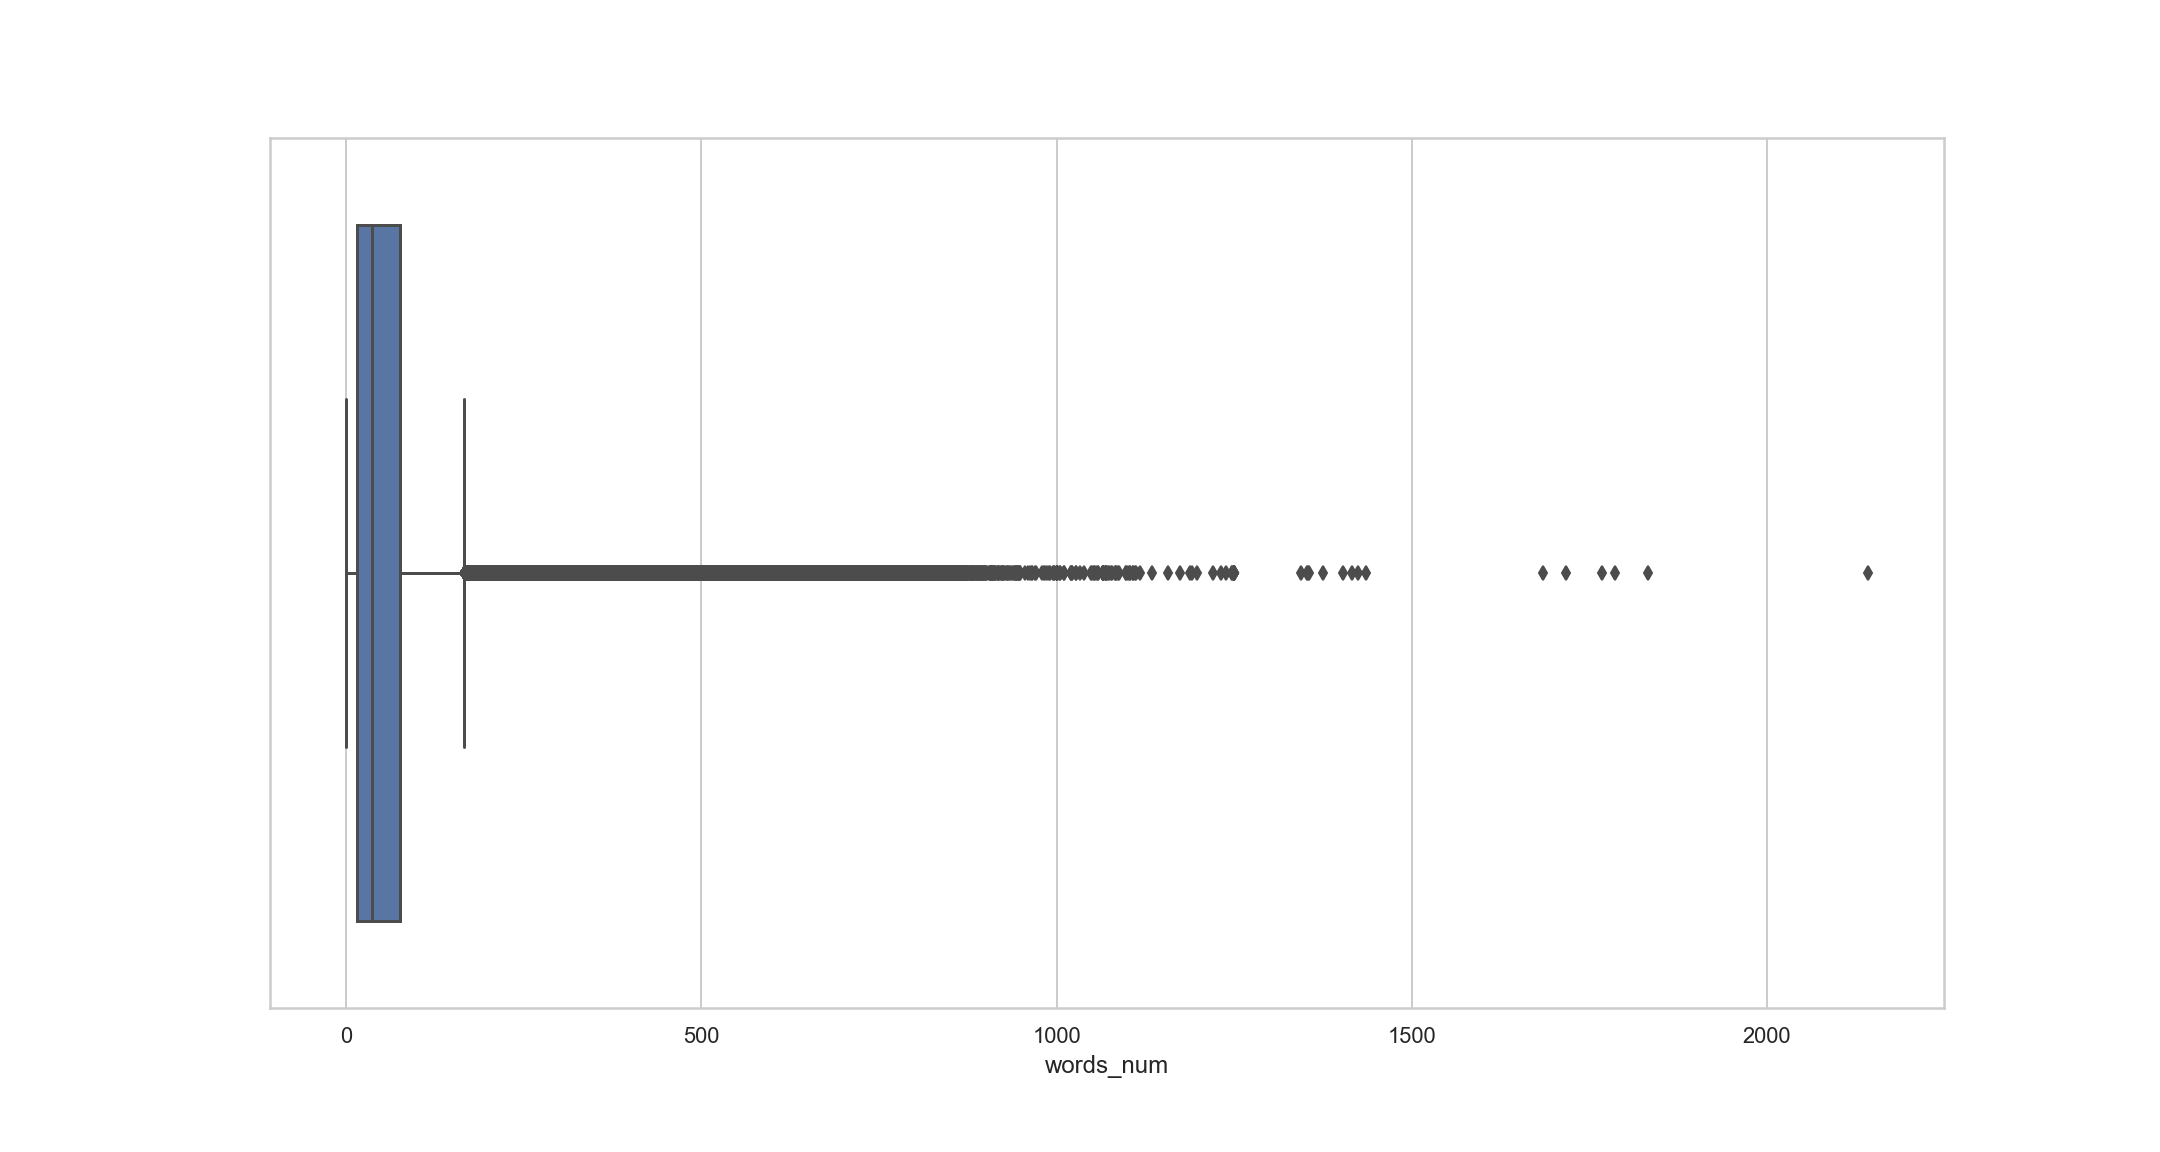
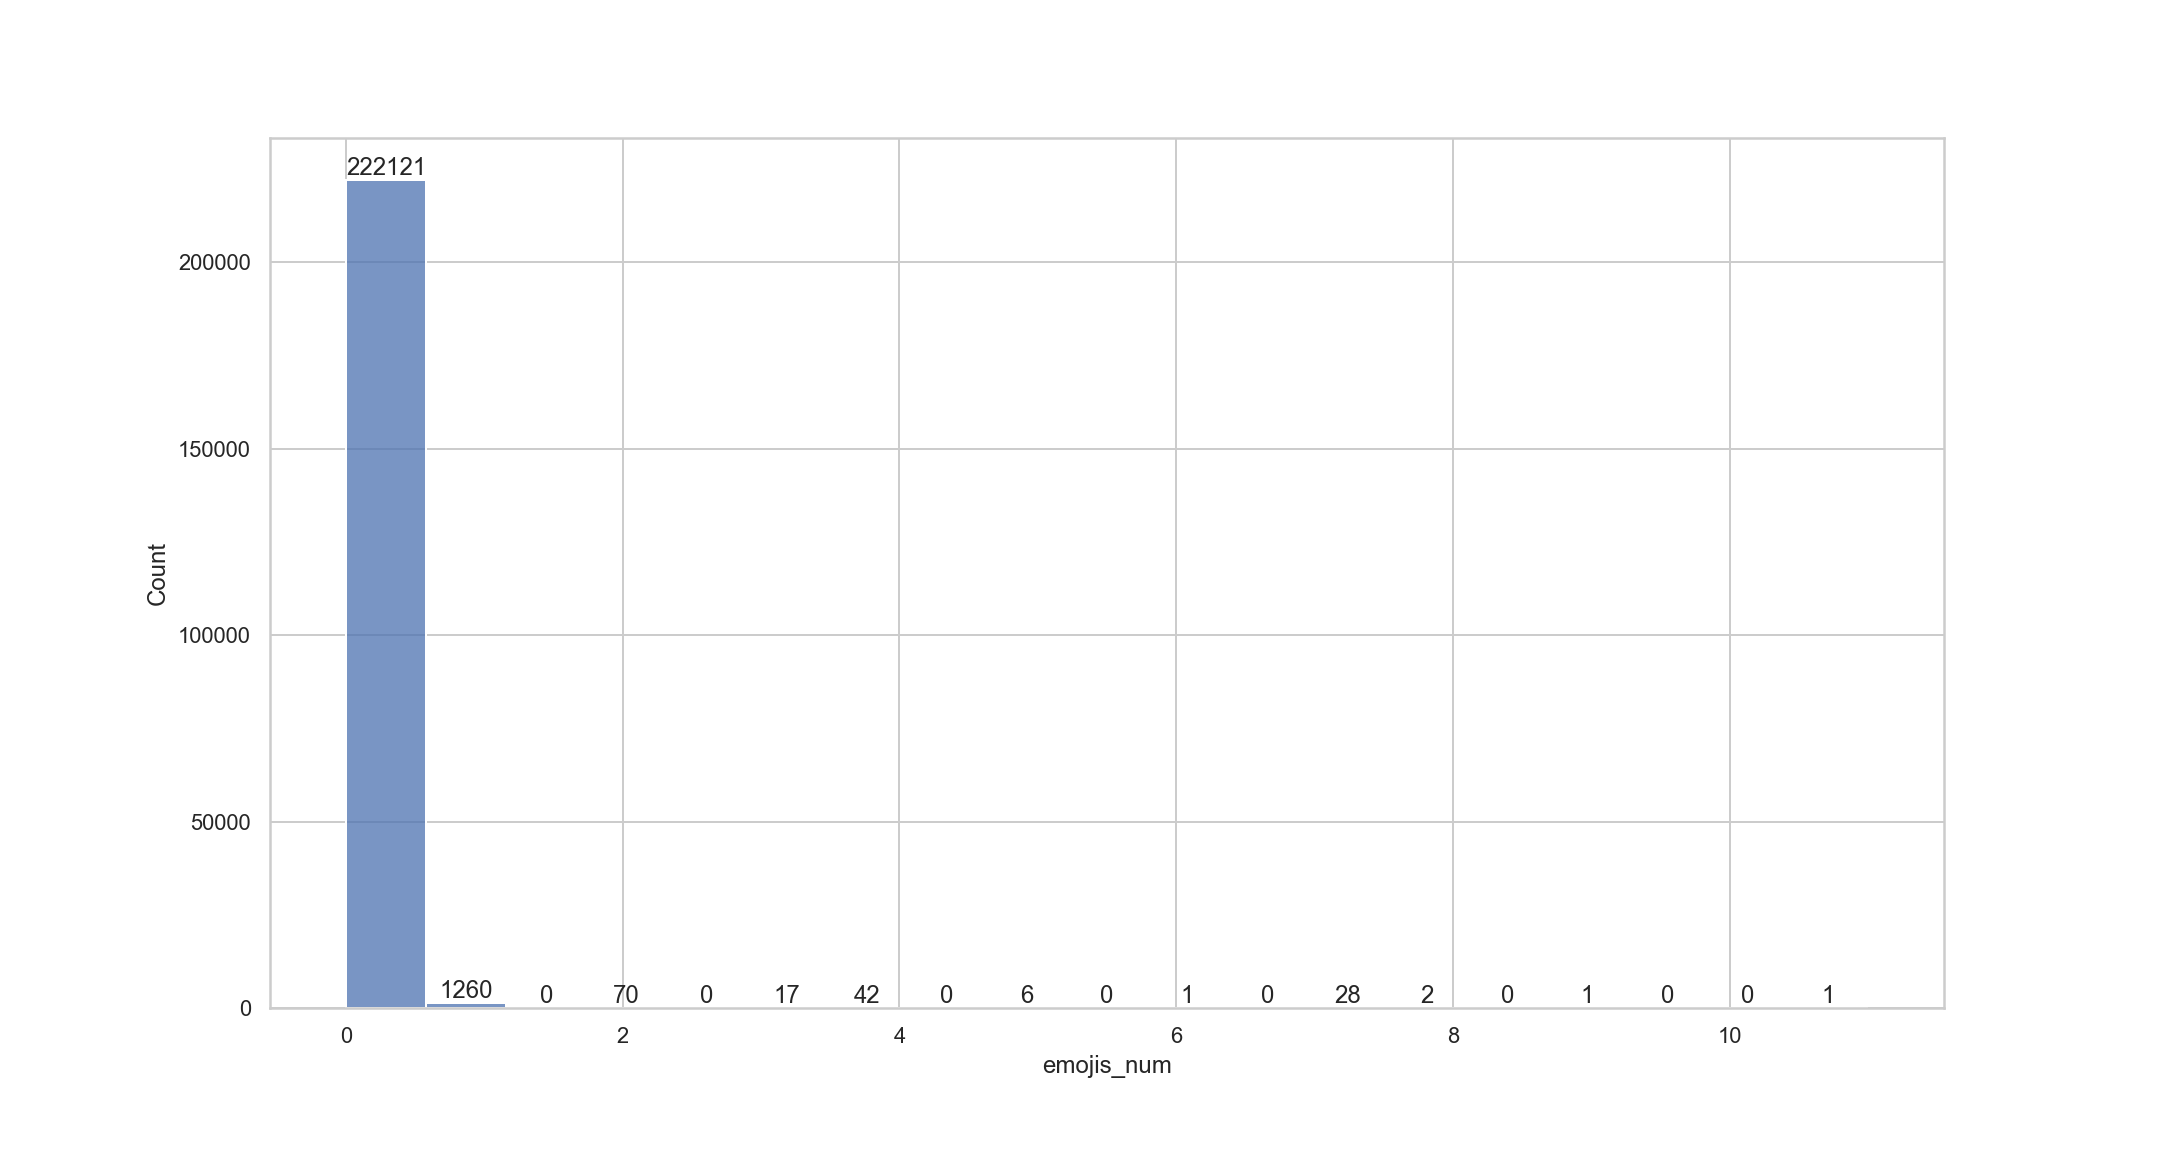
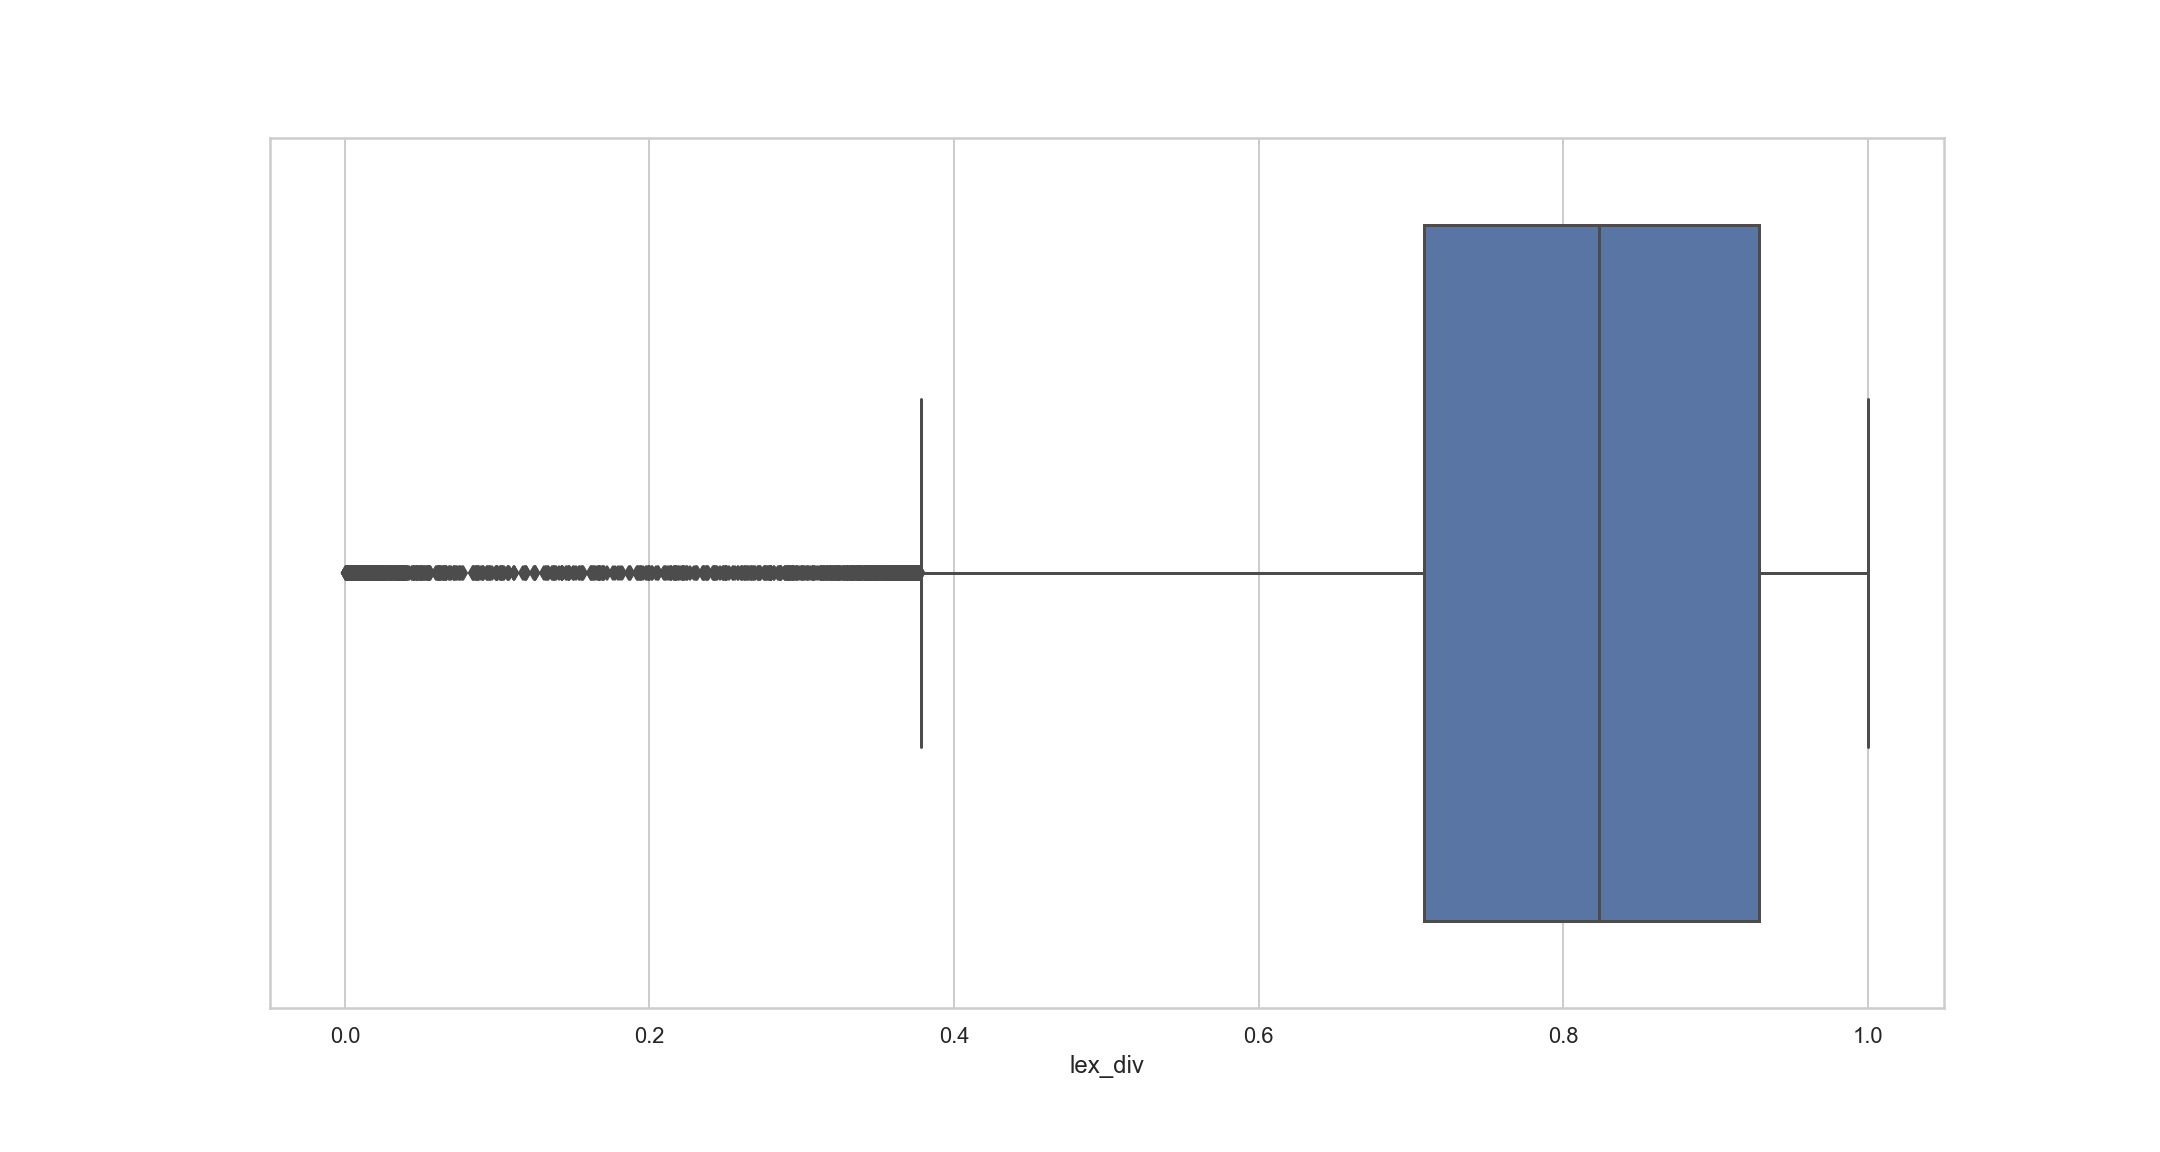
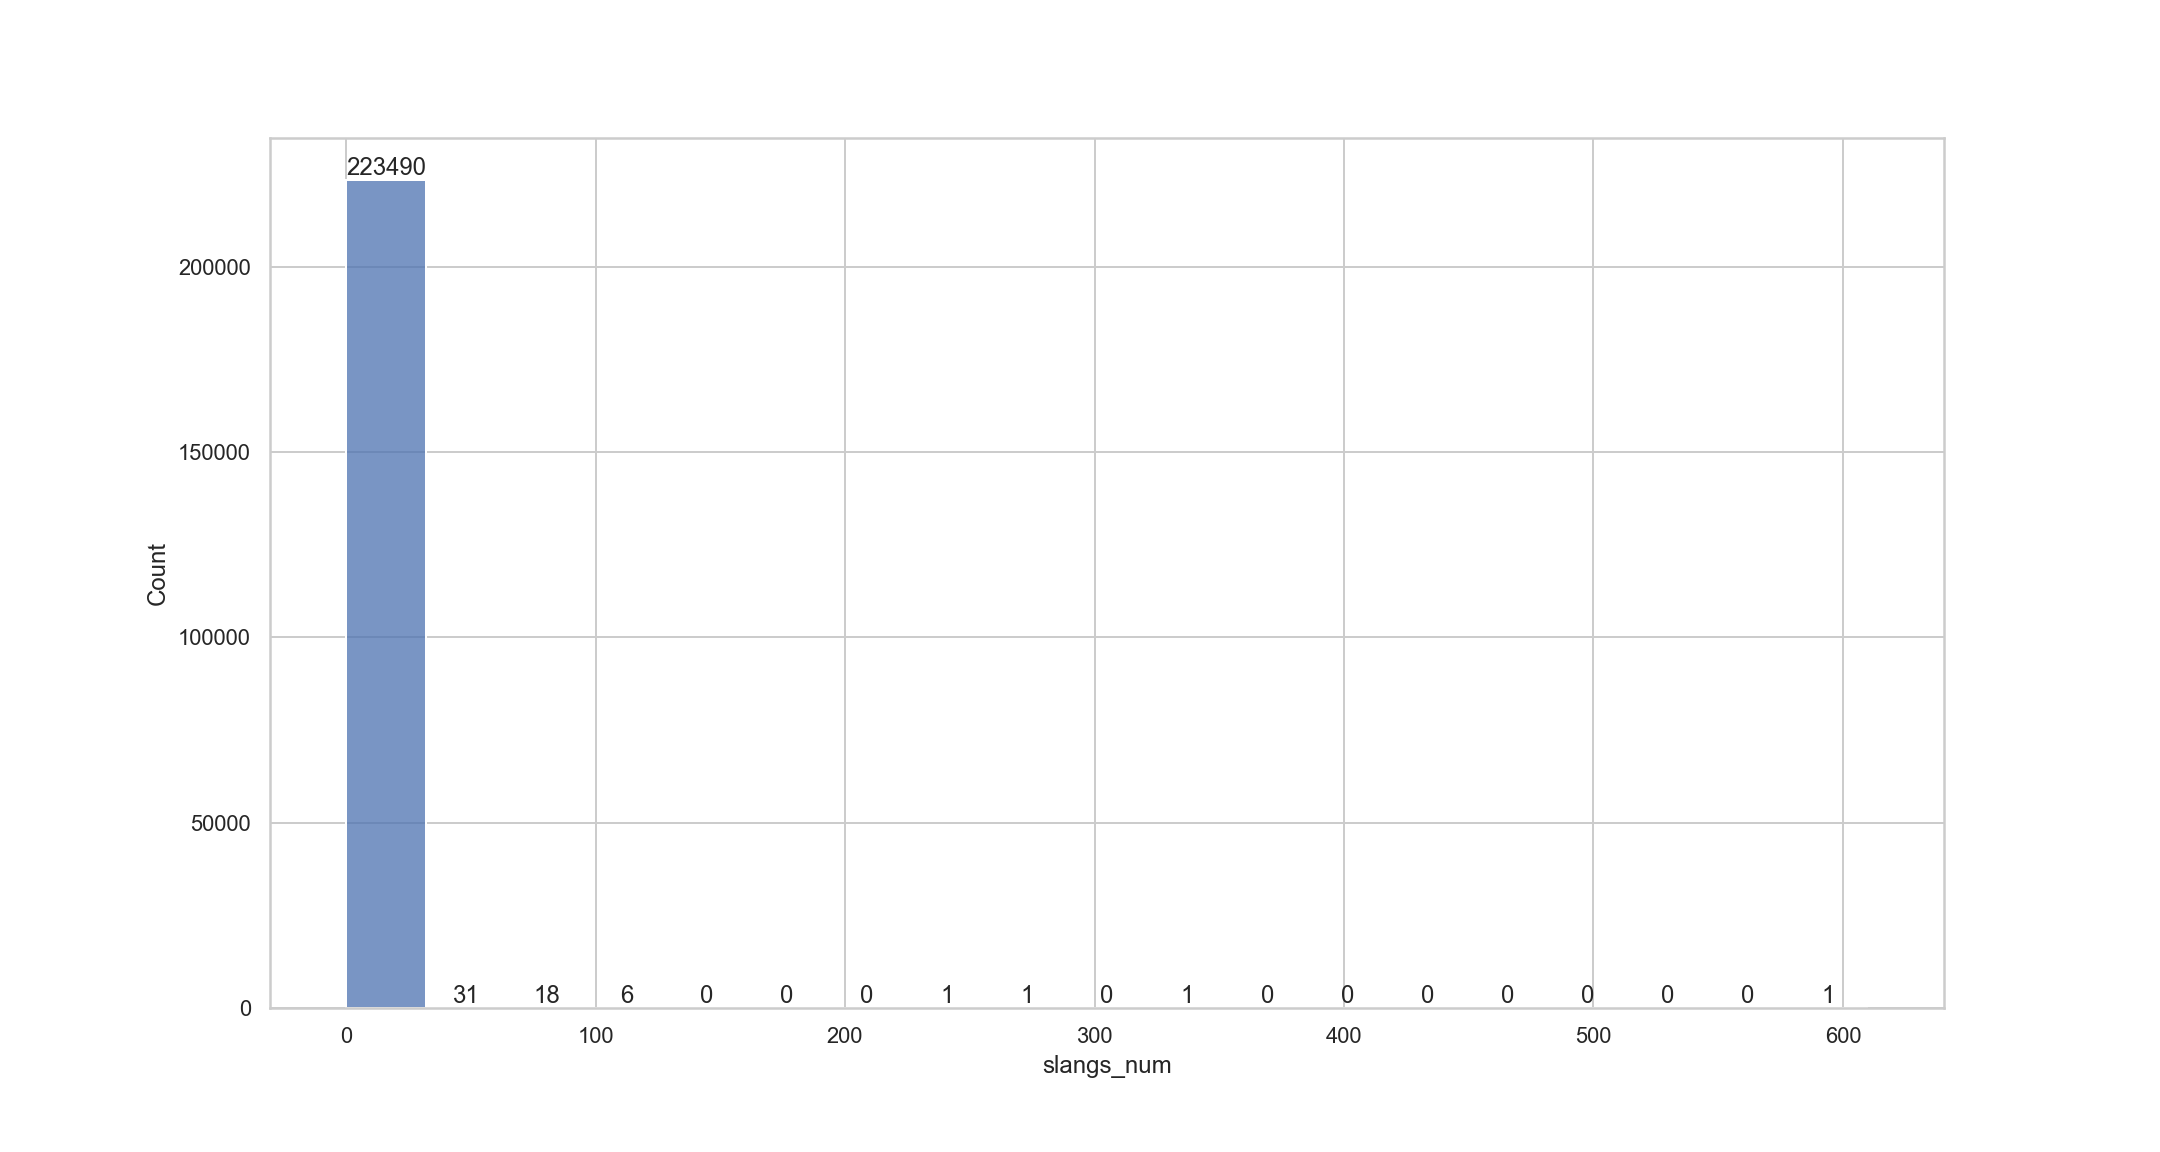
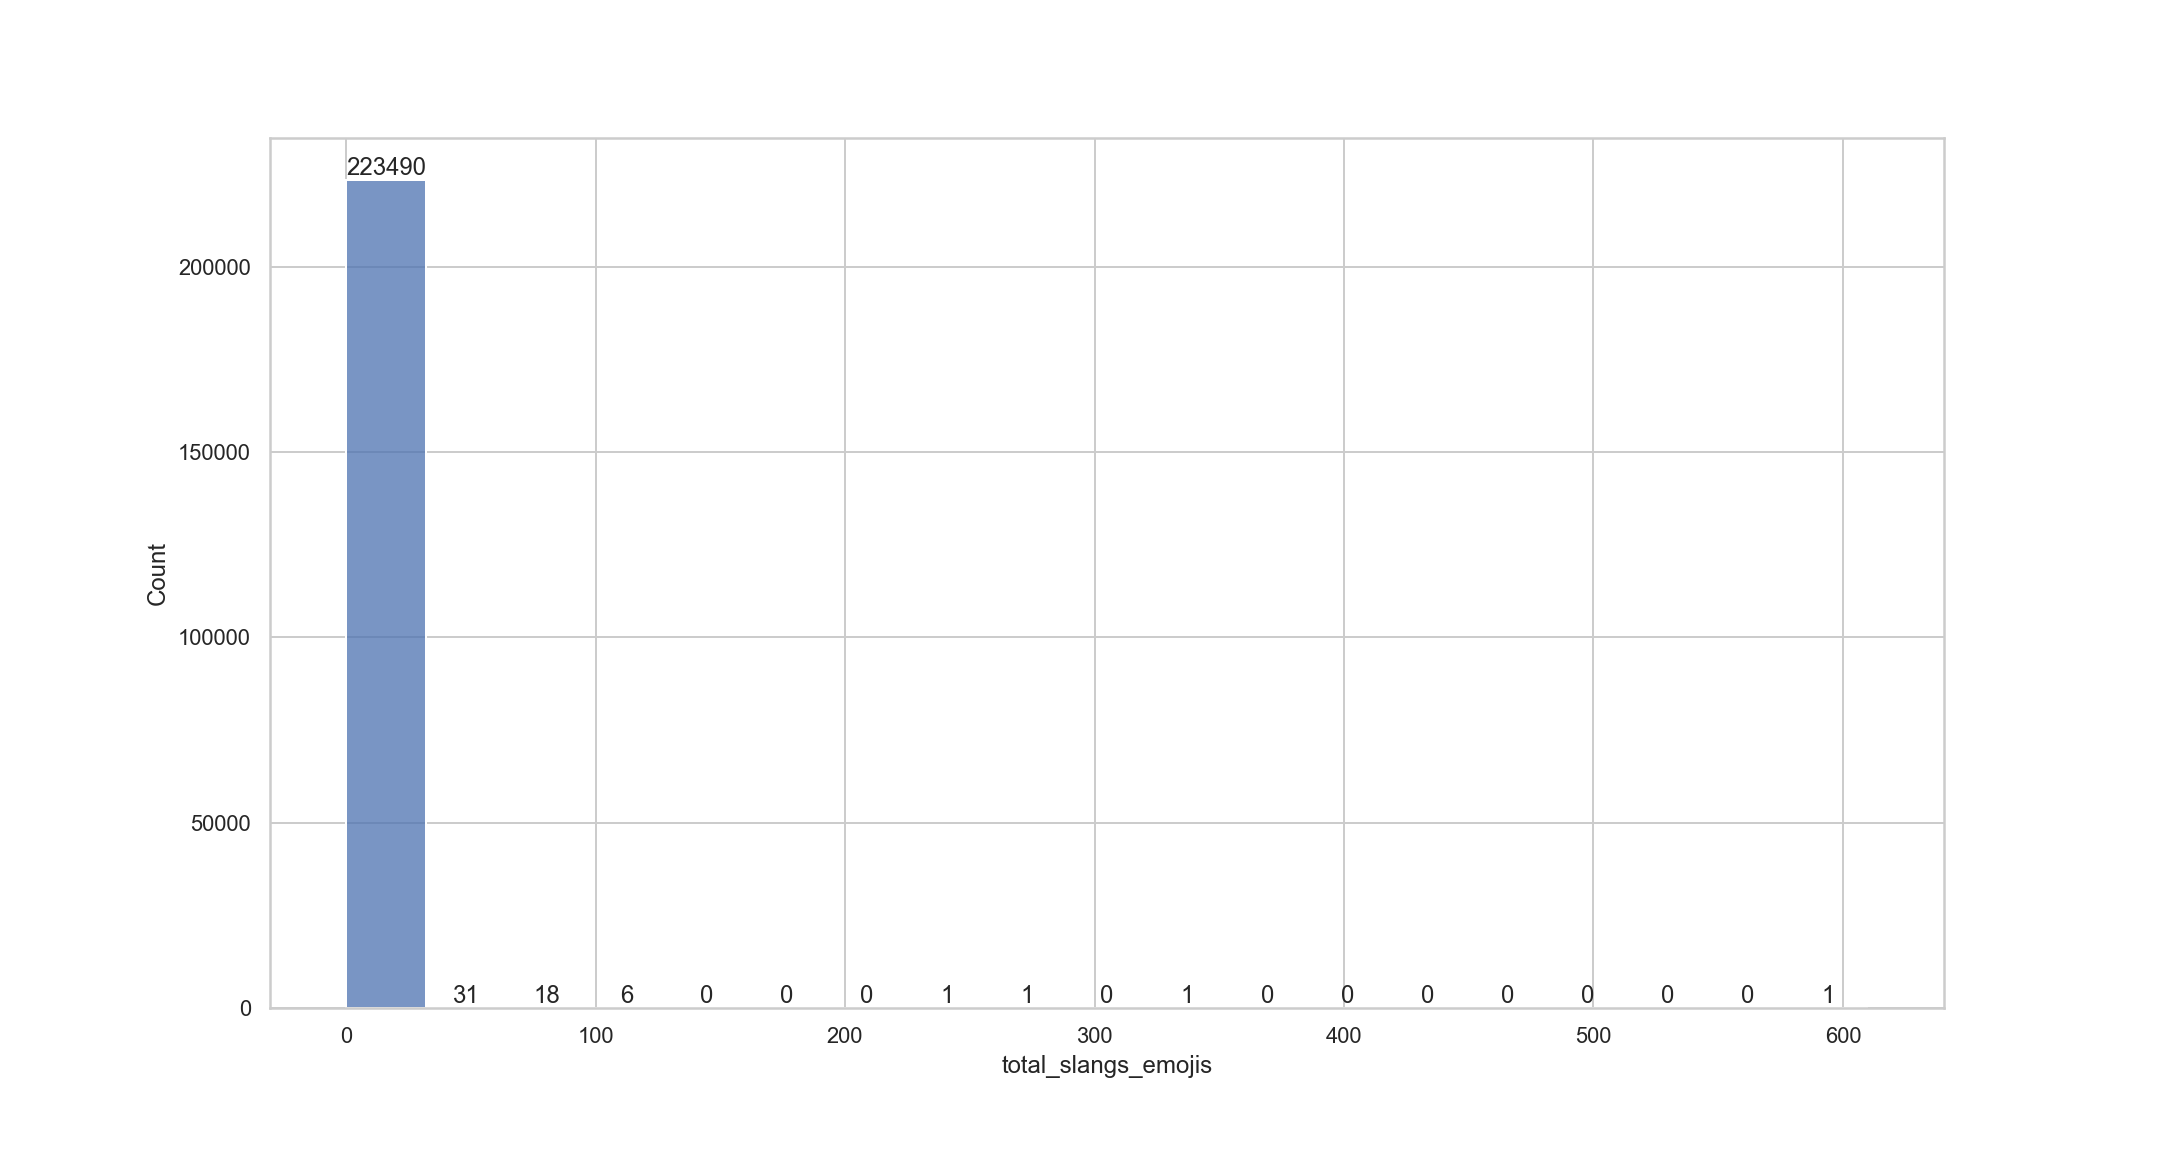
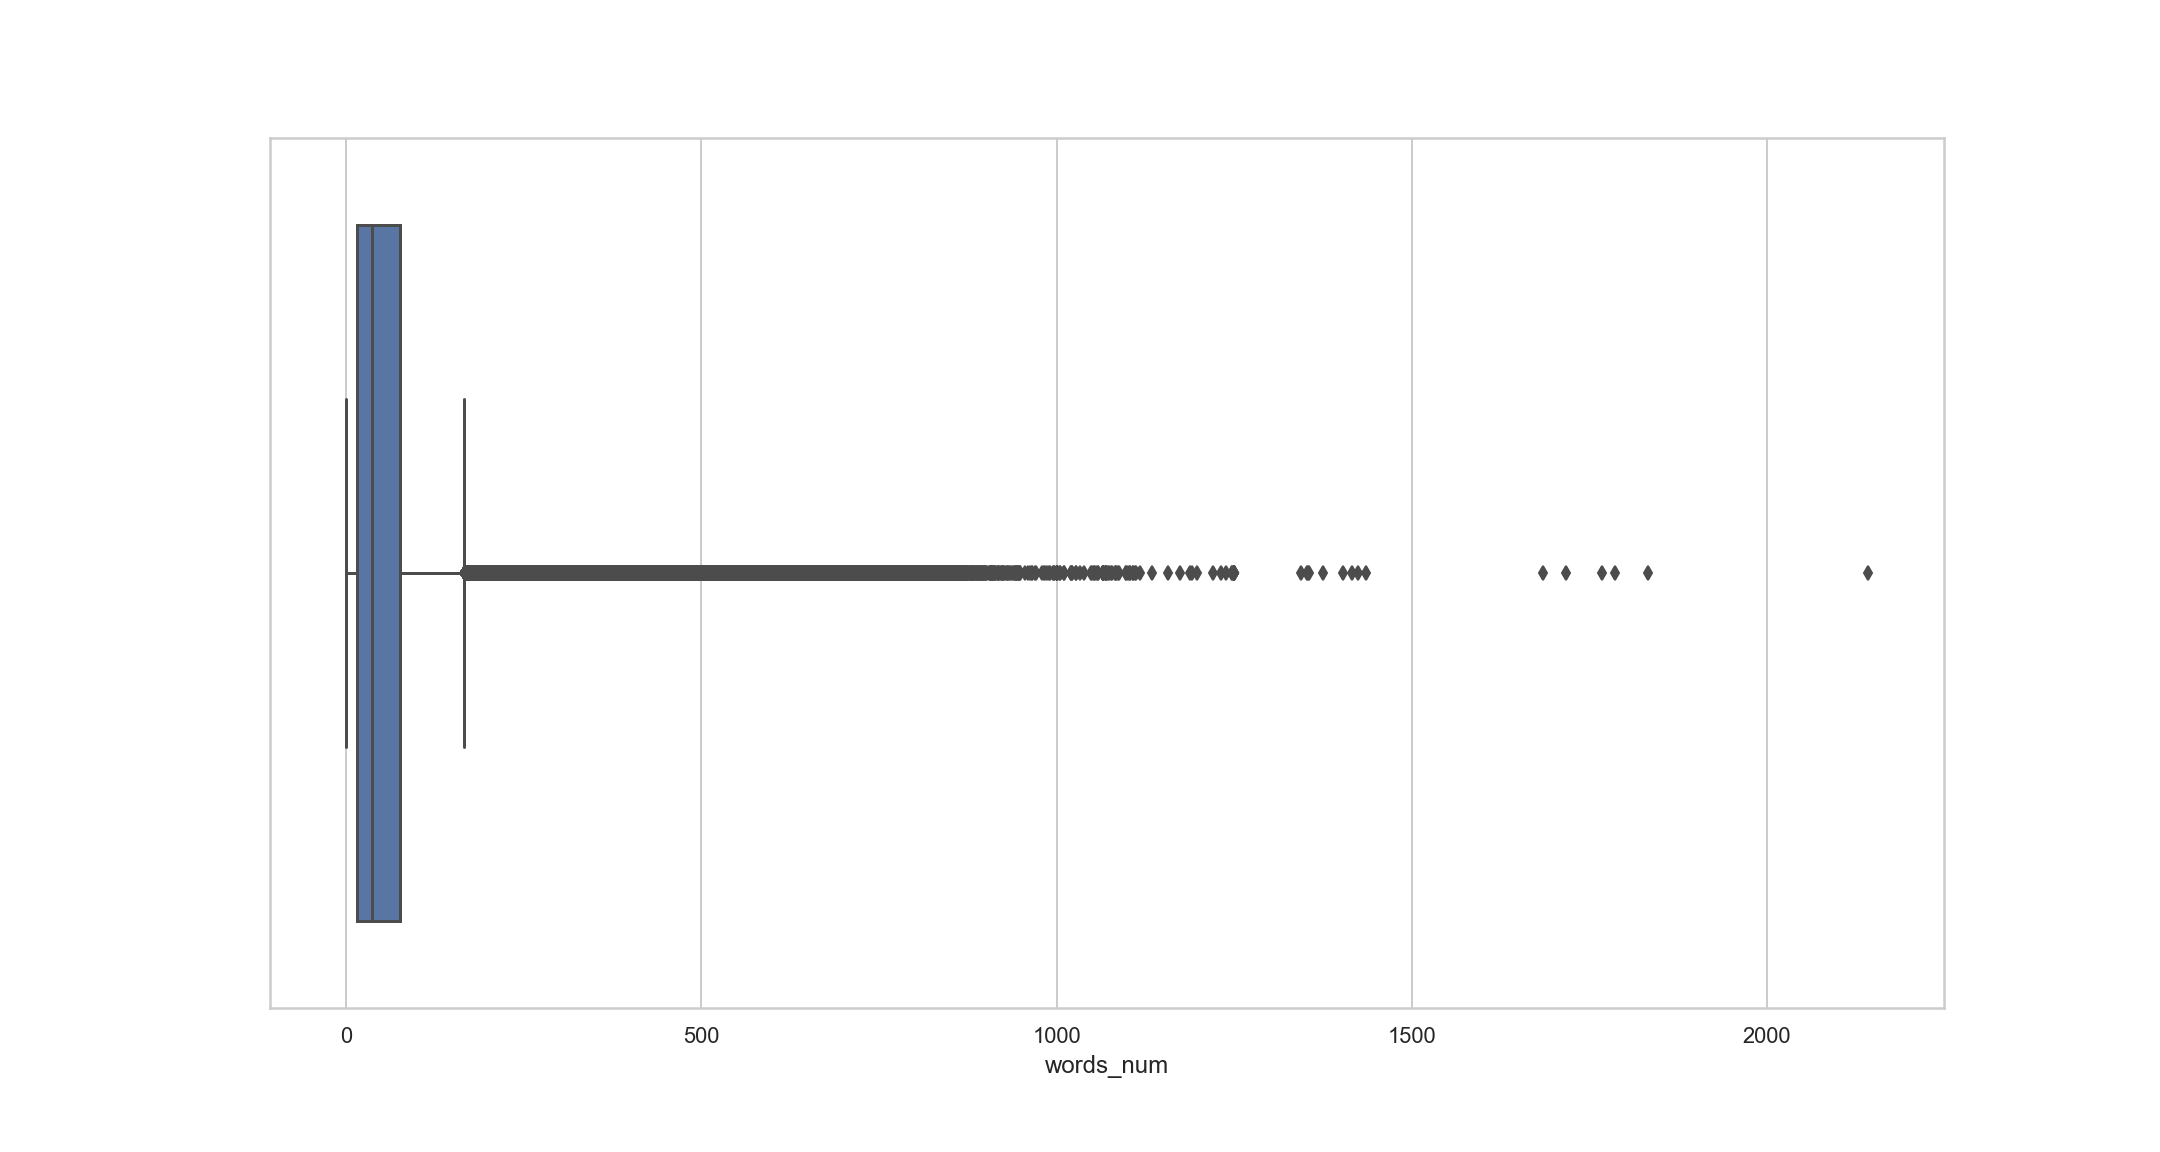

<Figure size 432x288 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

In [3]:
import param
import panel as pn

pn.extension()

temp_df = wtc_df

"""
This class serves as a dashboard for graphs. User can select column name and see its visualization.
The dashboard has two tabs. In the first tab, box plots are used for words_num and lex_div columns and histograms 
are for other columns. In the second tab, the plot is cleared.
"""
class GraphicalExplorationDashboard(param.Parameterized):
    
    stats = param.ObjectSelector(default='words_num', objects=['words_num', 'lex_div', 'slangs_num', 'emojis_num', 'total_slangs_emojis'])
    
    def plot(self):
        plt.clf()
        if self.stats == 'words_num' or self.stats == 'lex_div':
            box_plot(temp_df[self.stats])
        else:
            hist_plot(temp_df[self.stats])
        return plt.gcf()
    
    def append_end(self):
        plt.clf()
        return ""

wtc_ge_1 = GraphicalExplorationDashboard(name='')

dashboard = pn.Column('WTC Dashboard 1',
                      wtc_ge_1.param,
                      pn.Tabs(
                          ('Plot', wtc_ge_1.plot),
                          ('',wtc_ge_1.append_end)
                      )
                     )

dashboard.embed()

Texts in Wikipedia dataset are quite lengthy, with some surpassing more than 1000 words. Lexical diversity is high. As seen in the x-axis, this dataset has more slangs than emojis.


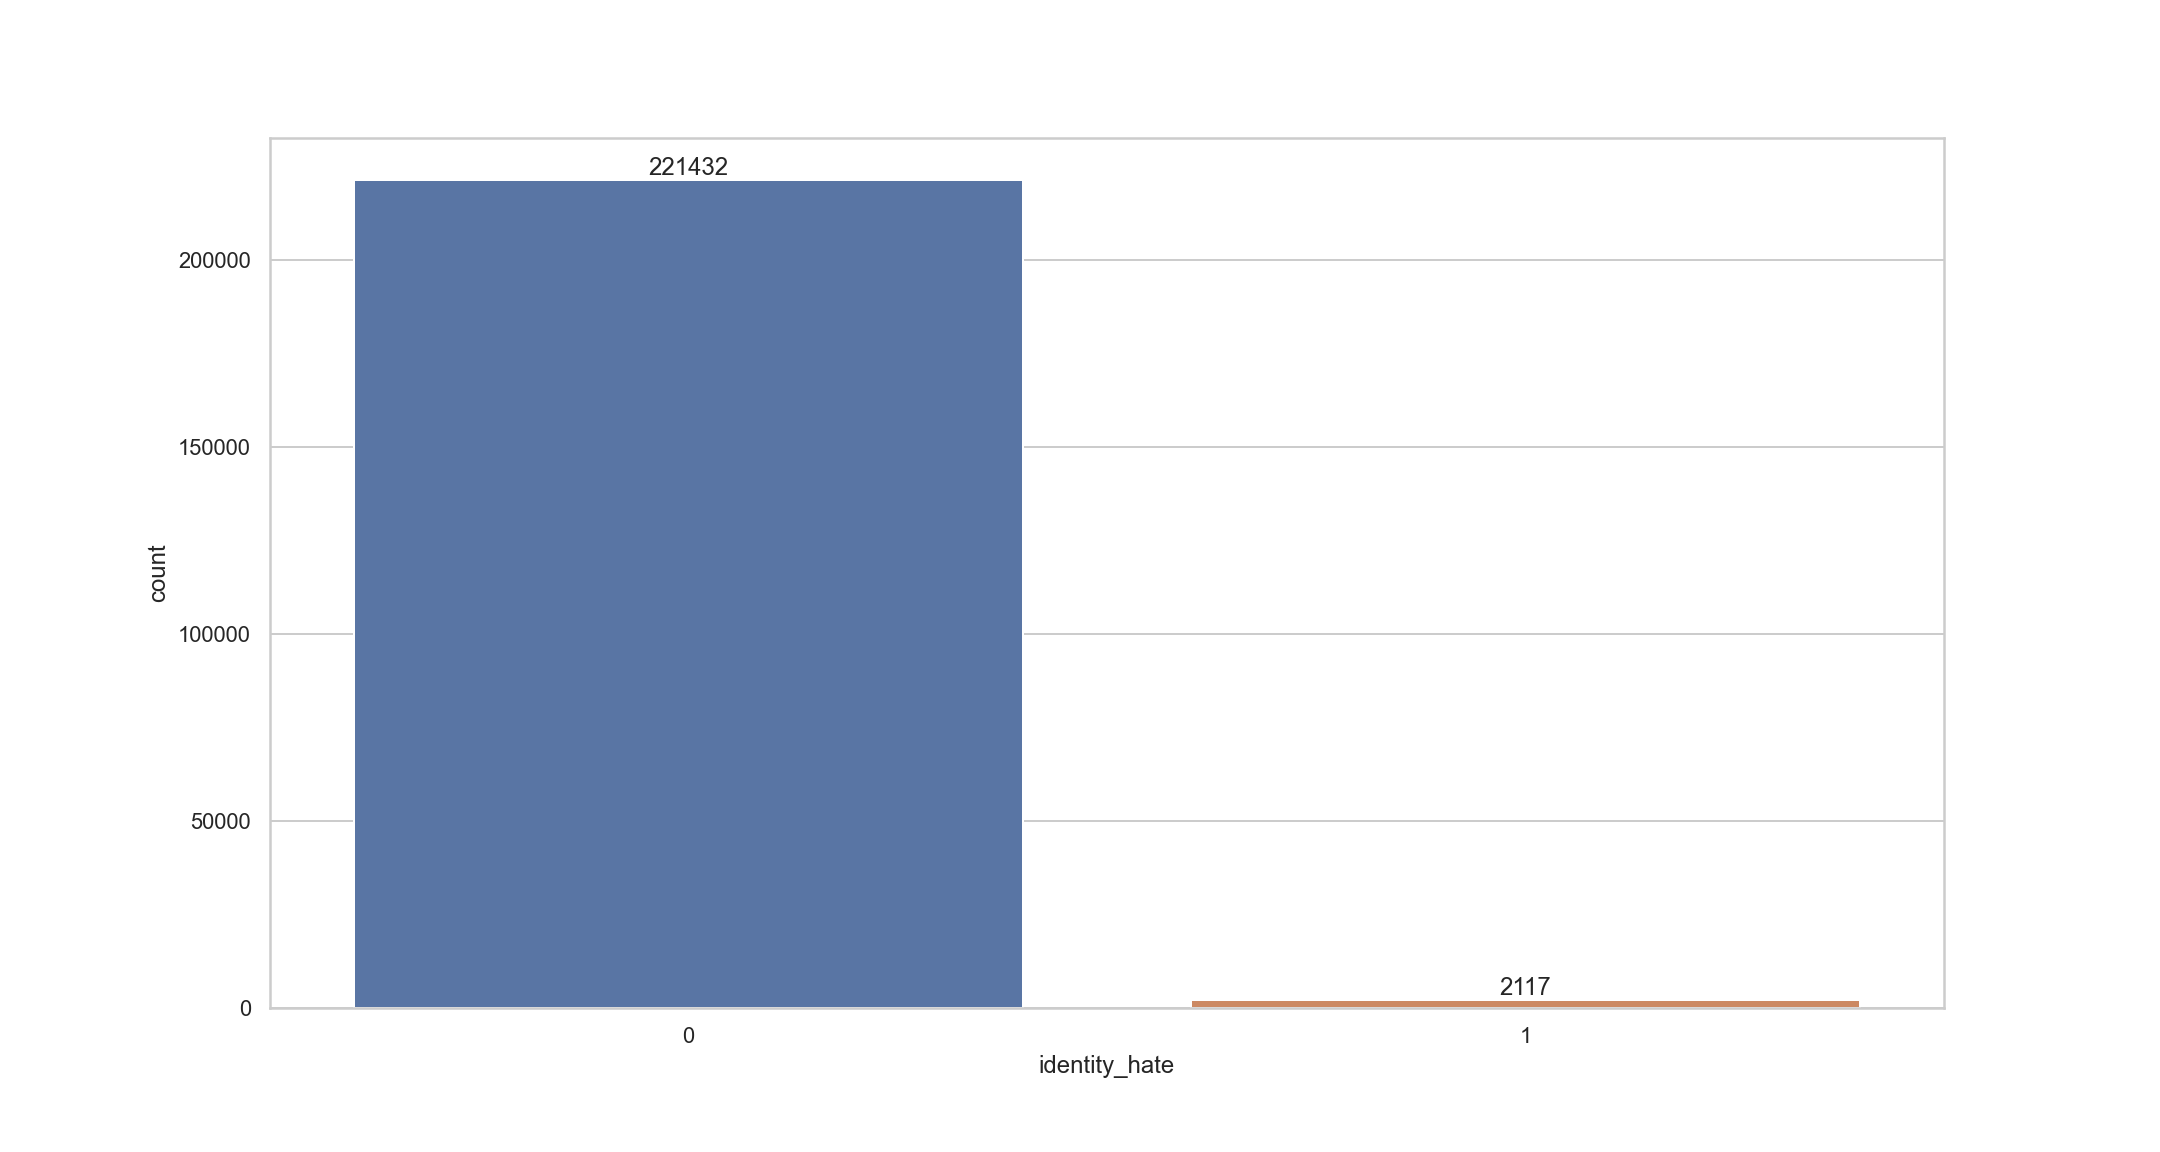
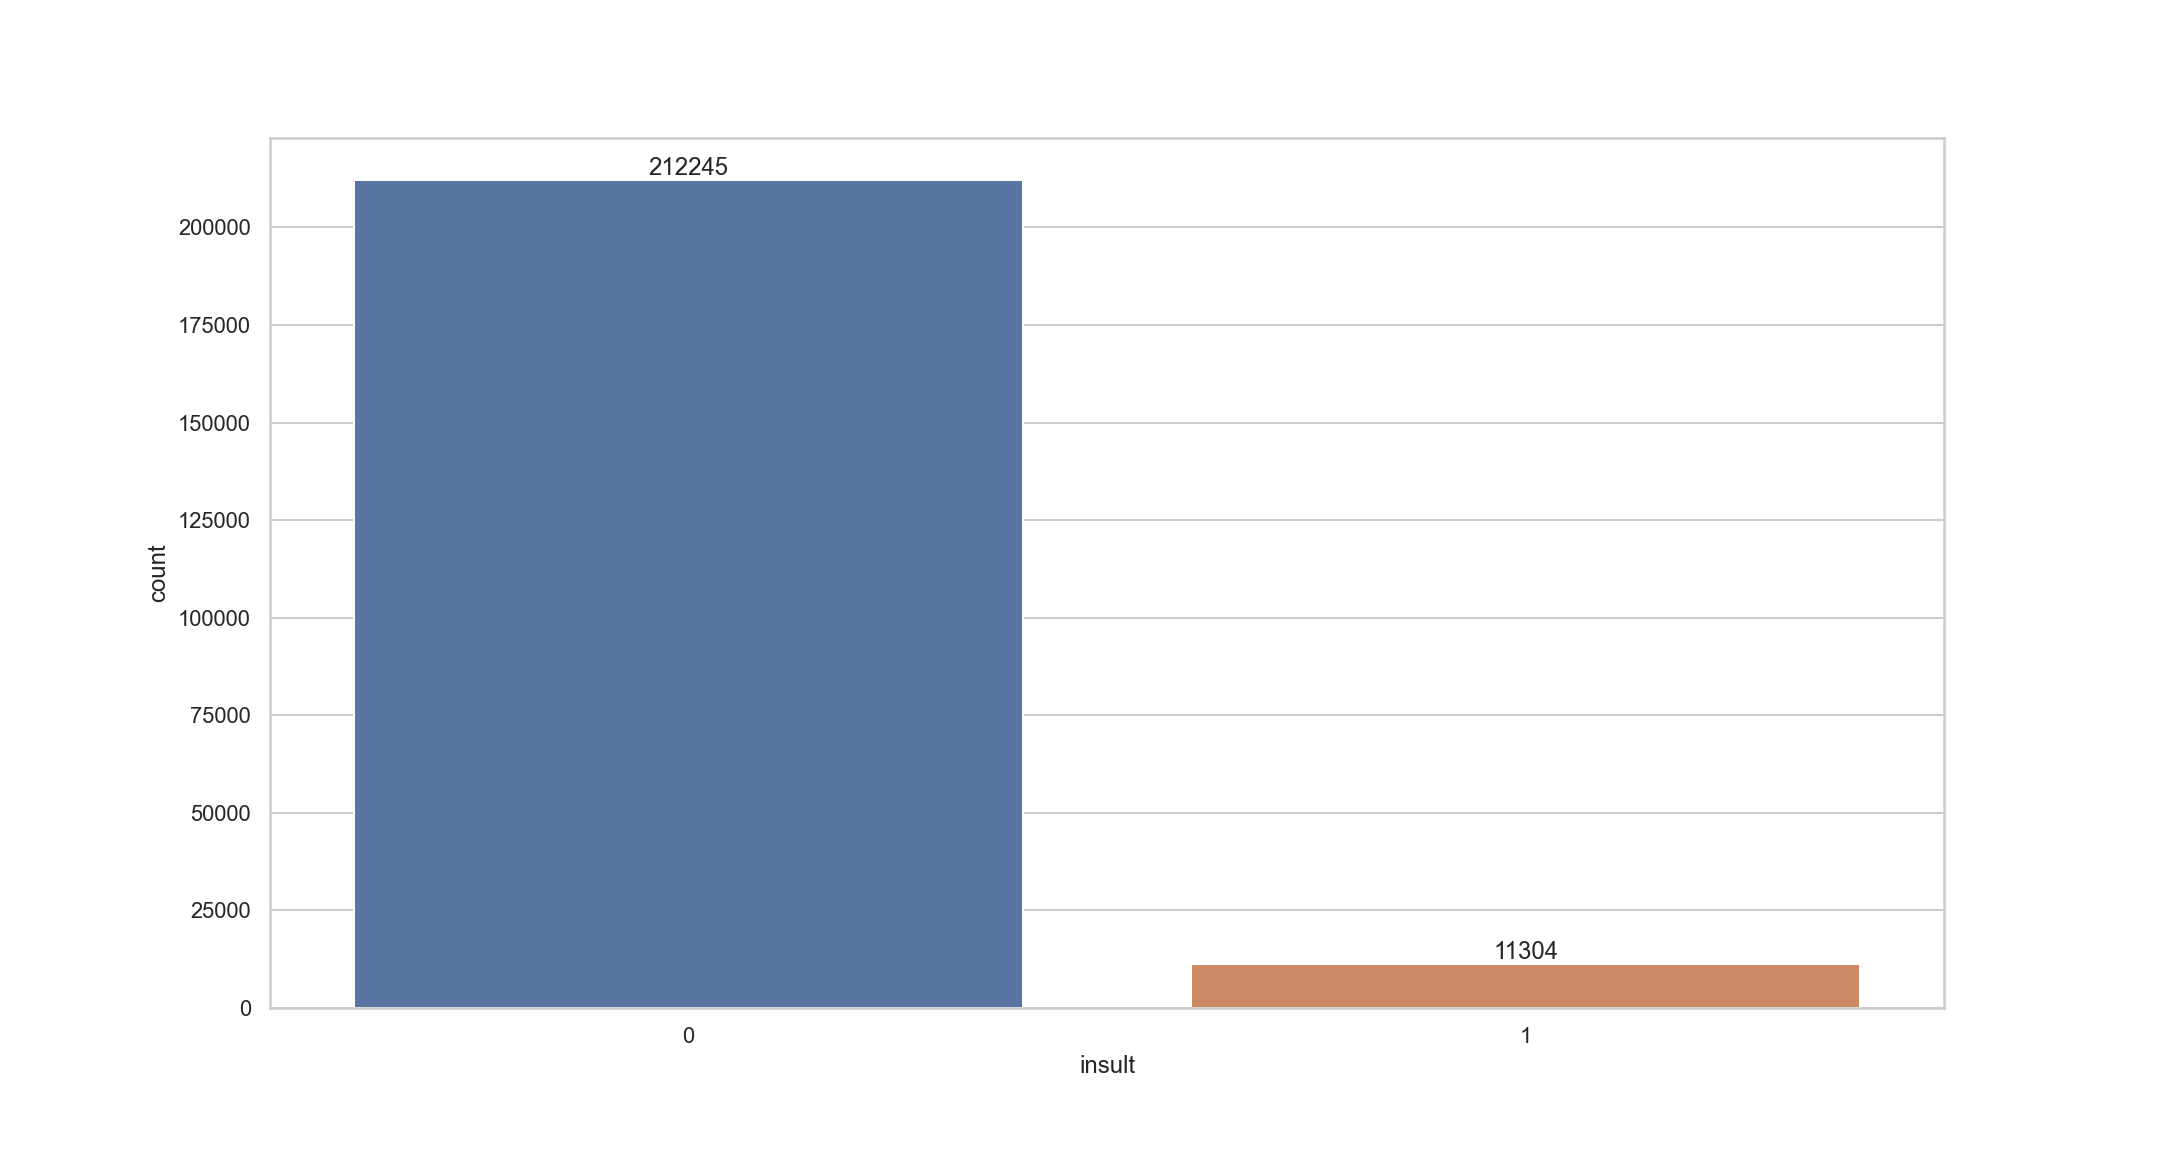
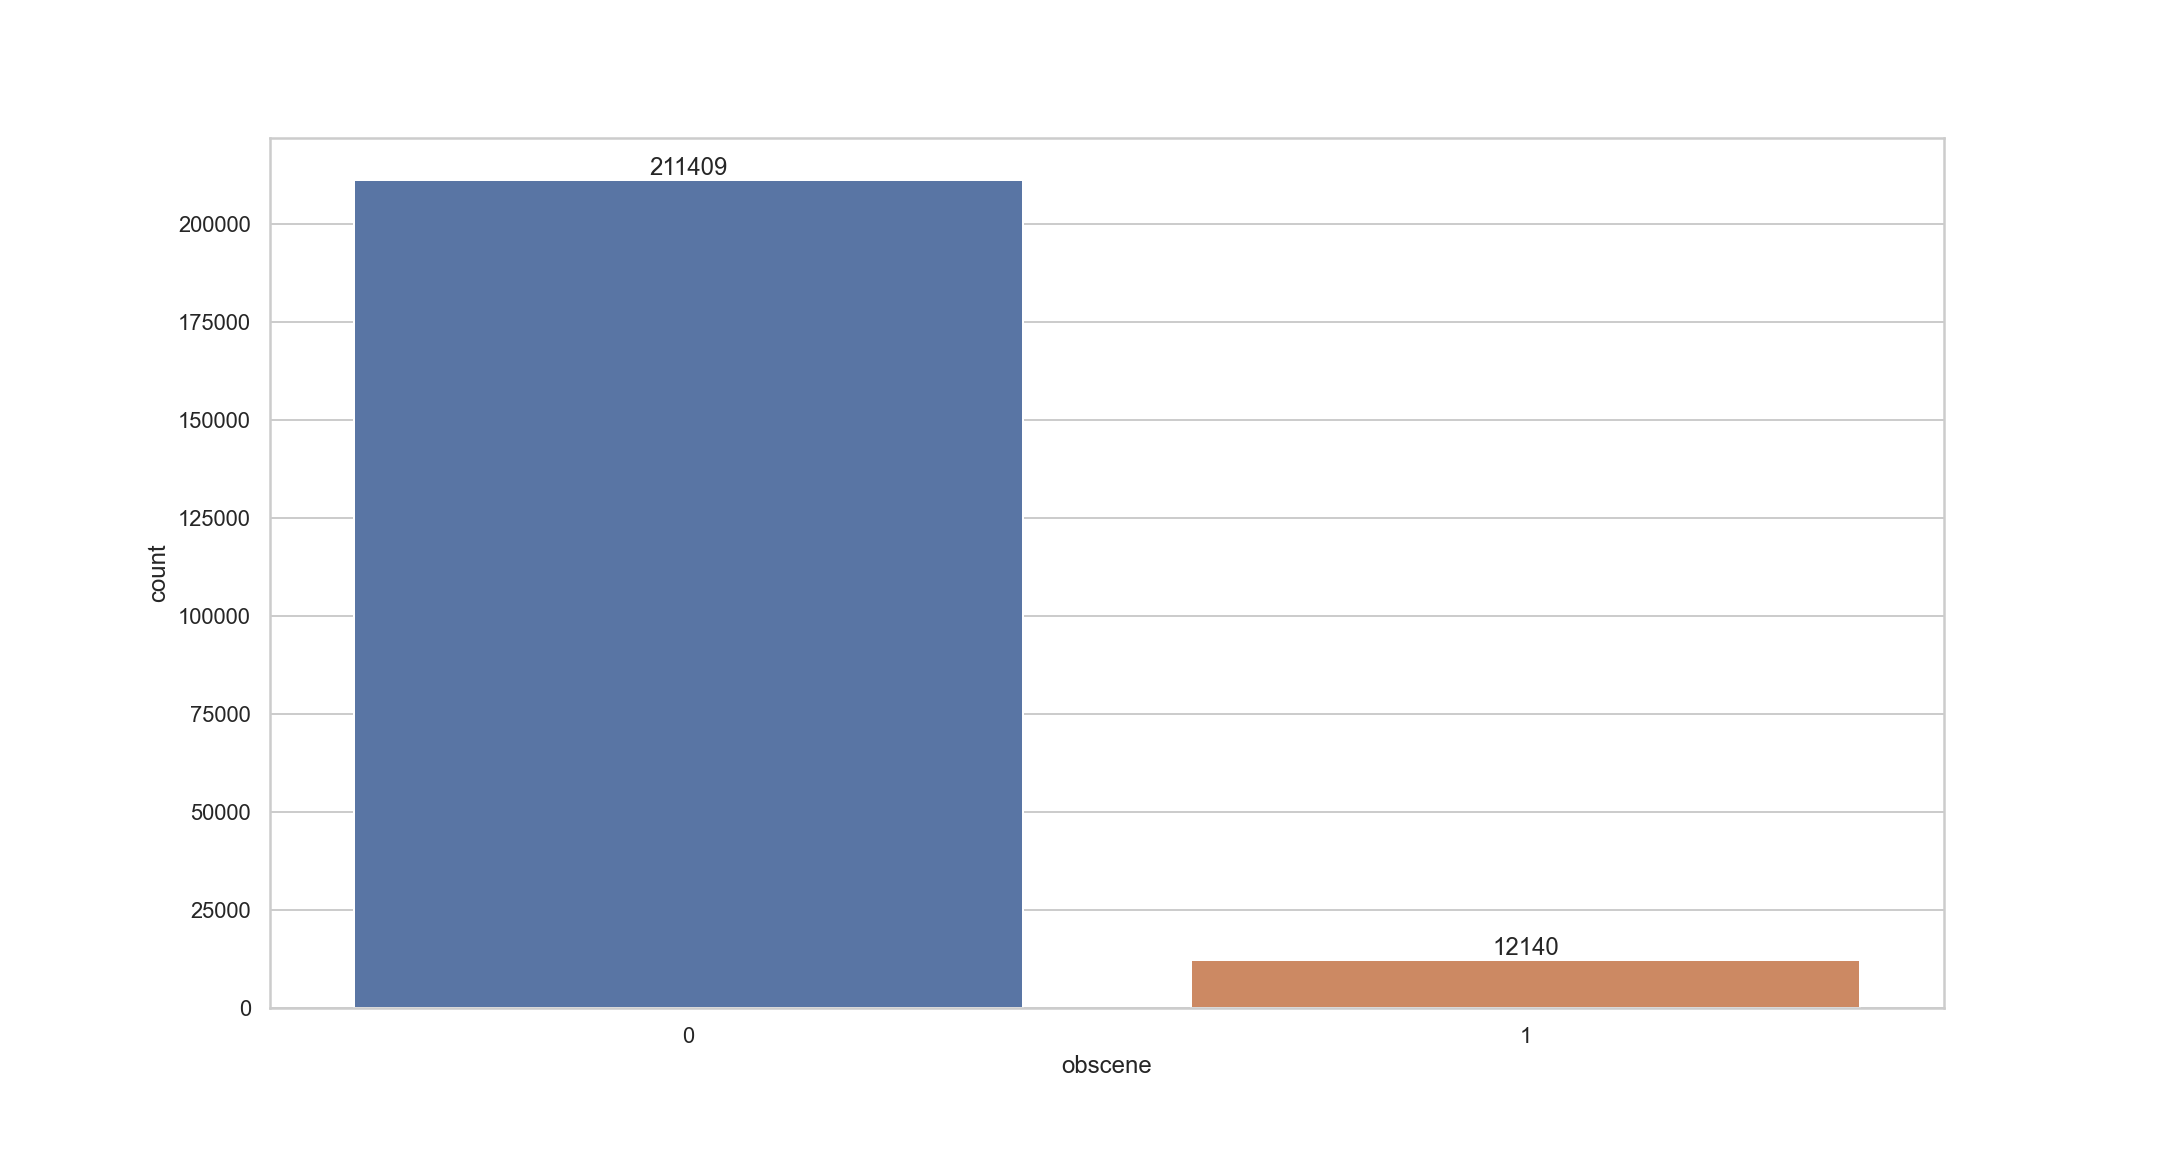
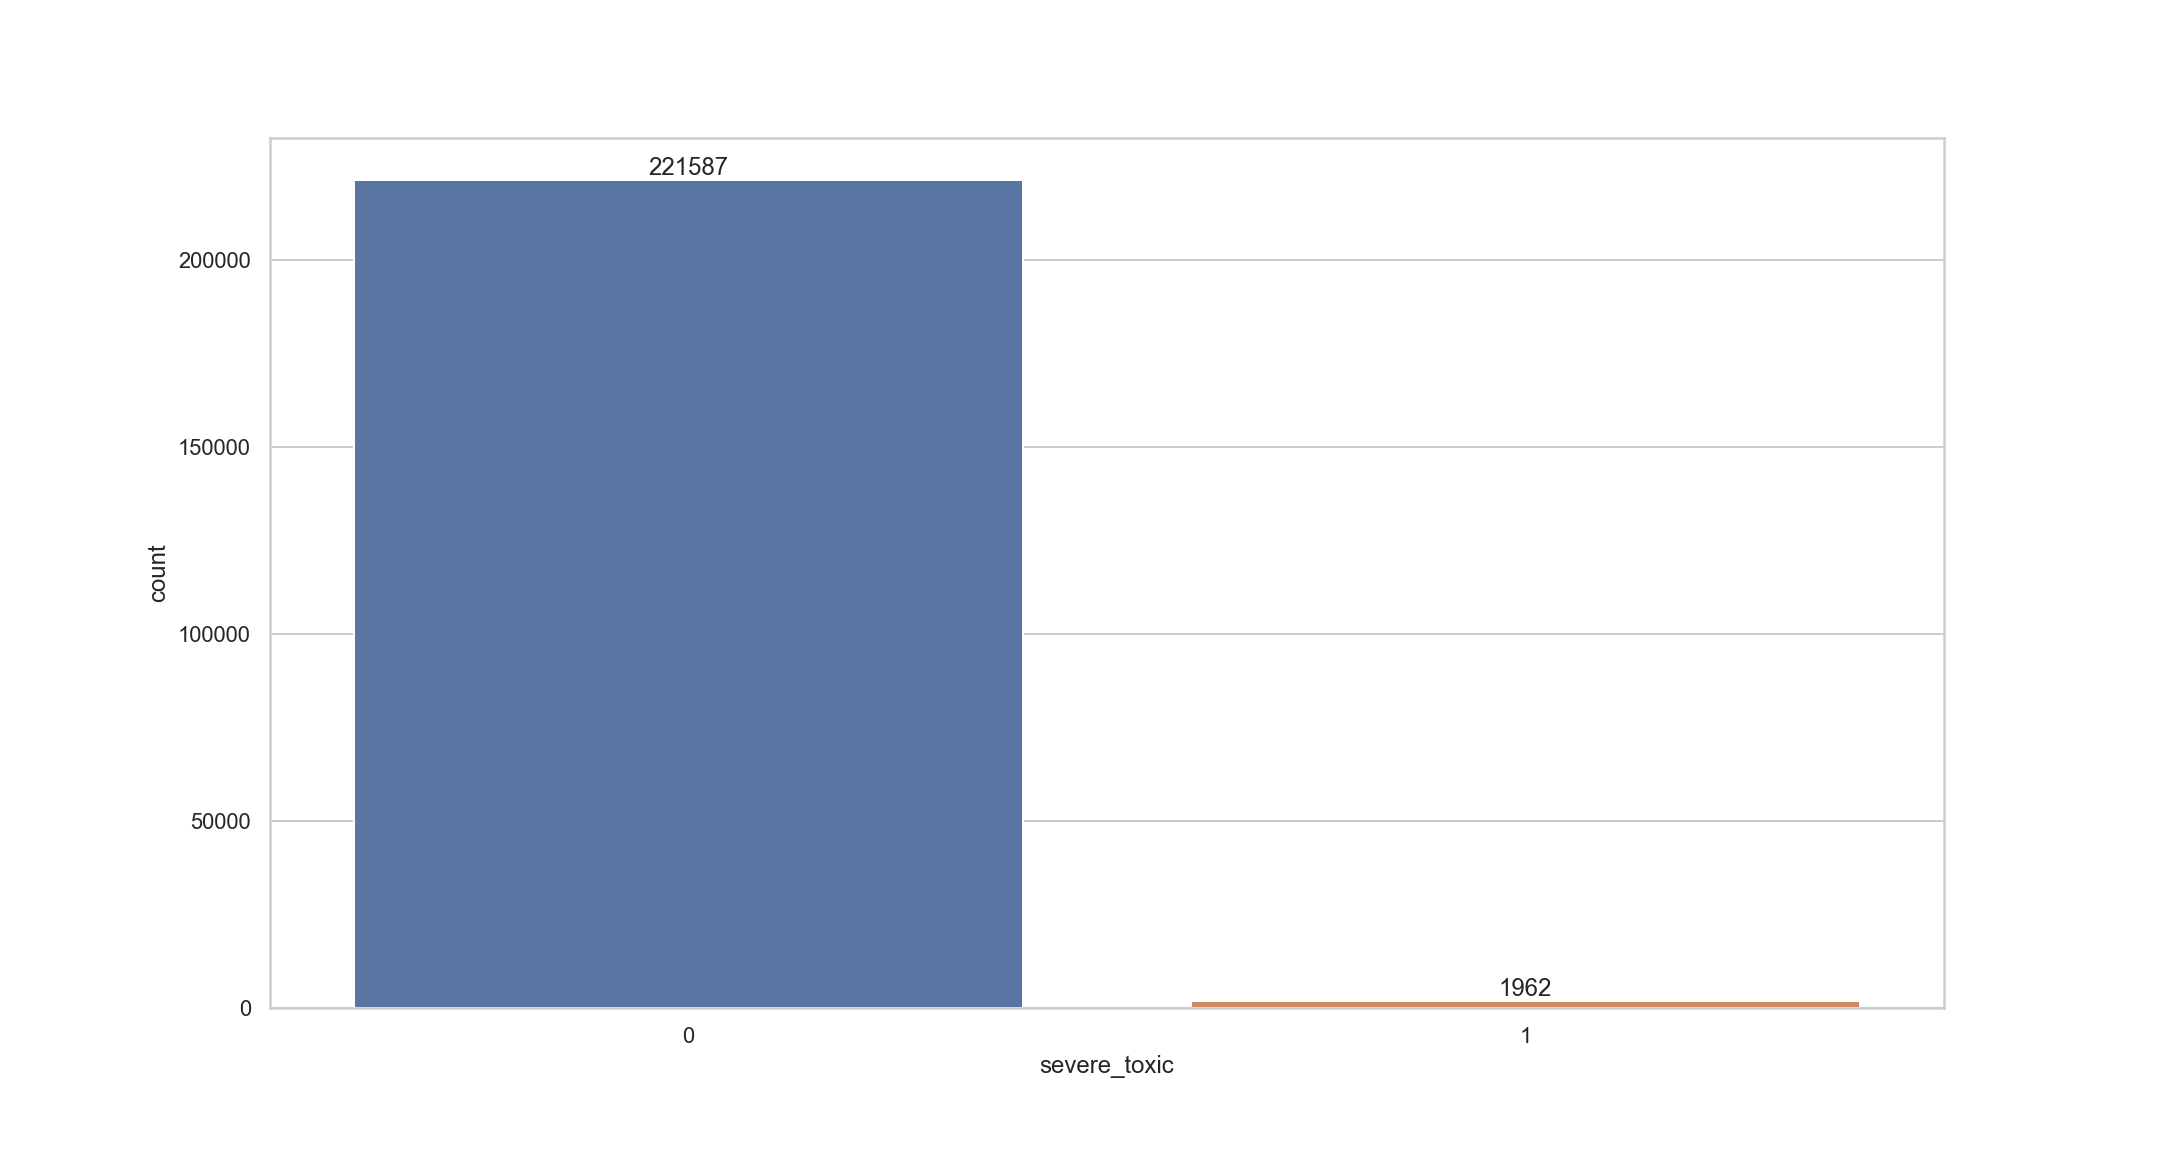
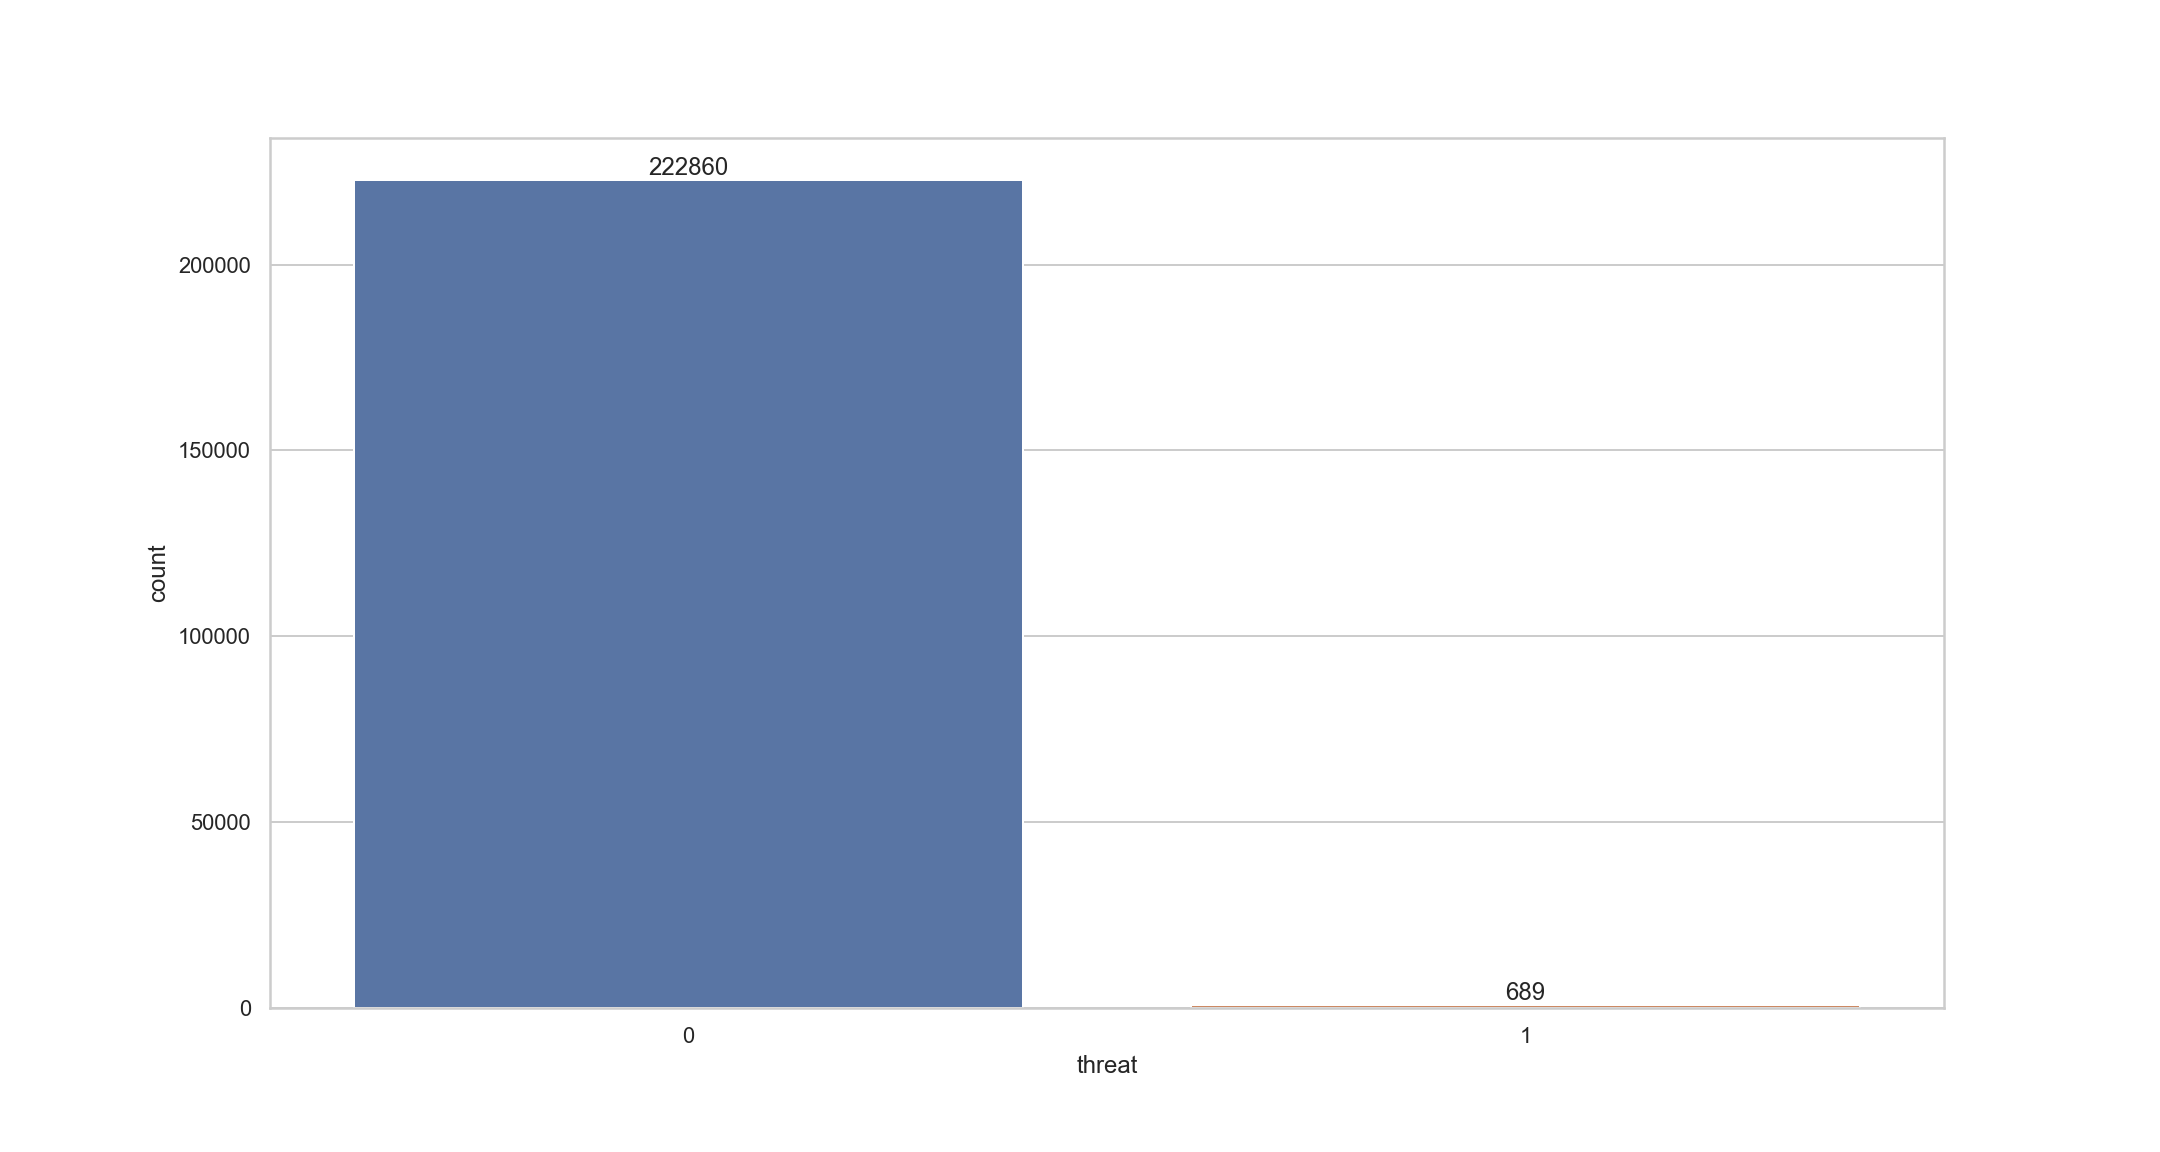
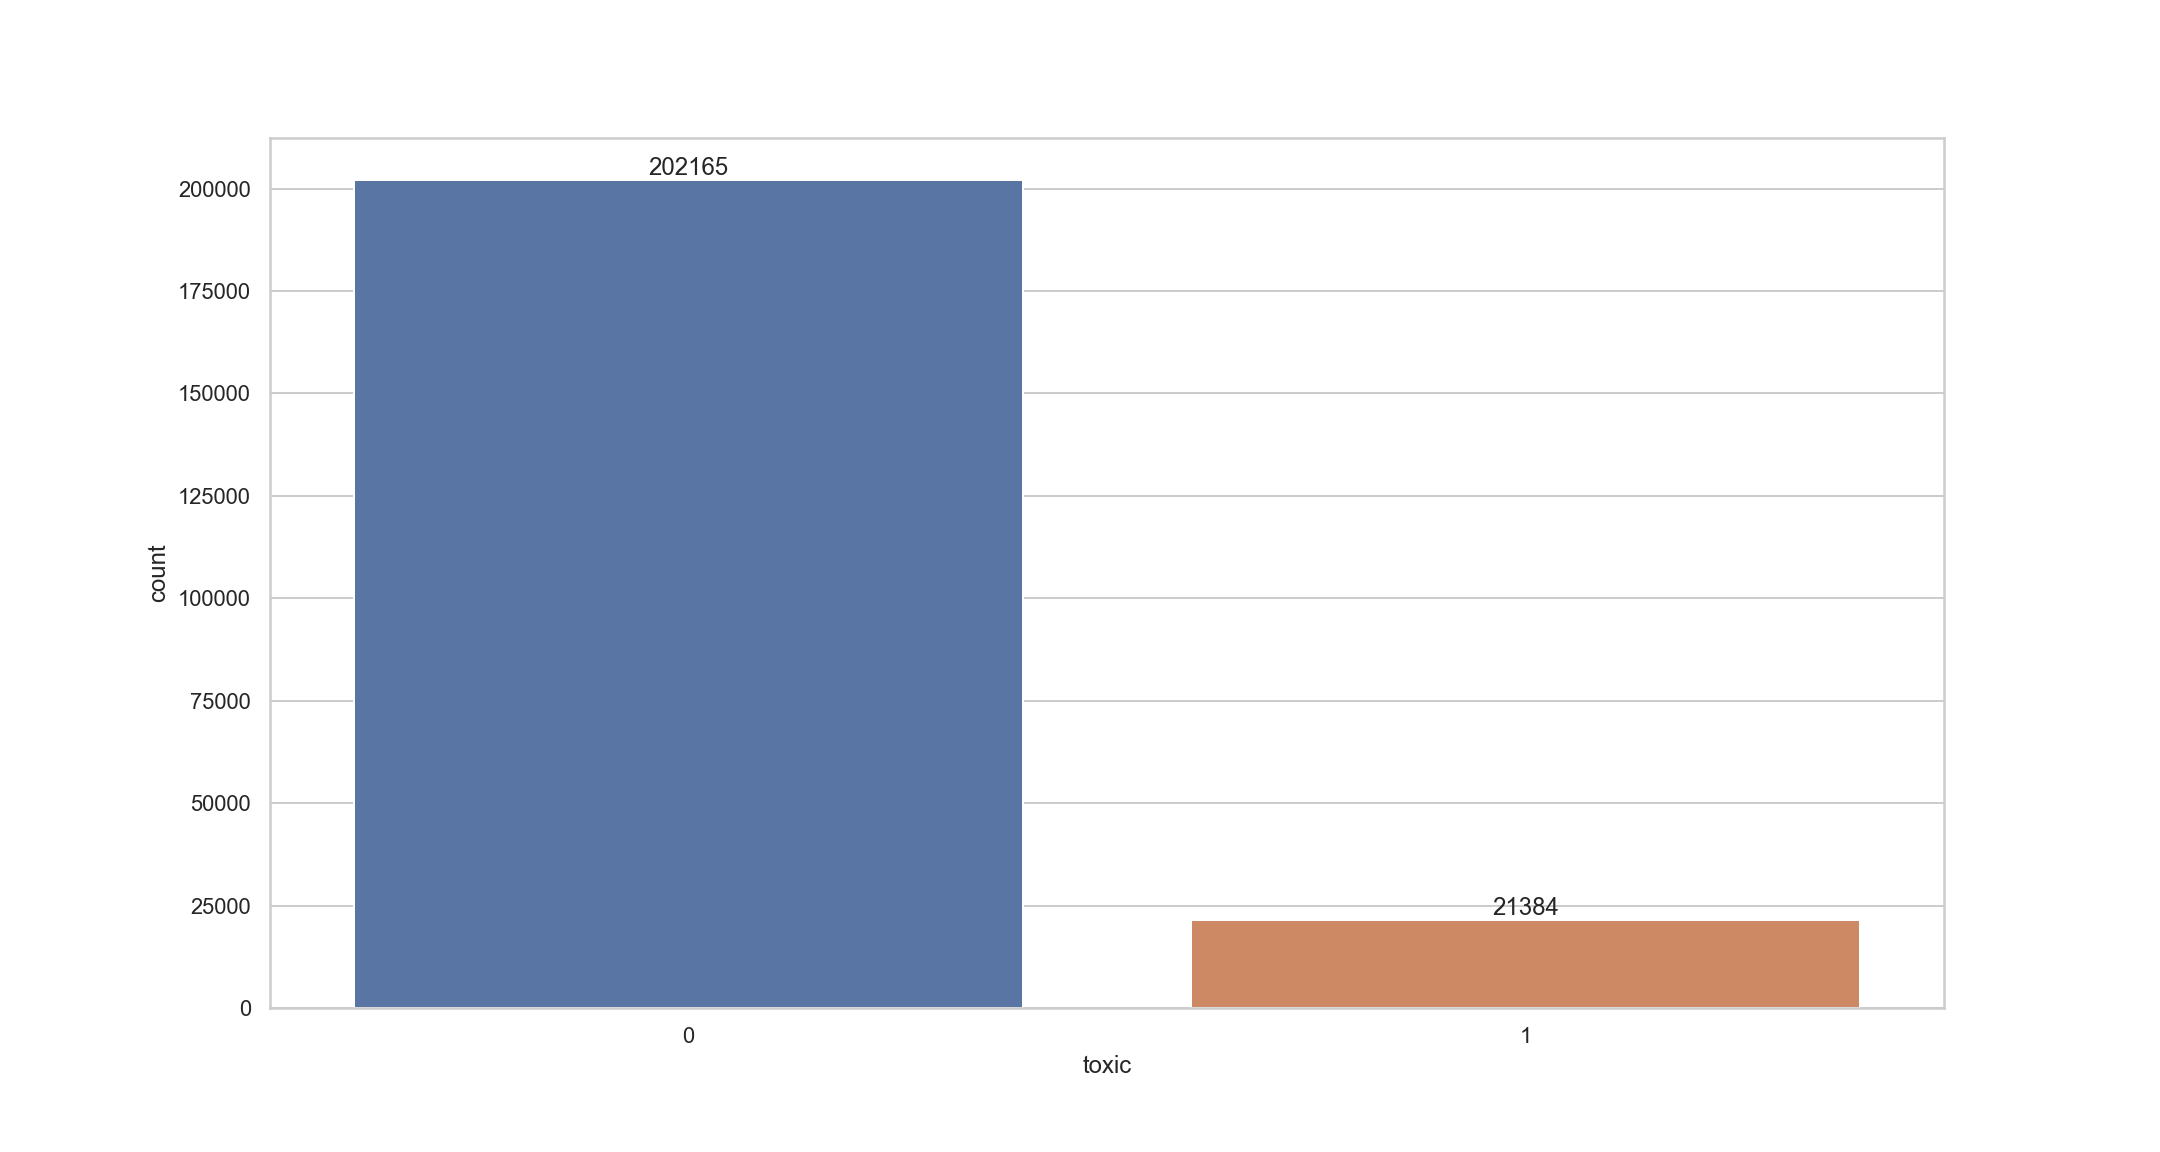
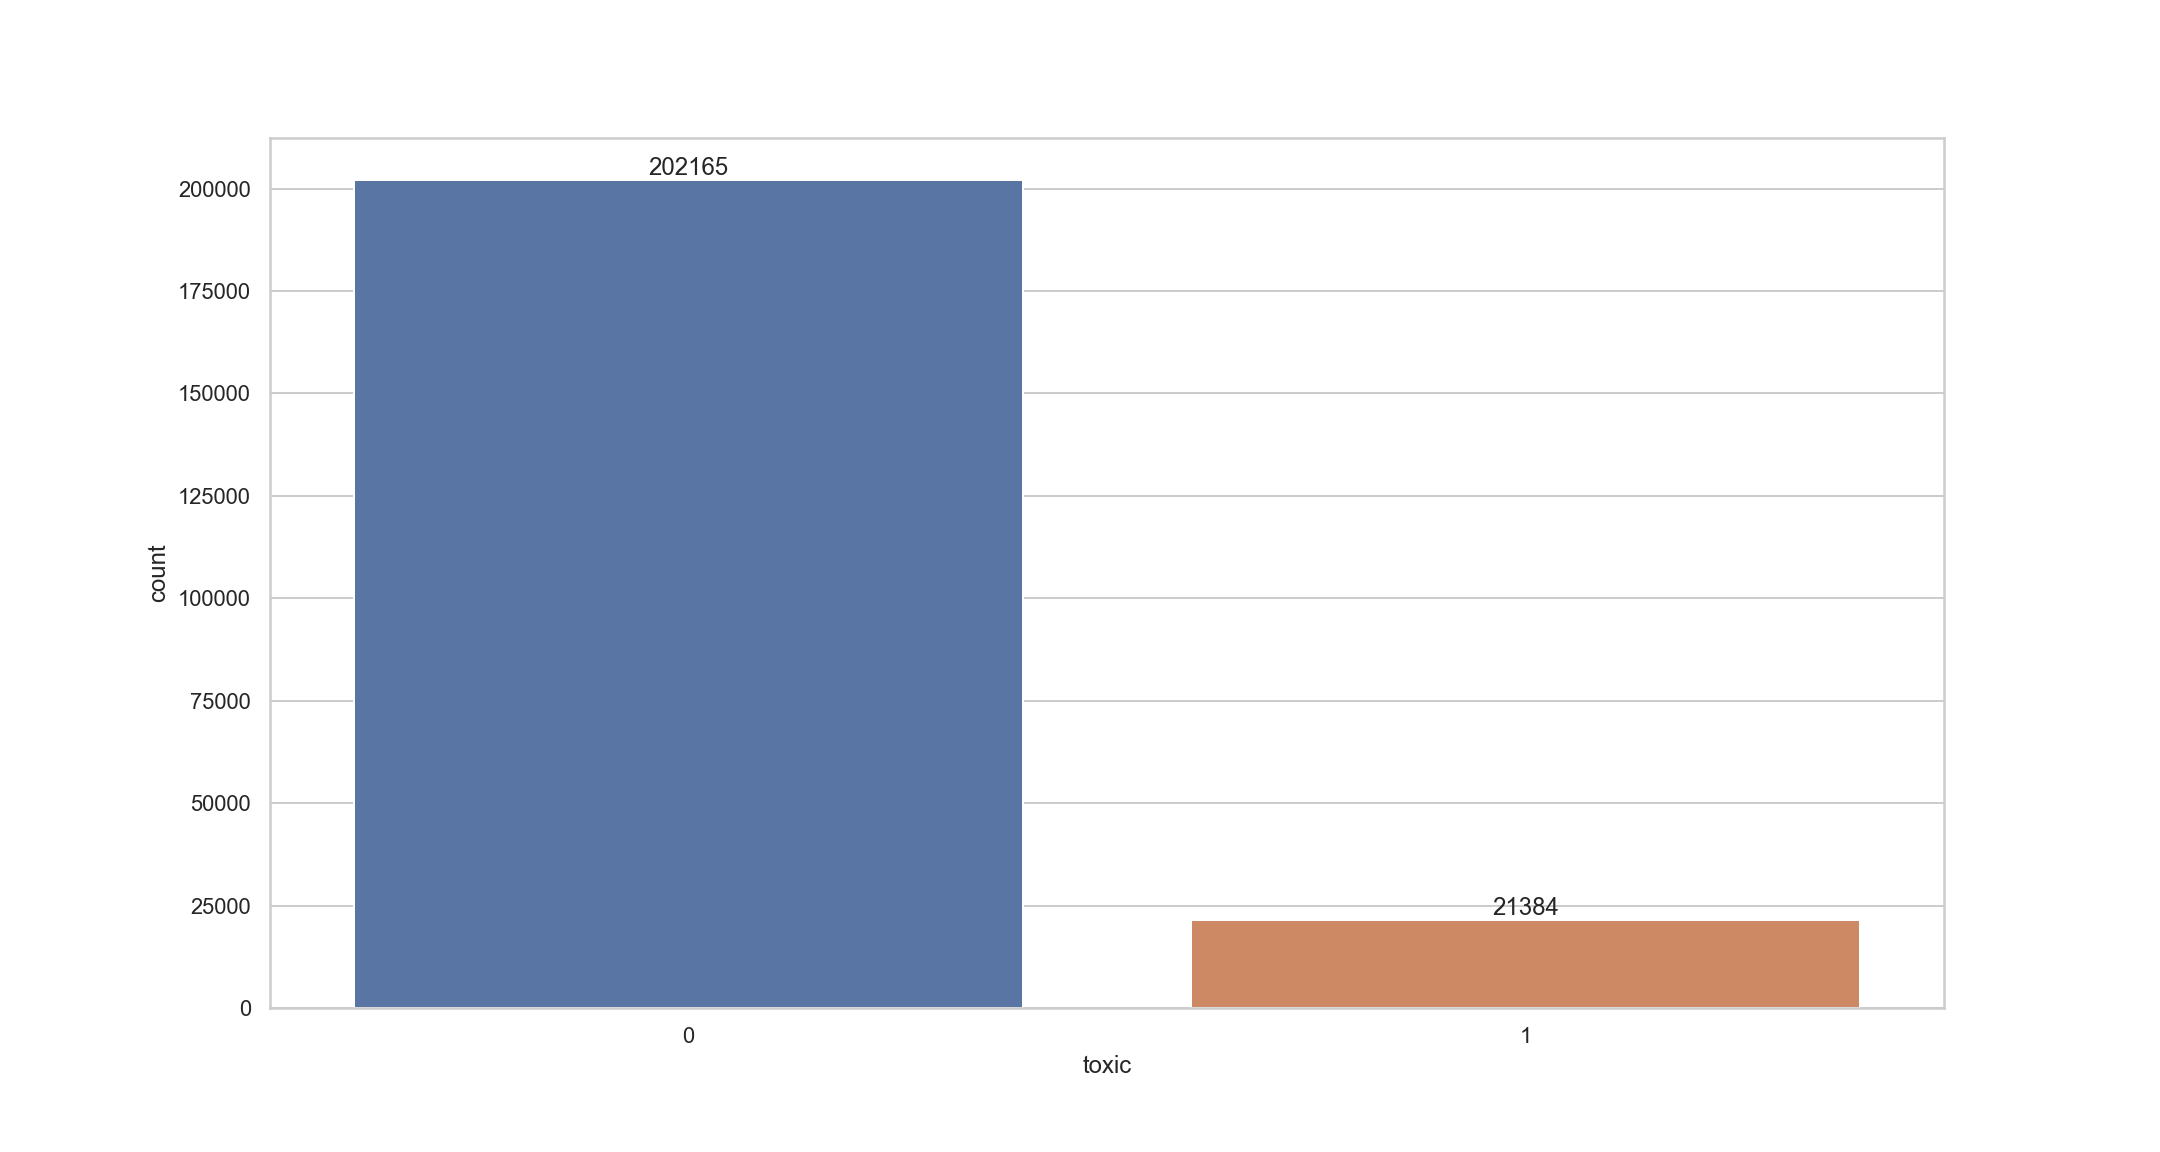

<Figure size 432x288 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

In [4]:
"""
Similar to the previous dashboard class, this dashboard also has two tabs. However, this dashboard is only used for 
the Wikipedia Toxic dataset to see the original counts of each class.
"""
class GraphicalExplorationDashboard2(param.Parameterized):
    
    stats = param.ObjectSelector(default='toxic', objects=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
    
    def plot(self):
        plt.clf()
        count_plot(temp_df, self.stats)
        return plt.gcf()
    
    def append_end(self):
        plt.clf()
        return ""

wtc_ge_2 = GraphicalExplorationDashboard2(name='')

dashboard = pn.Column('WTC Dashboard 2',
                      wtc_ge_2.param,
                      pn.Tabs(
                          ('Plot', wtc_ge_2.plot),
                          ('',wtc_ge_2.append_end)
                      )
                     )

dashboard.embed()

Toxic class has the highest number, followed by obscene and insult.

## 2.2.2 Davidson Dataset Dashboard


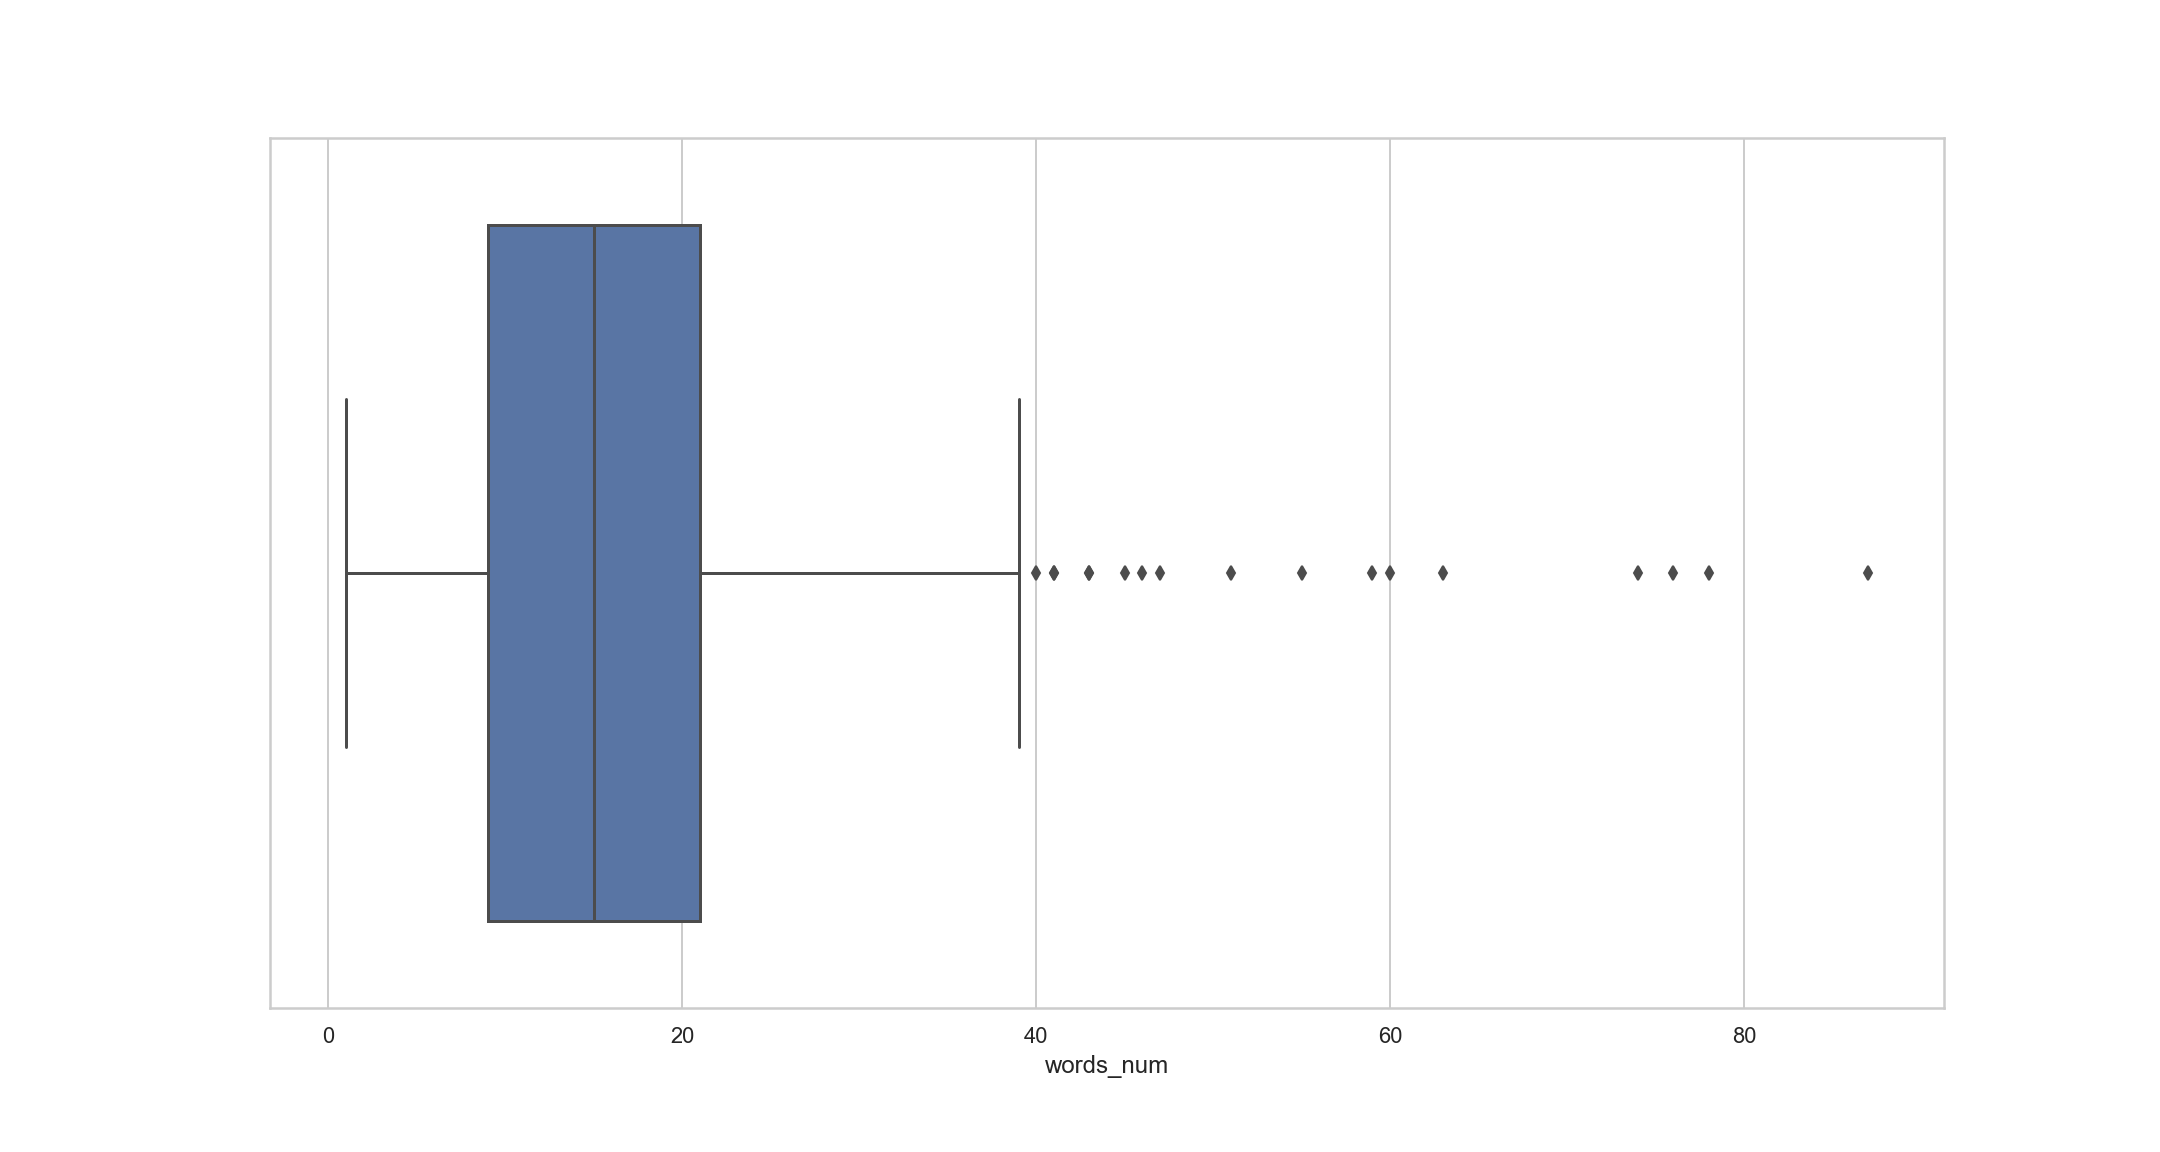
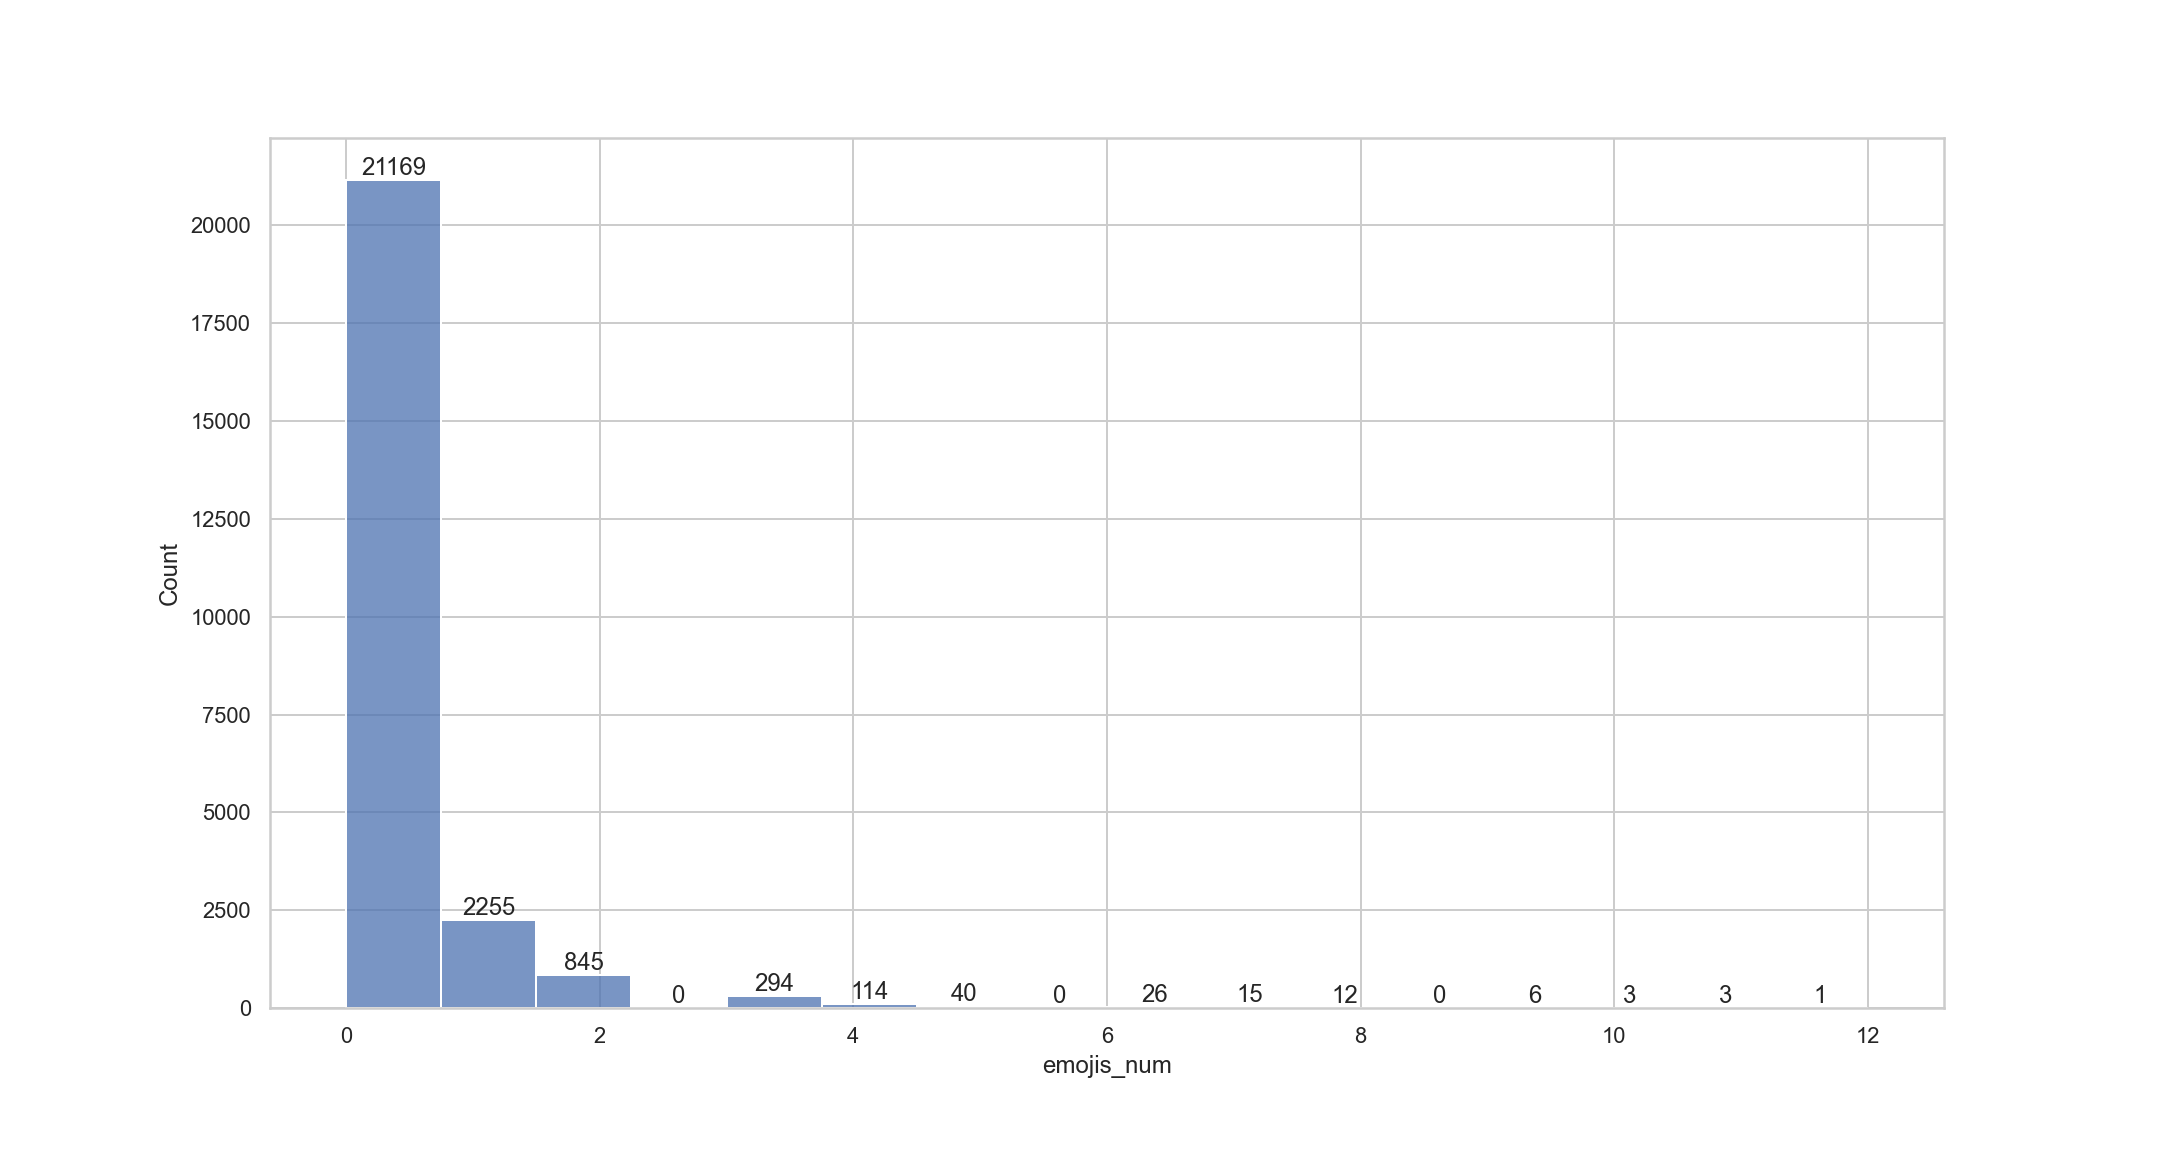
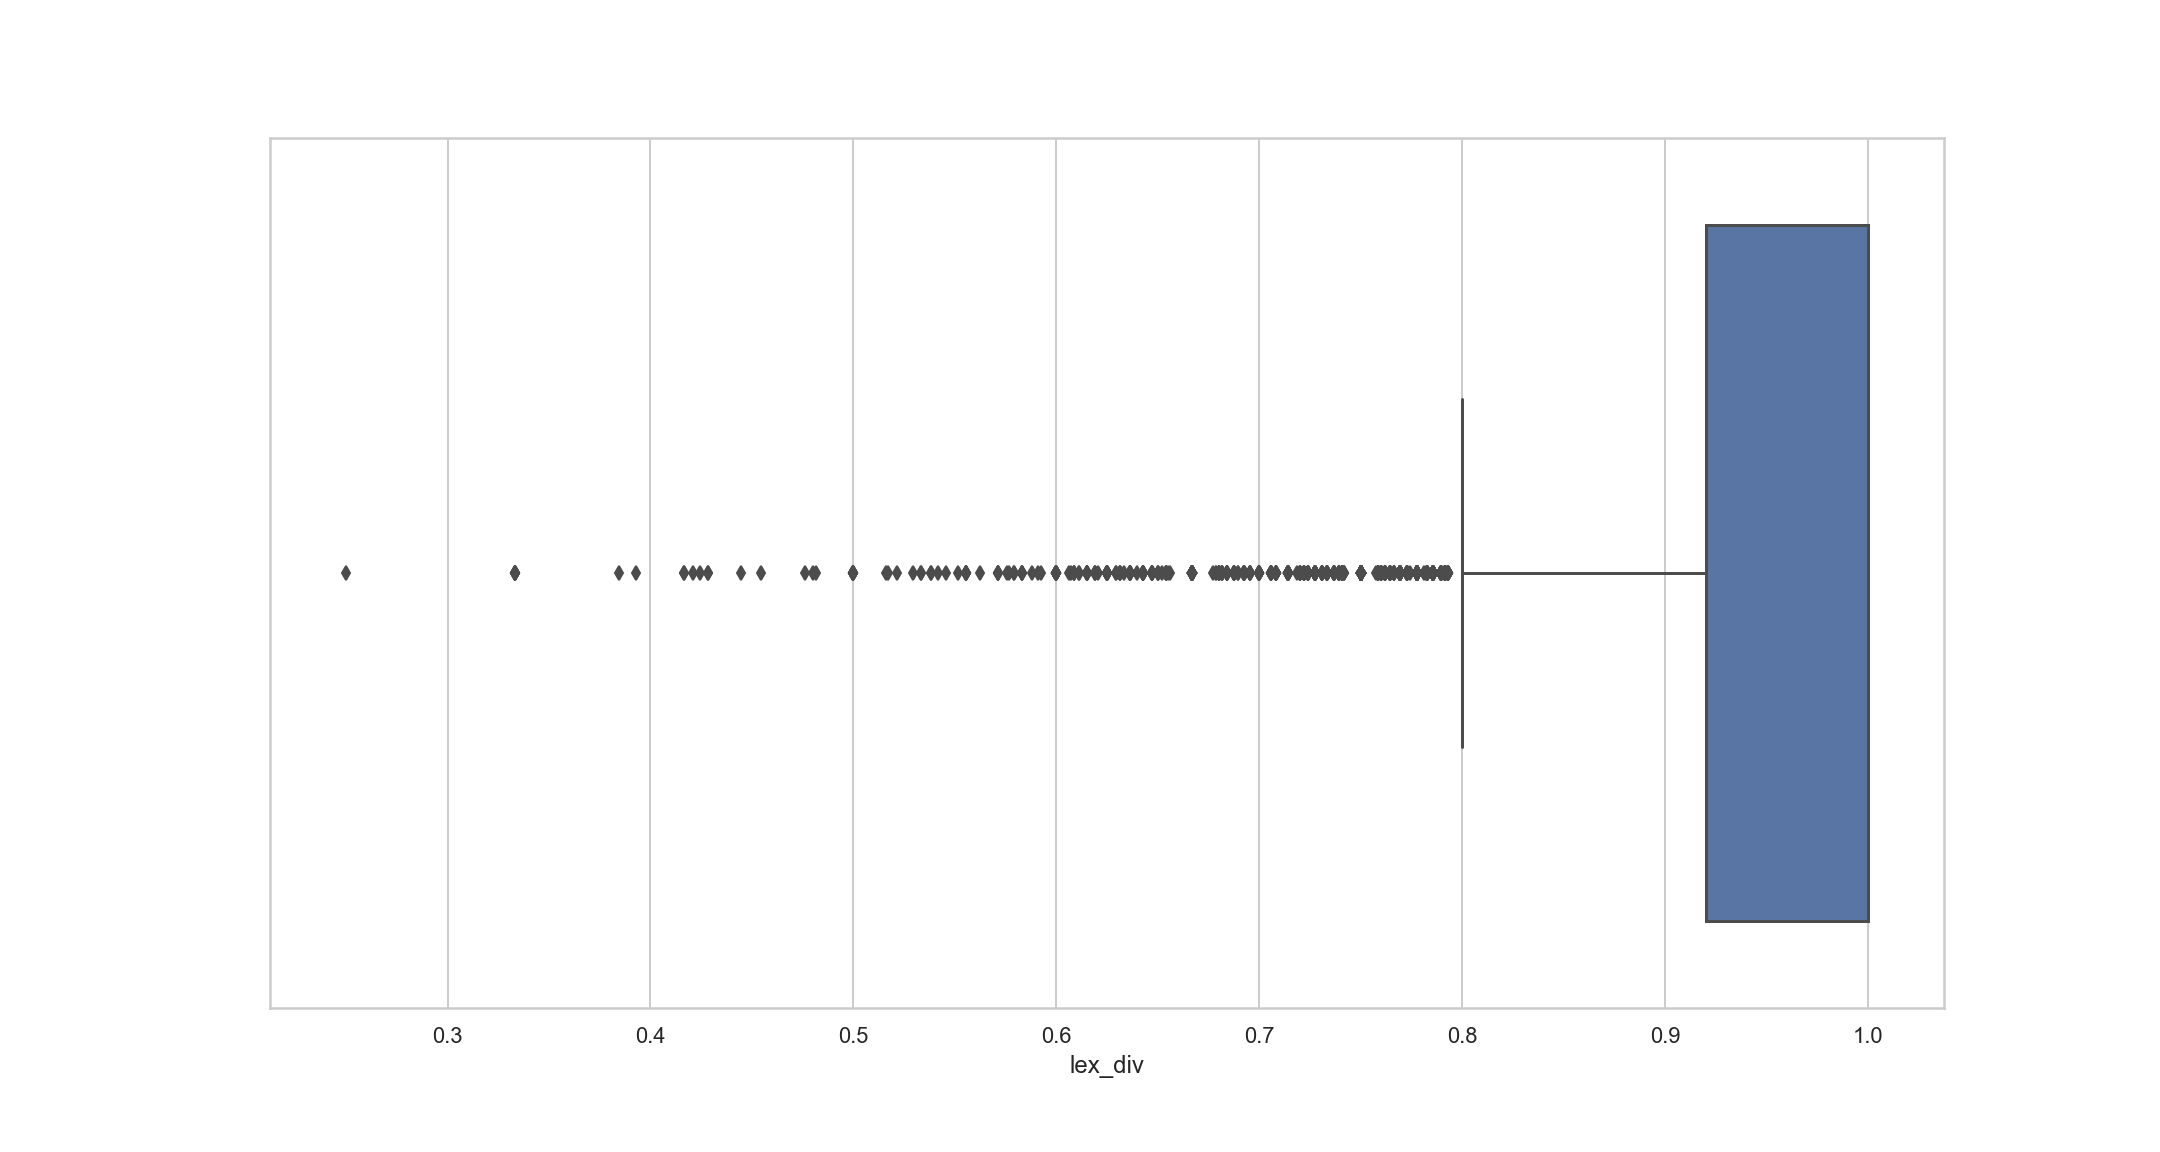
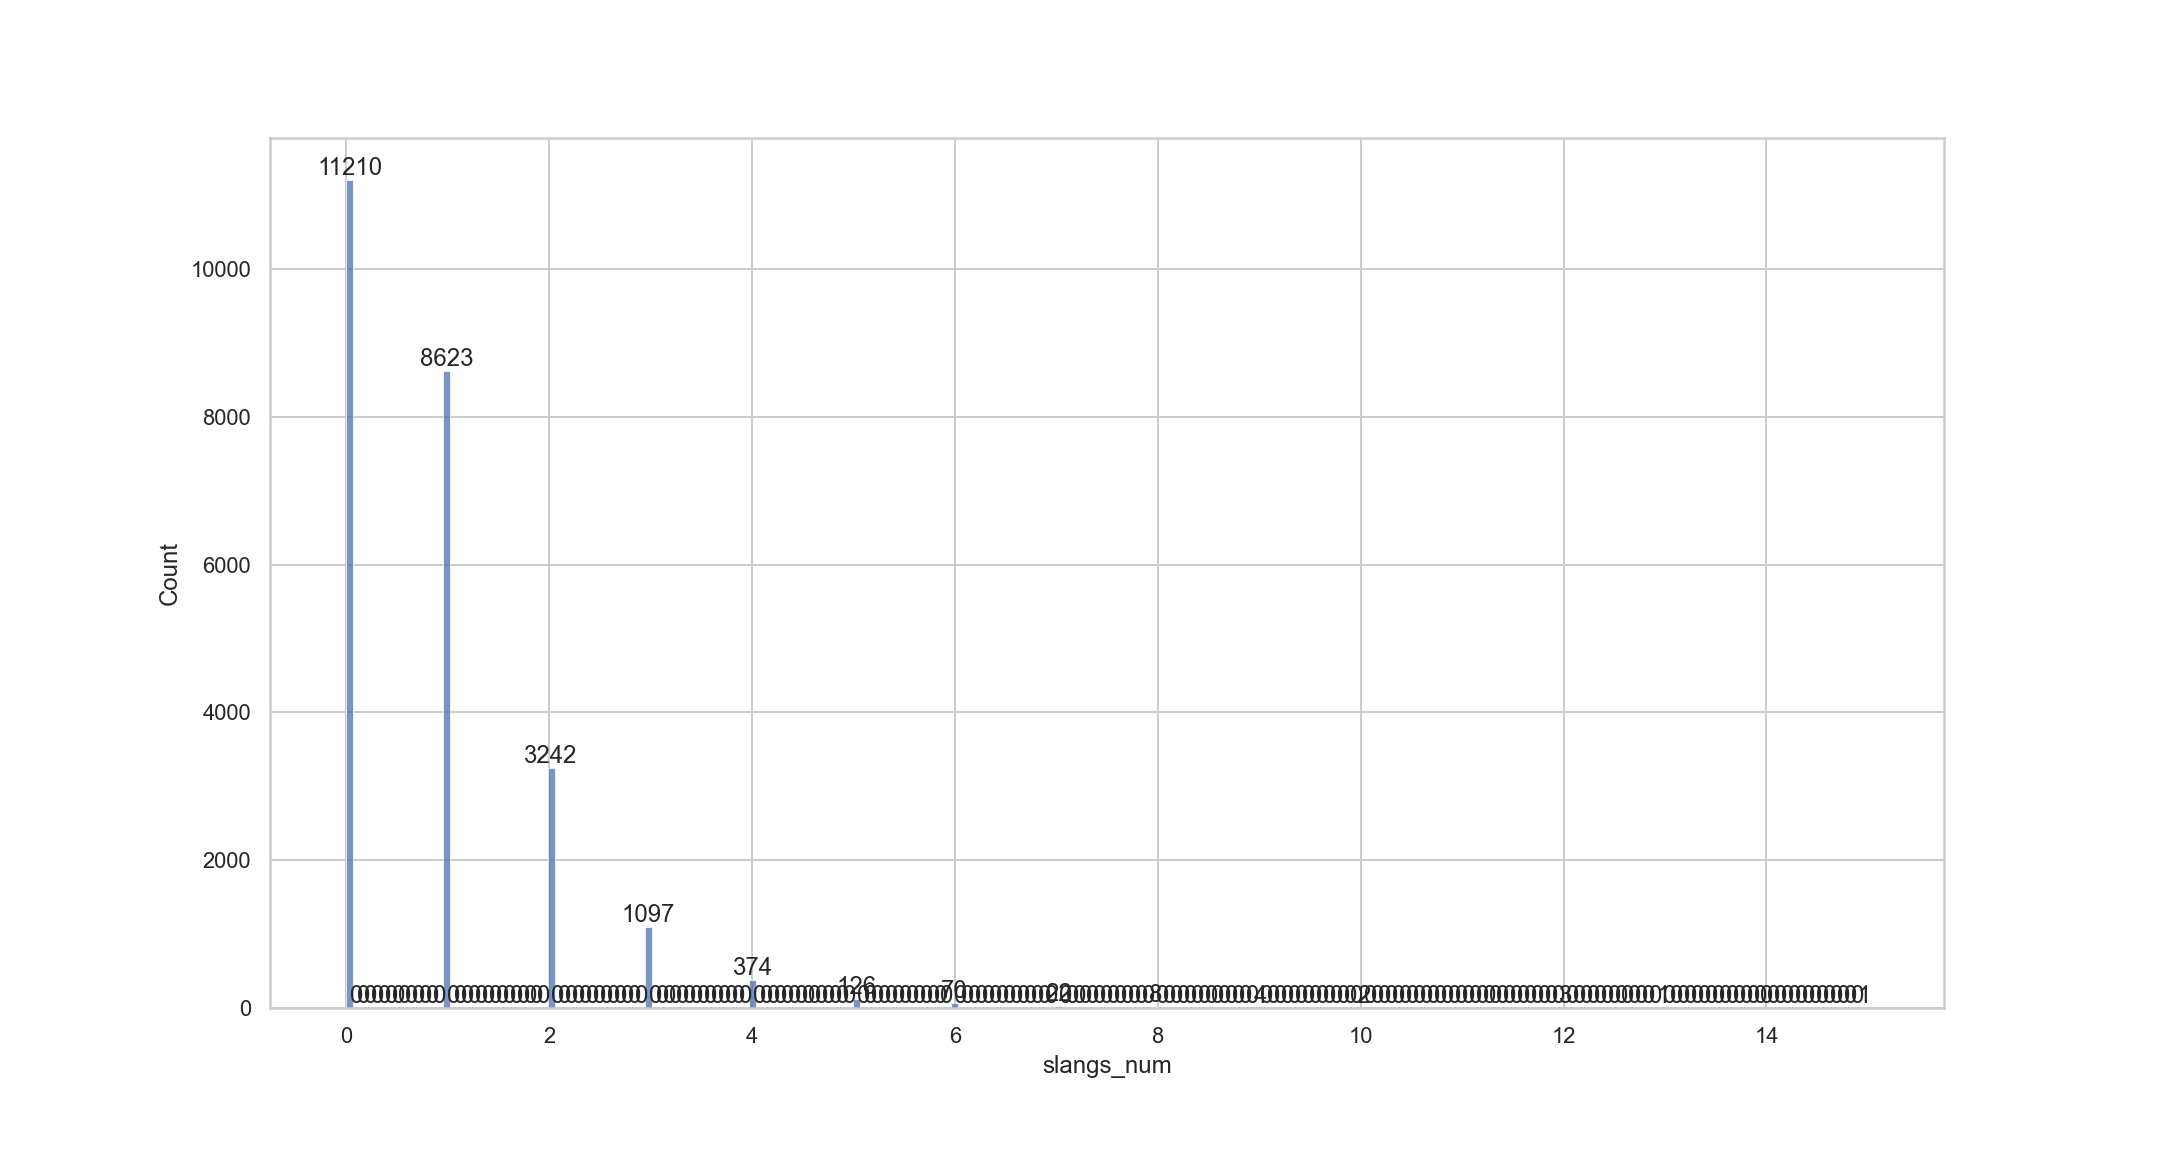
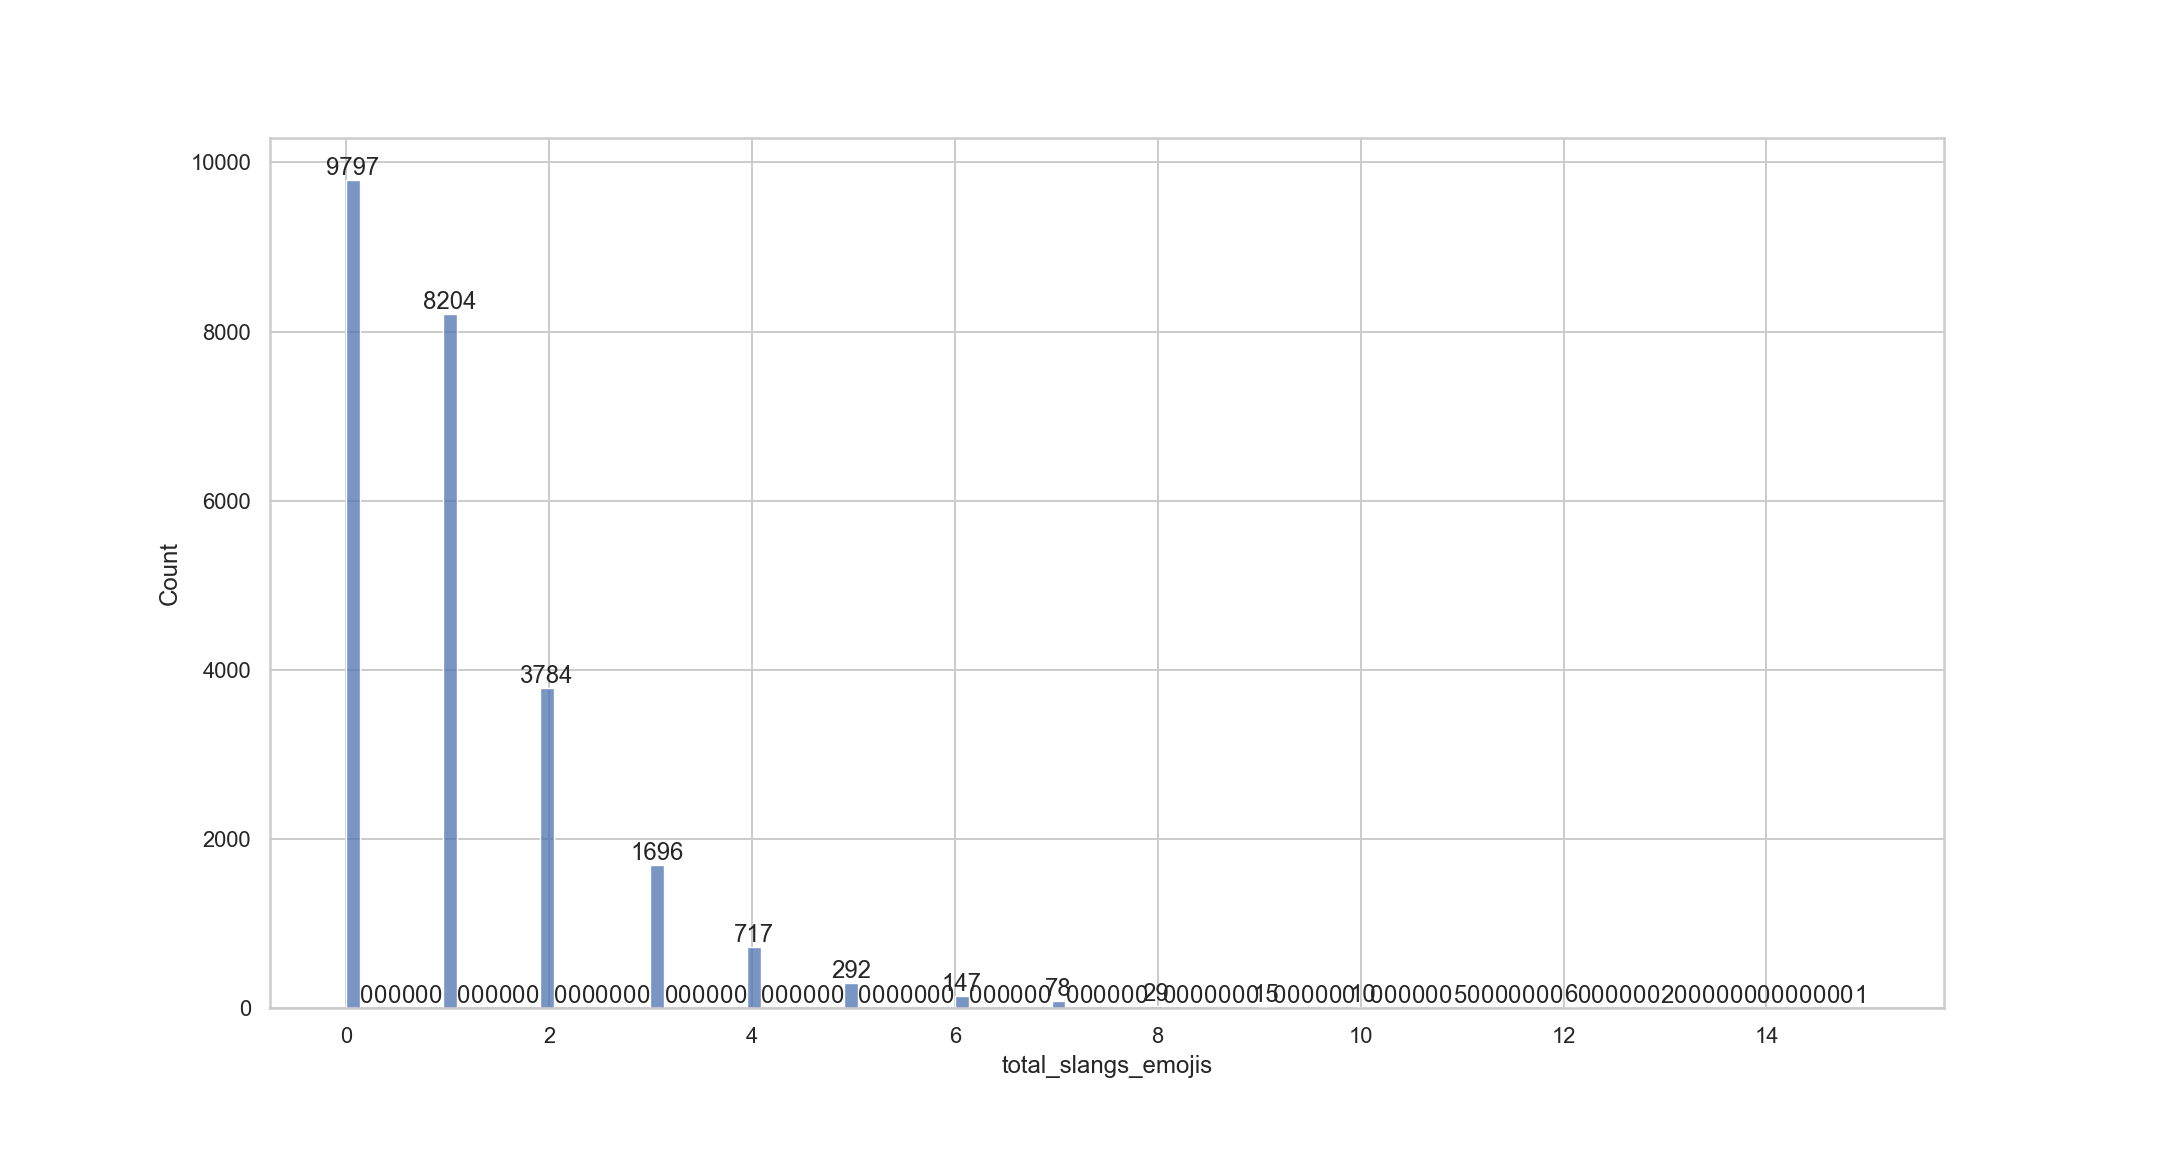
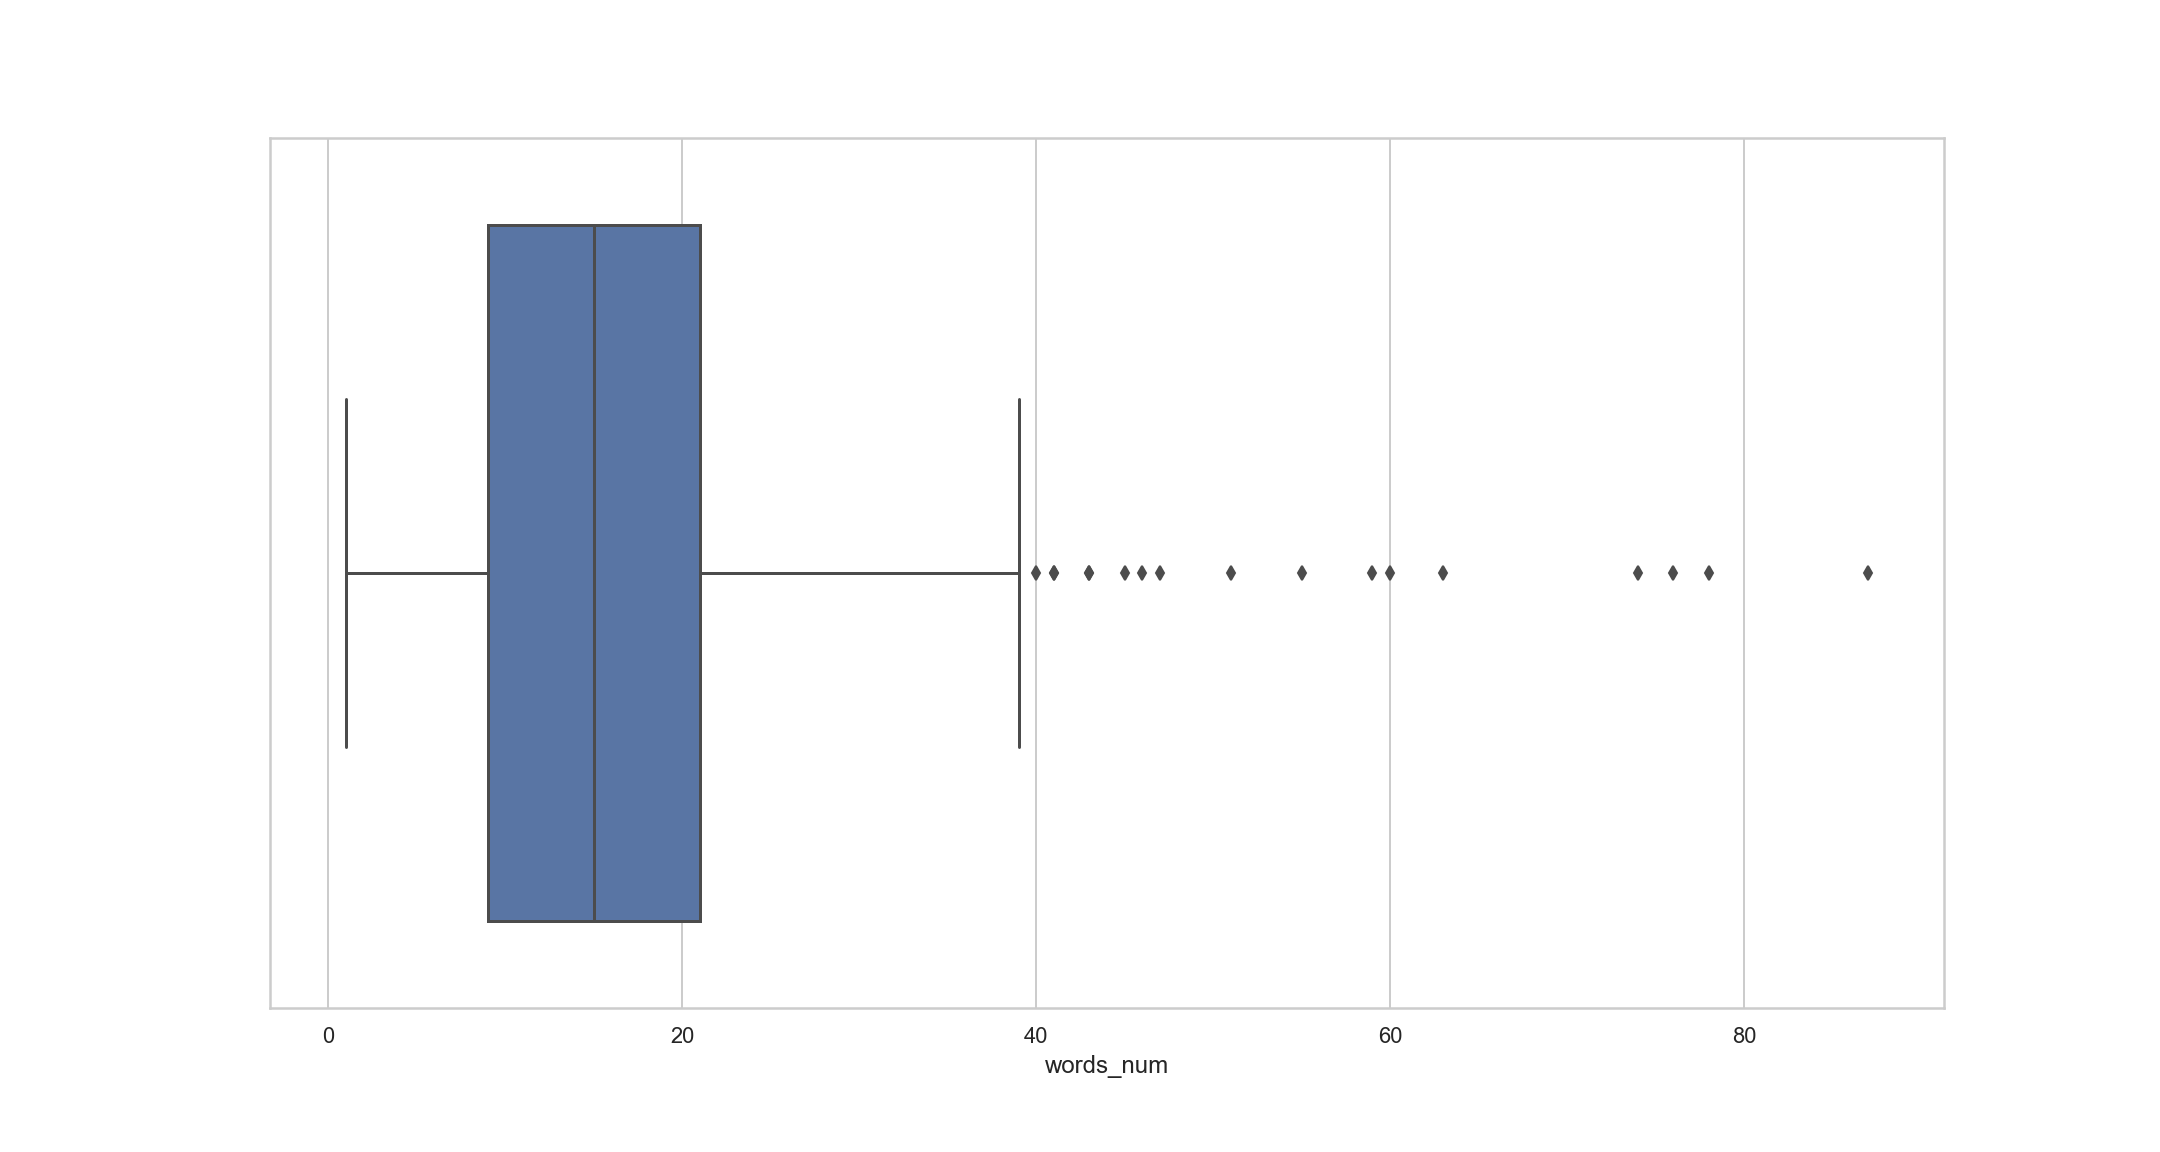

<Figure size 432x288 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

In [5]:
temp_df = davidson_df

davidson_ge_1 = GraphicalExplorationDashboard(name='')

dashboard = pn.Column('Davidson Dashboard',
                      davidson_ge_1.param,
                      pn.Tabs(
                          ('Plot', davidson_ge_1.plot),
                          ('',davidson_ge_1.append_end)
                      )
                     )

dashboard.embed()

The tweets in Davidson dataset are not longer than 100 words and have very high lexical diversity. There are a lot more slangs than the number of emojis.

## 2.2.3 Twitter Abusive Dataset


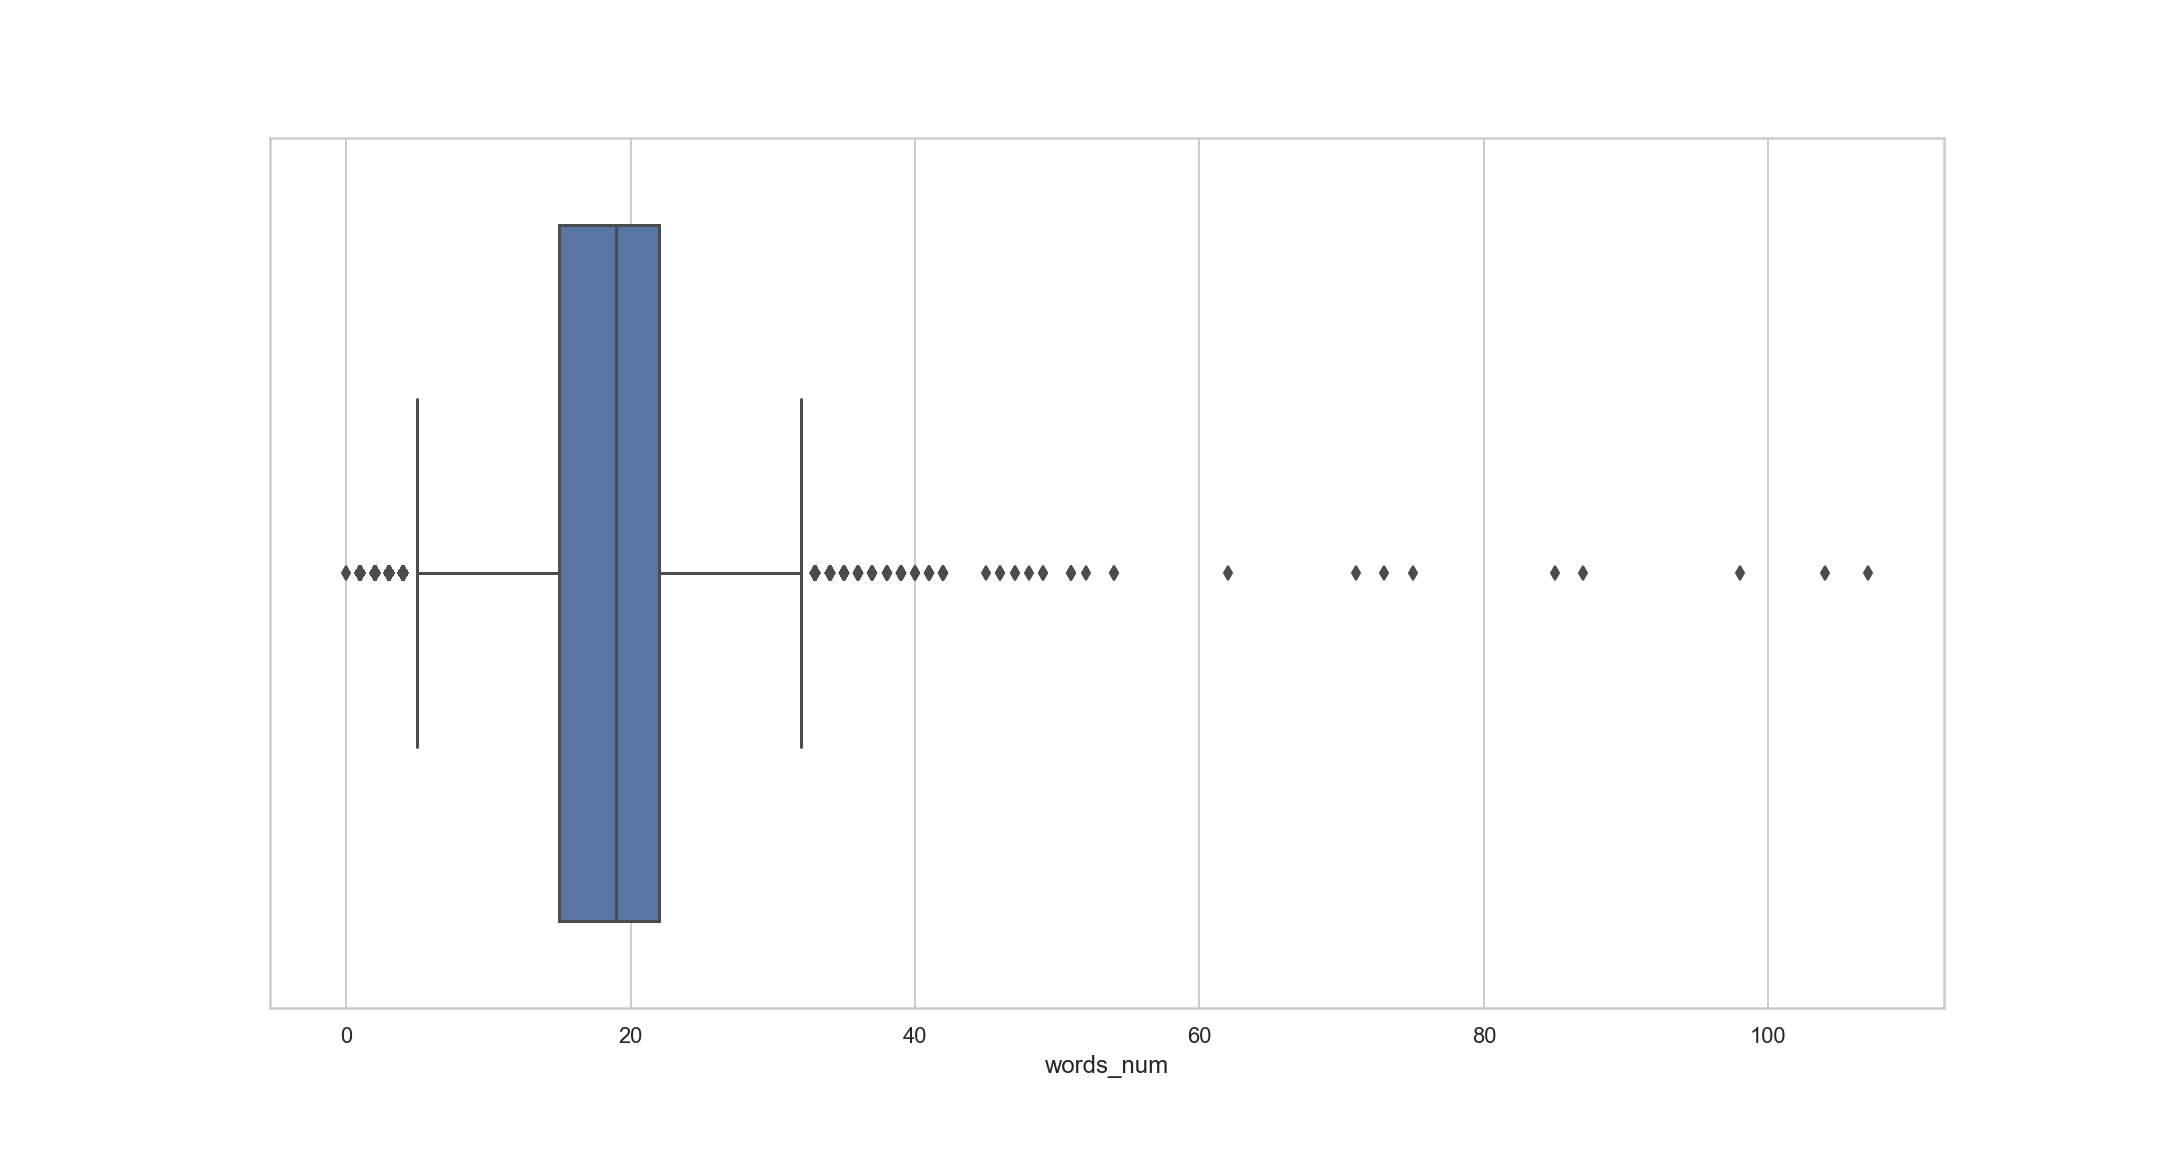
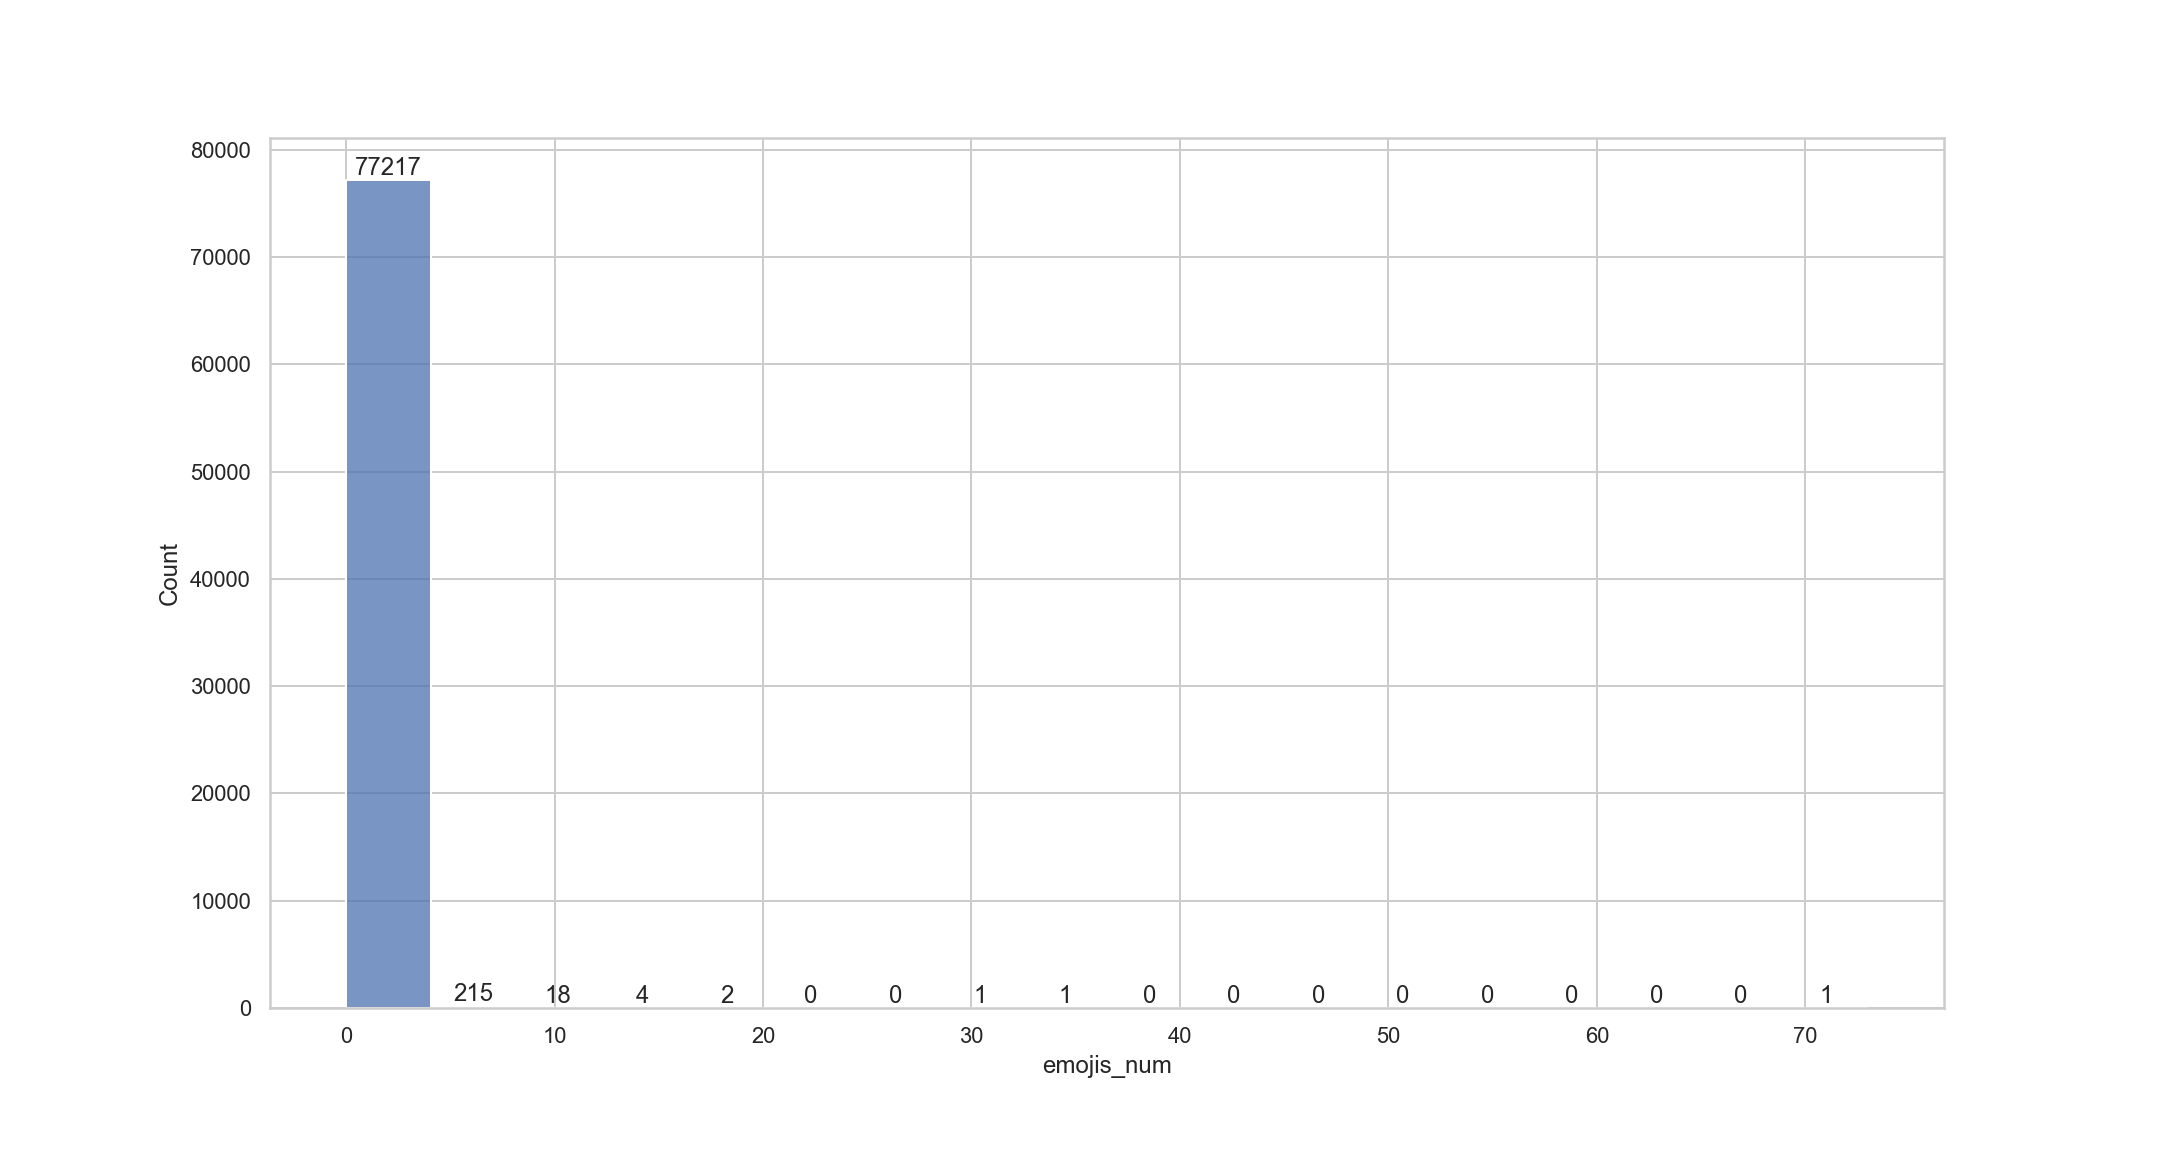
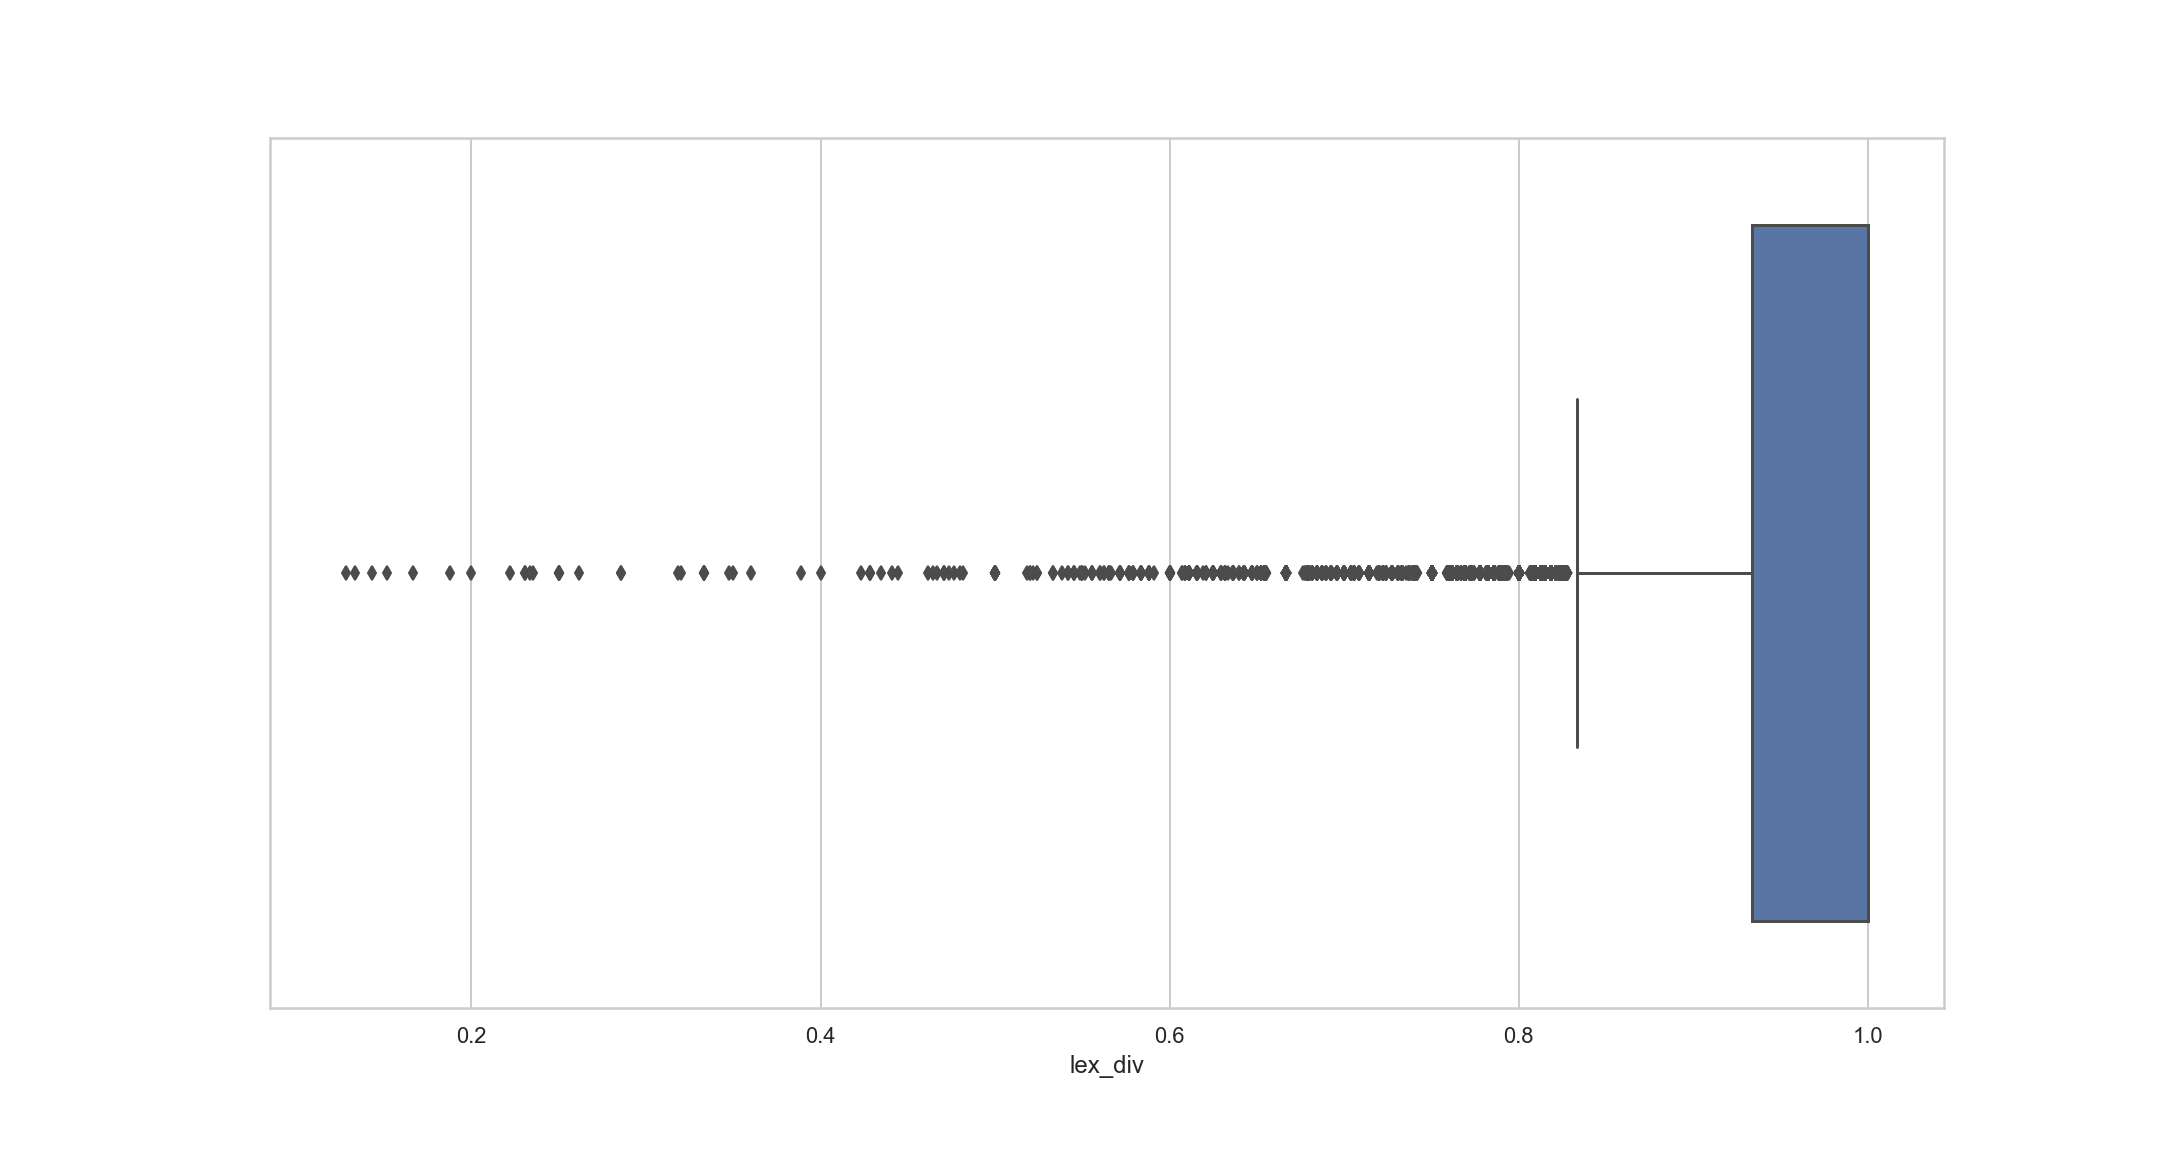
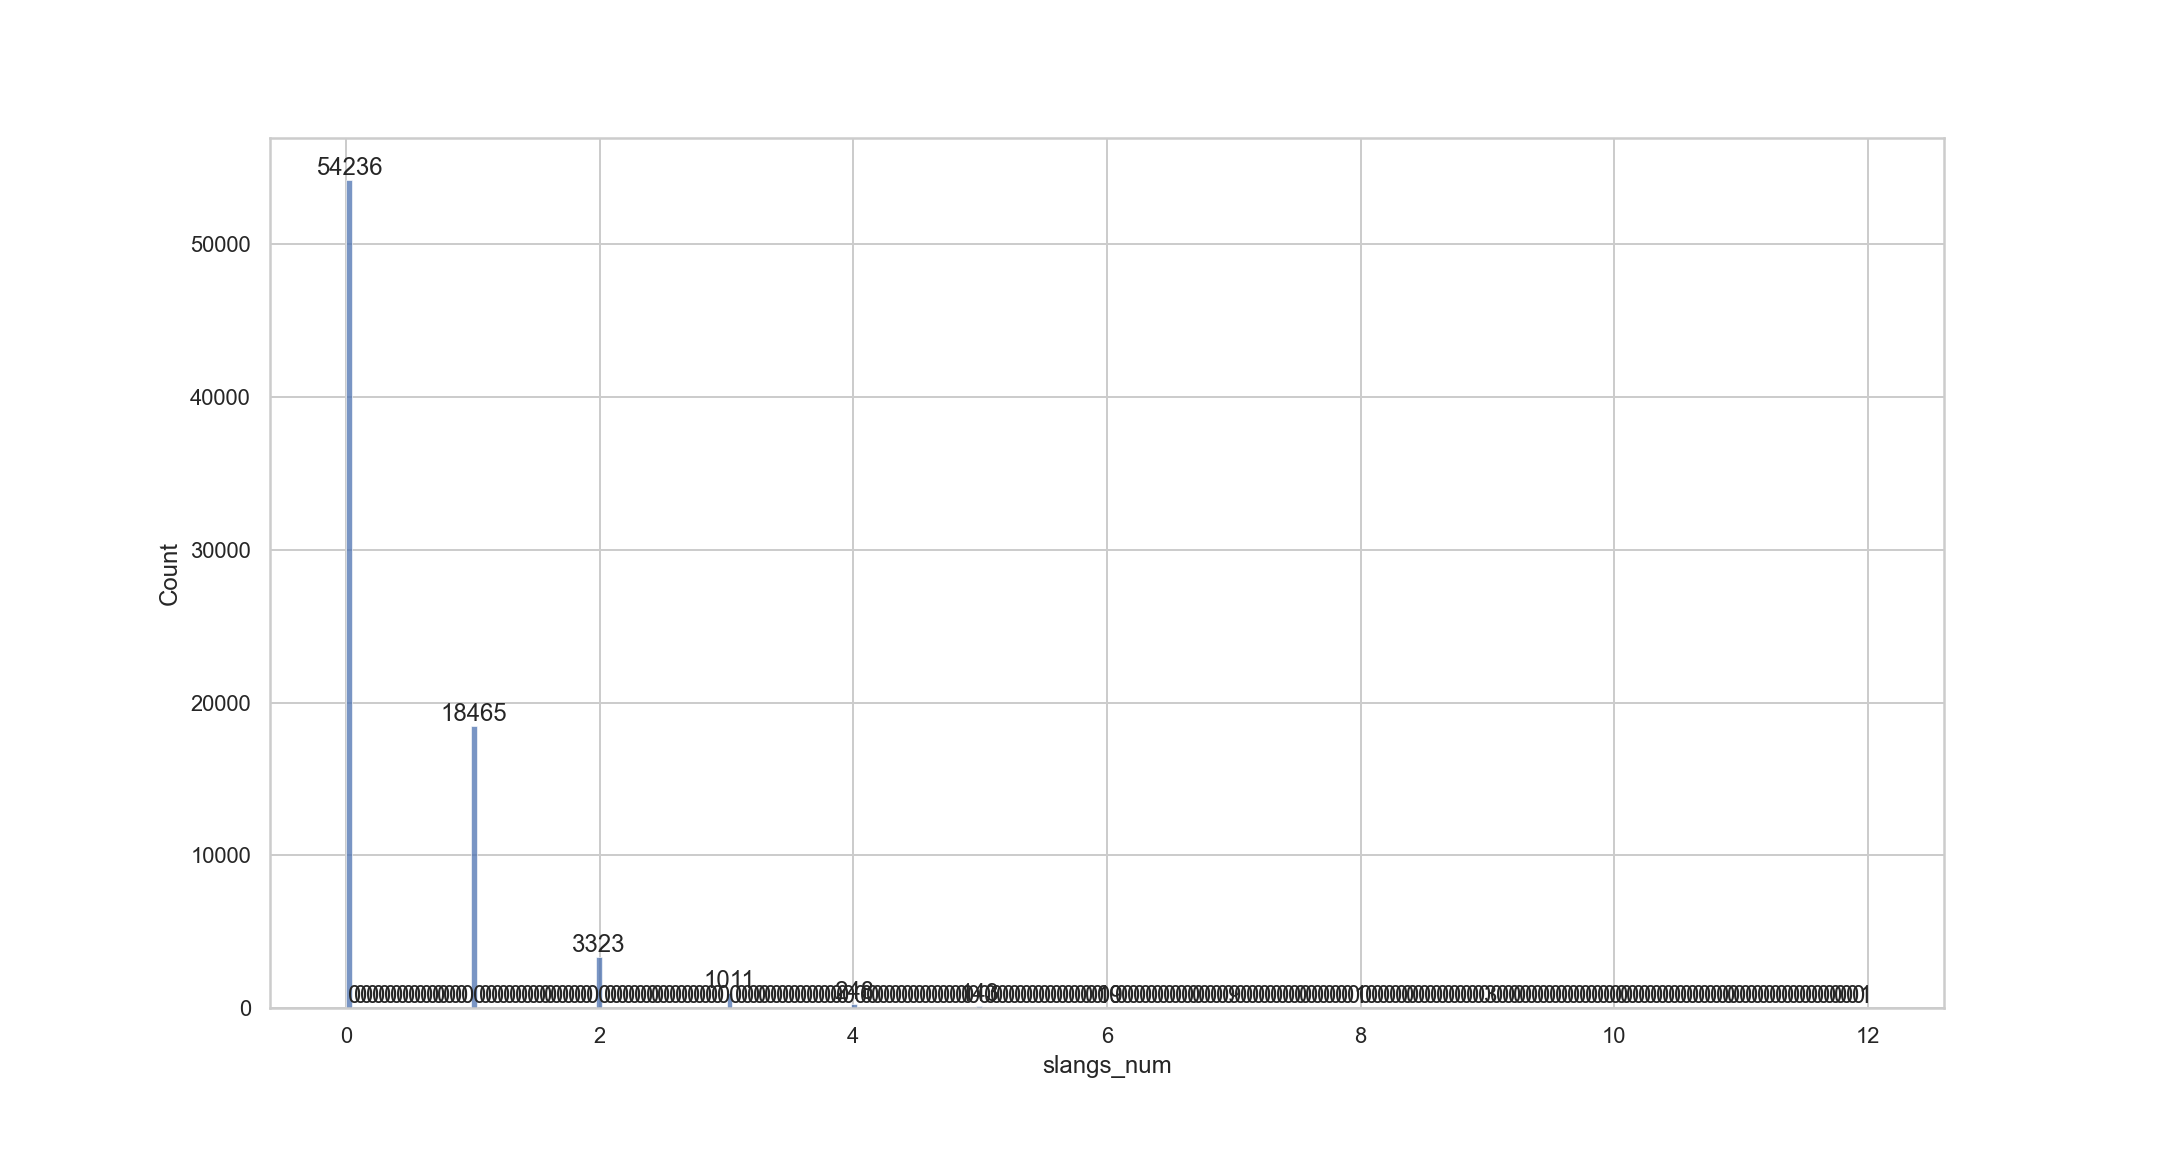
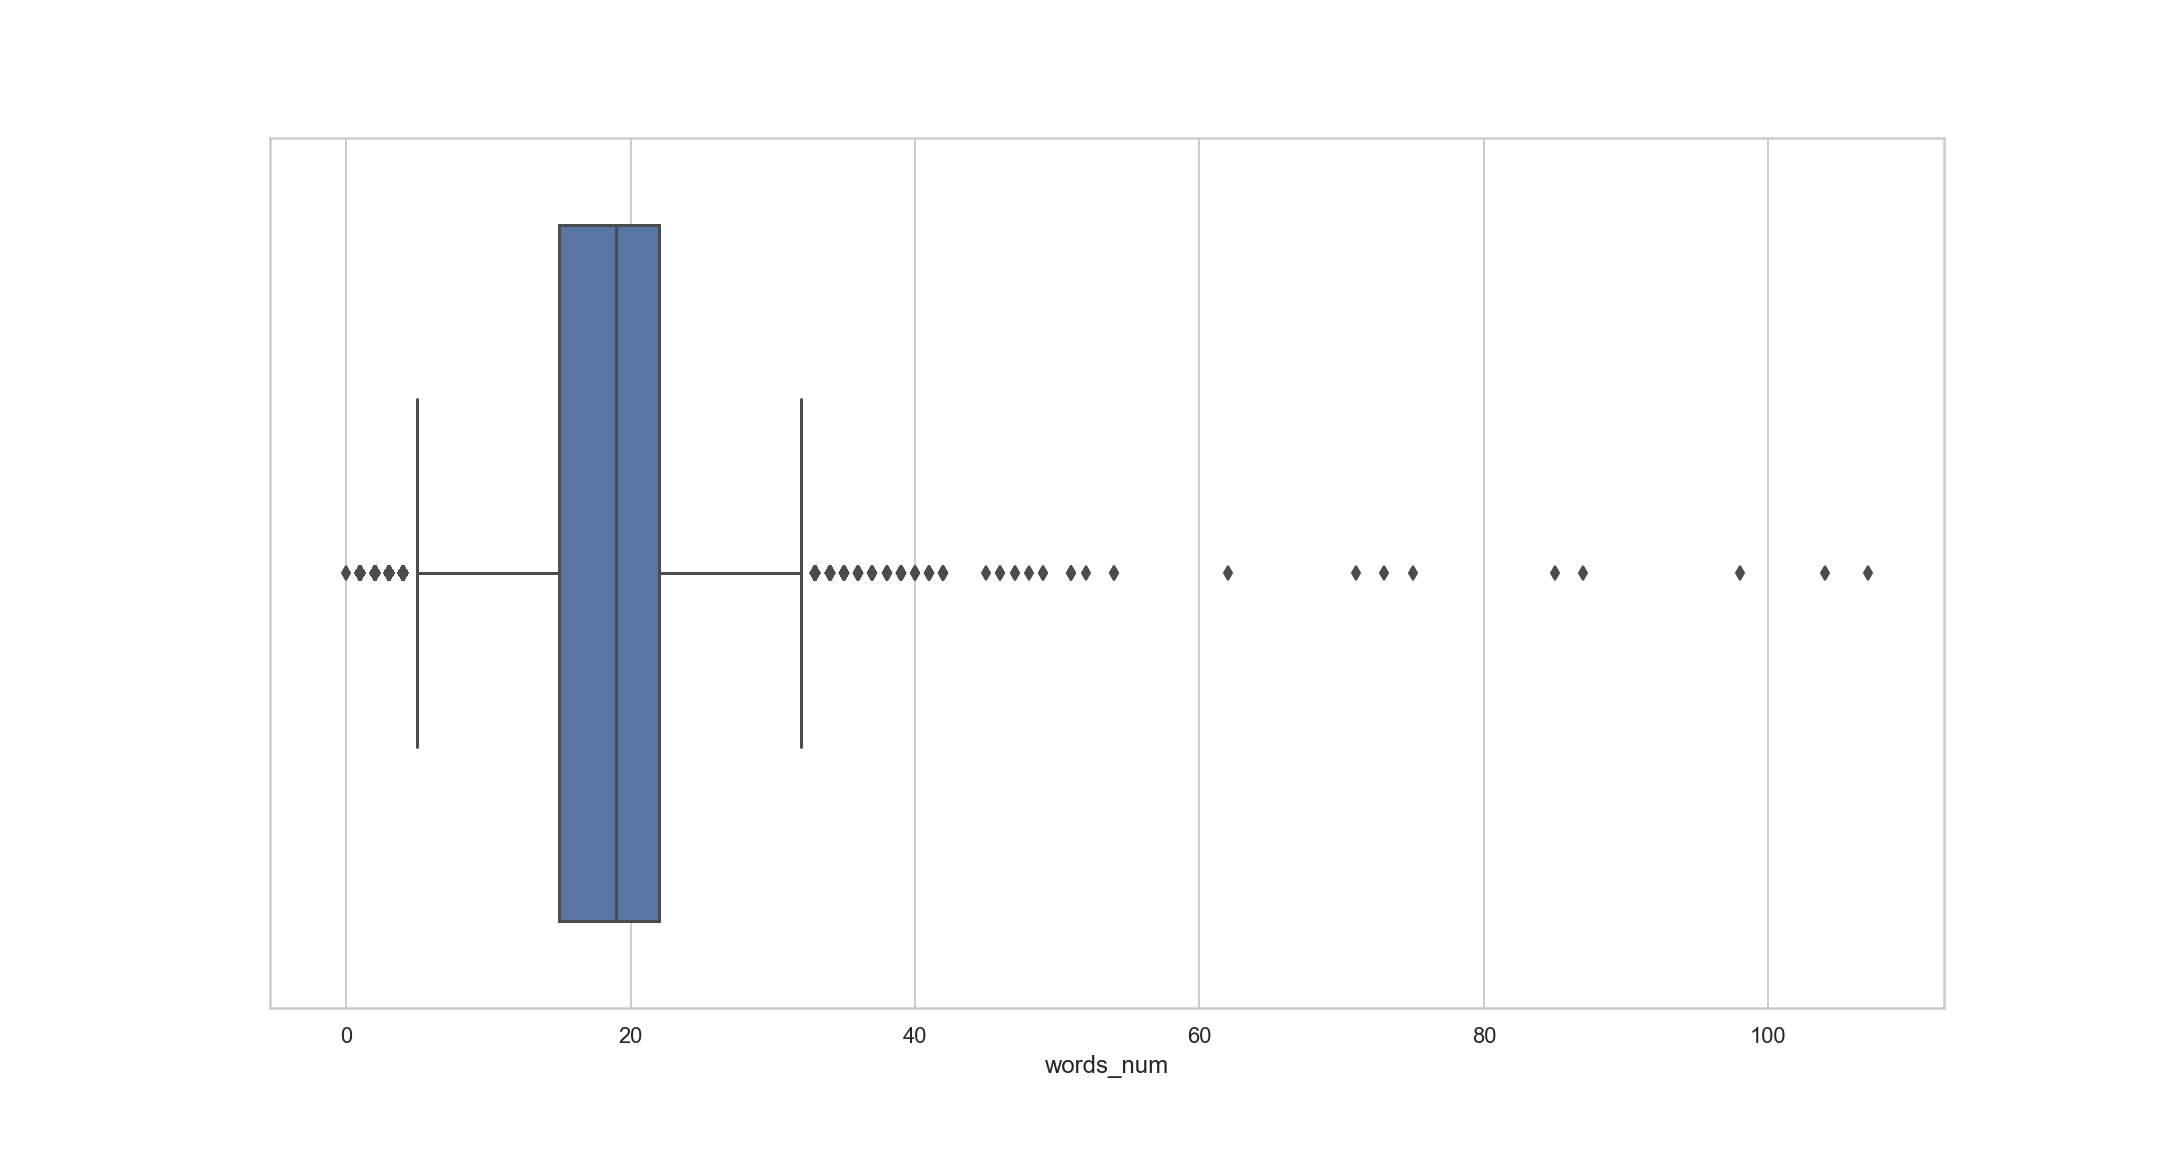

<Figure size 432x288 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

In [6]:
temp_df = tweeter_df

tweeter_ge_1 = GraphicalExplorationDashboard(name='')

dashboard = pn.Column('Tweeter Abusive Dashboard',
                      tweeter_ge_1.param,
                      pn.Tabs(
                          ('Plot', tweeter_ge_1.plot),
                          ('',tweeter_ge_1.append_end)
                      )
                     )

dashboard.embed()

In the Tweeter abusive dataset, in terms of number of words and lexical diversity, there are more outliers compared to those in Davidson. There are also more slangs than emojis.

## 2.2.4 ChatEval Tweeter


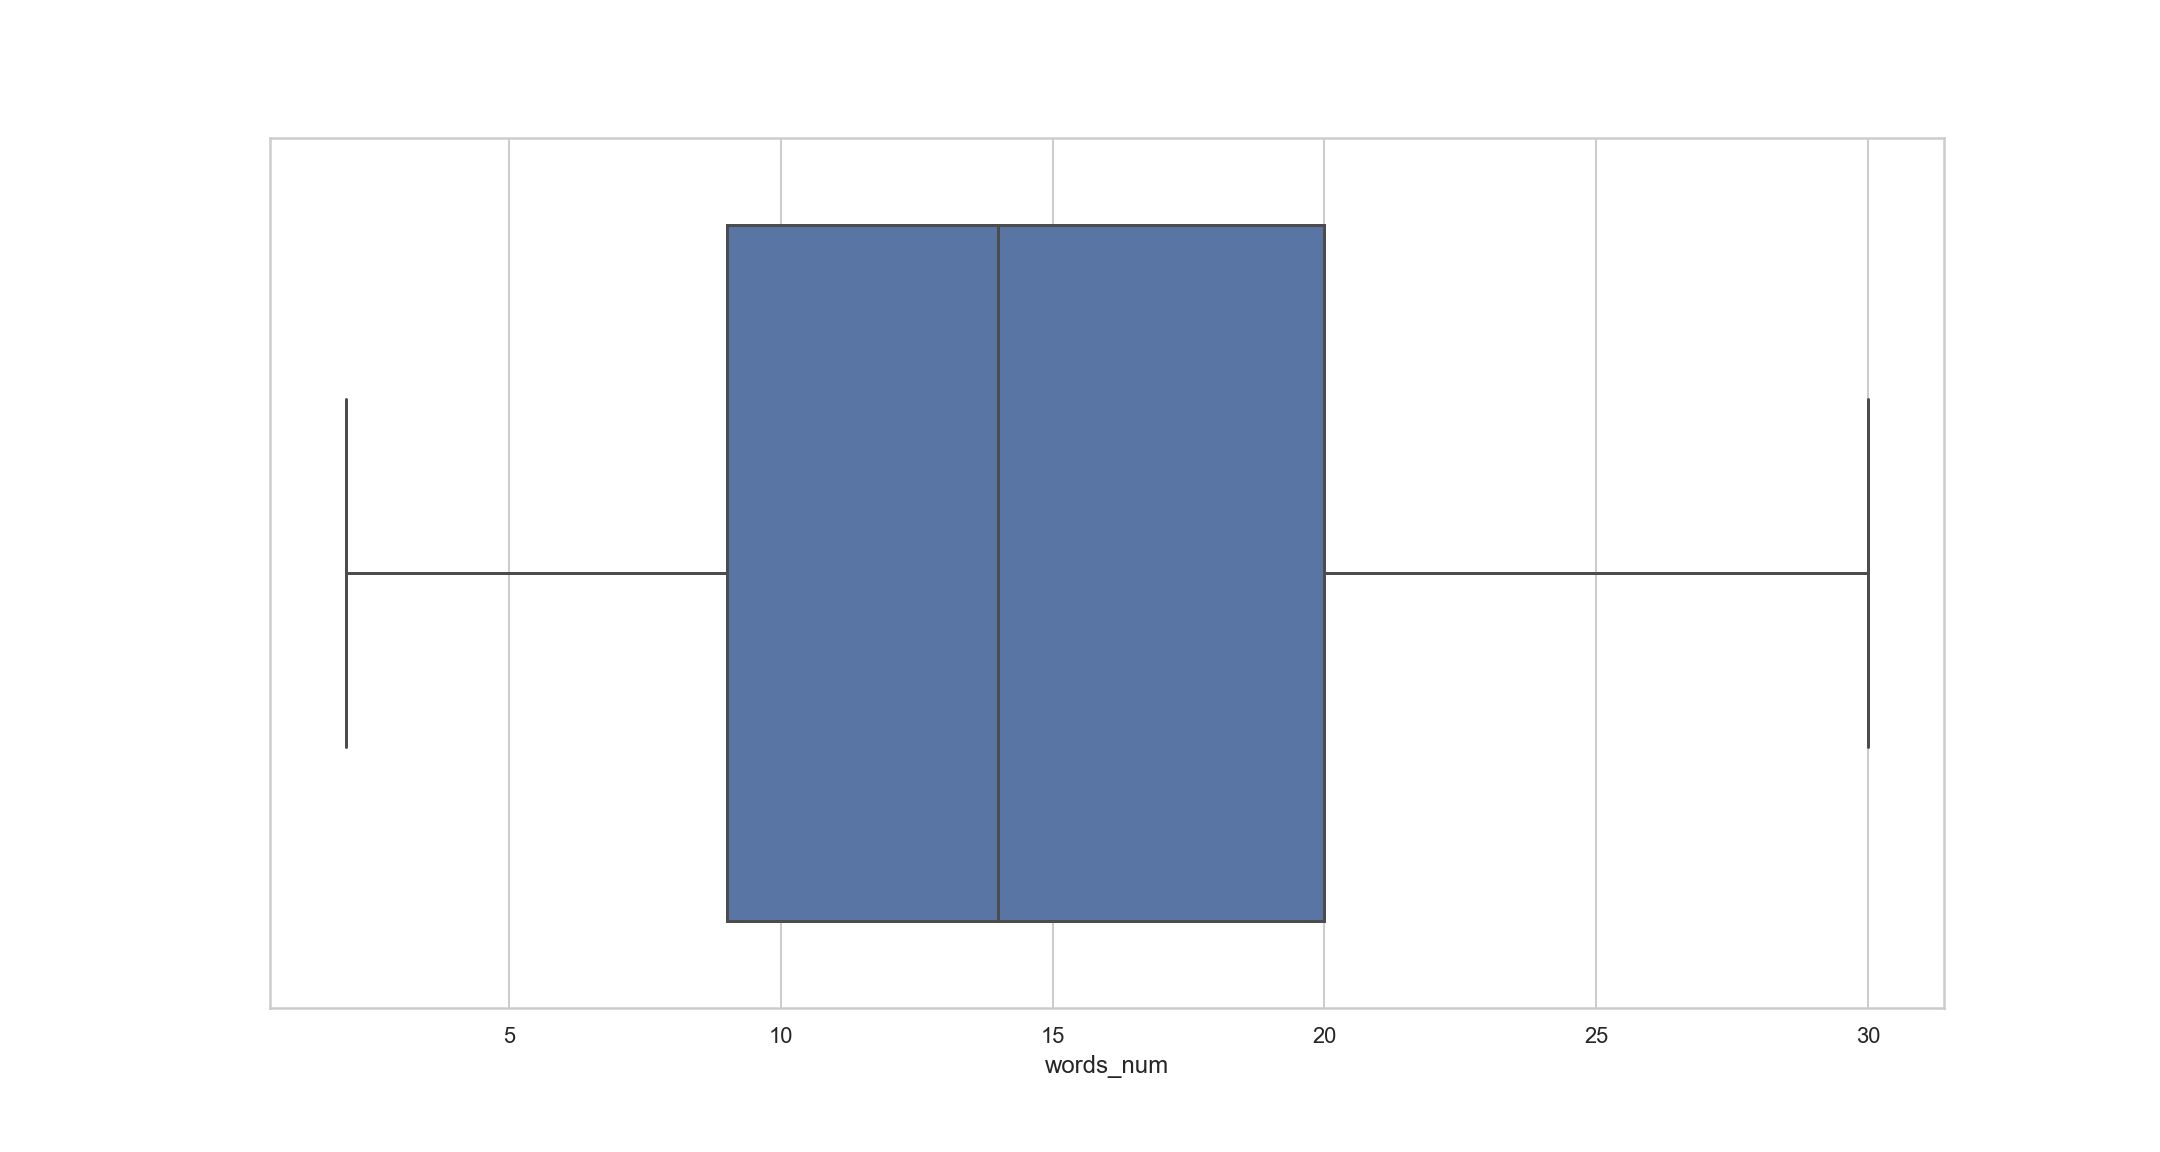
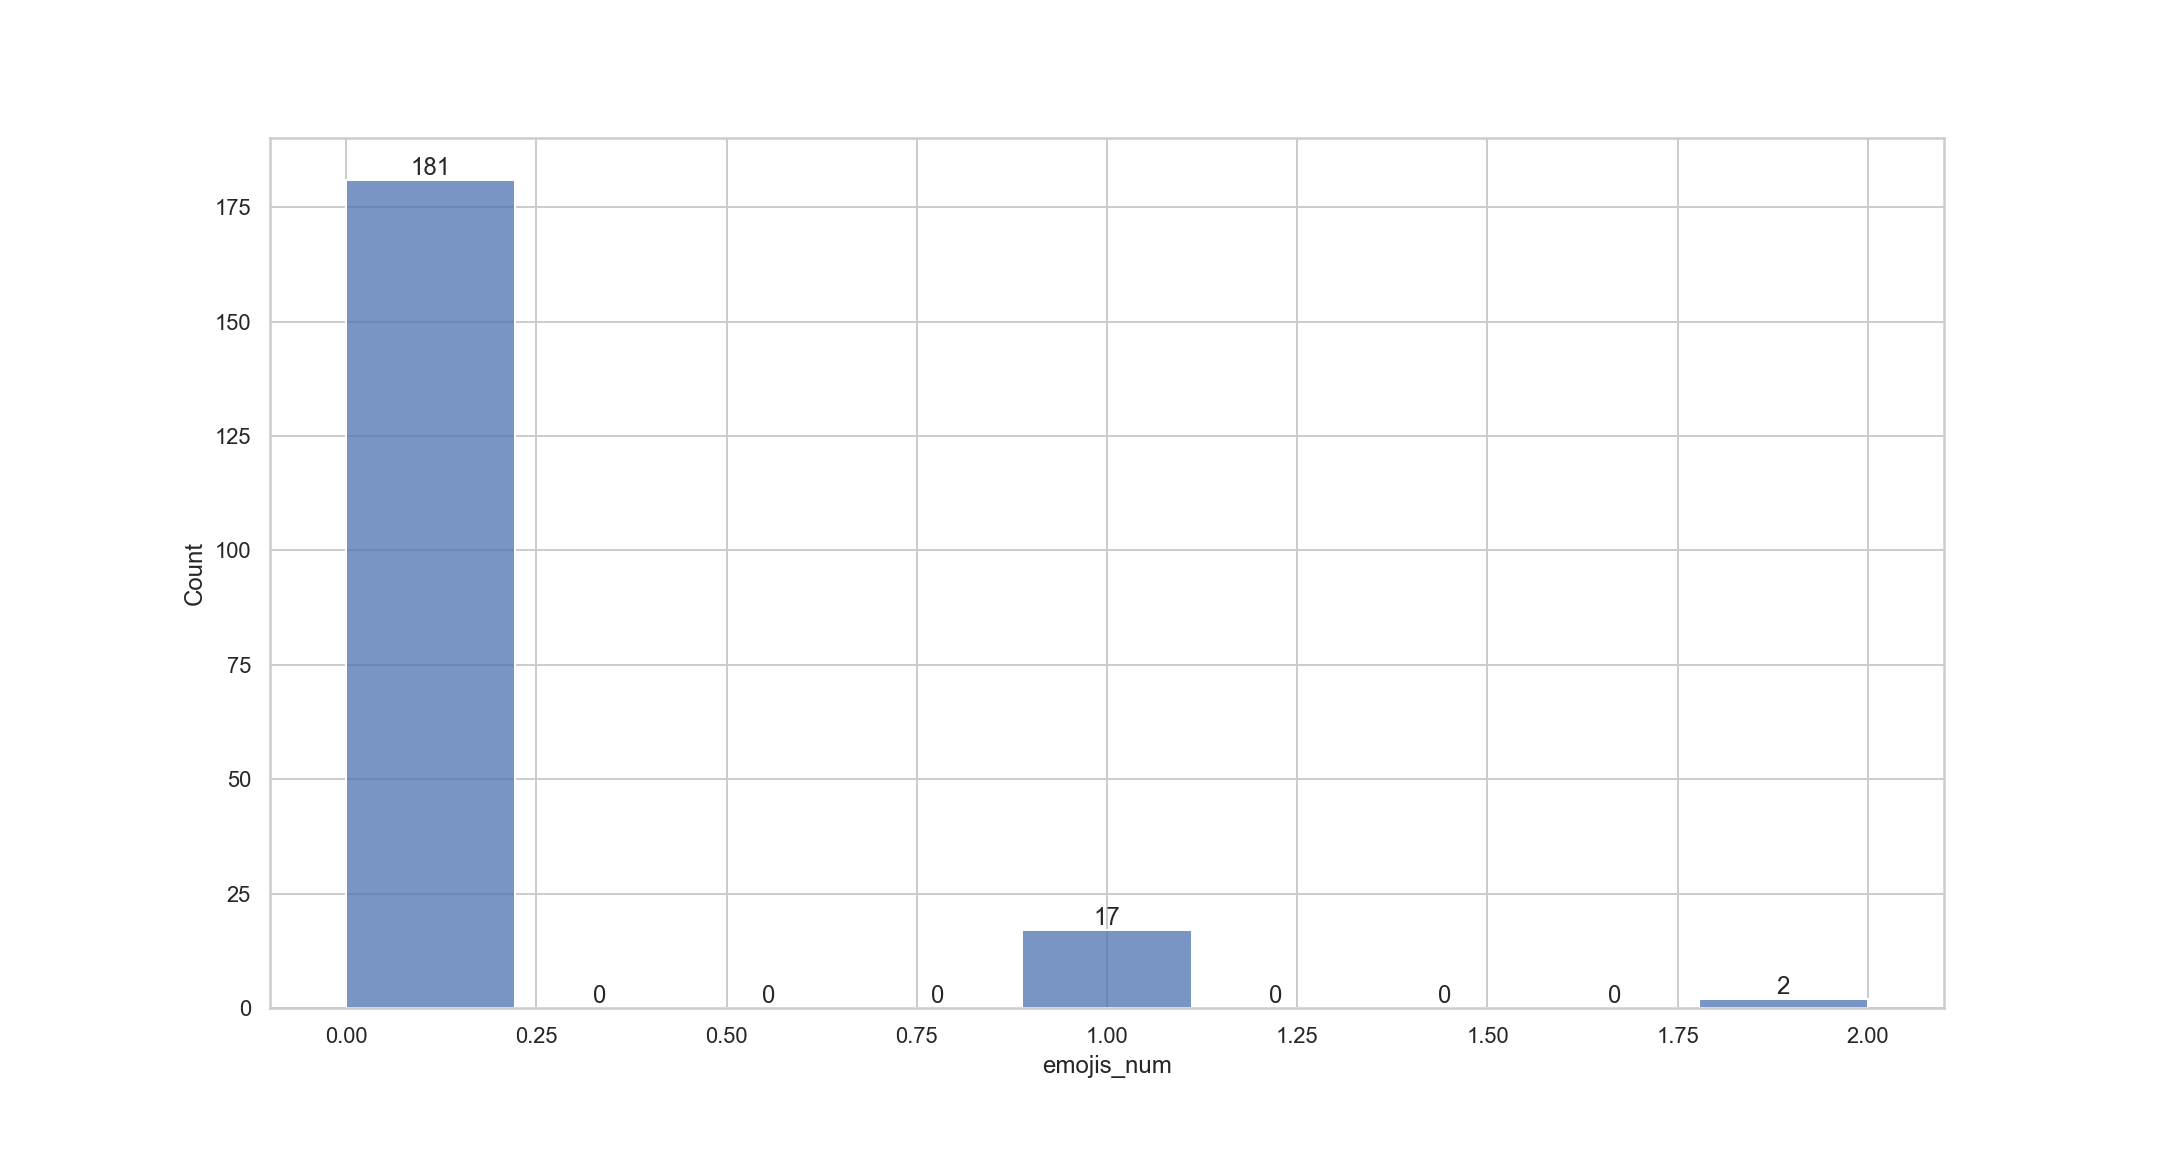
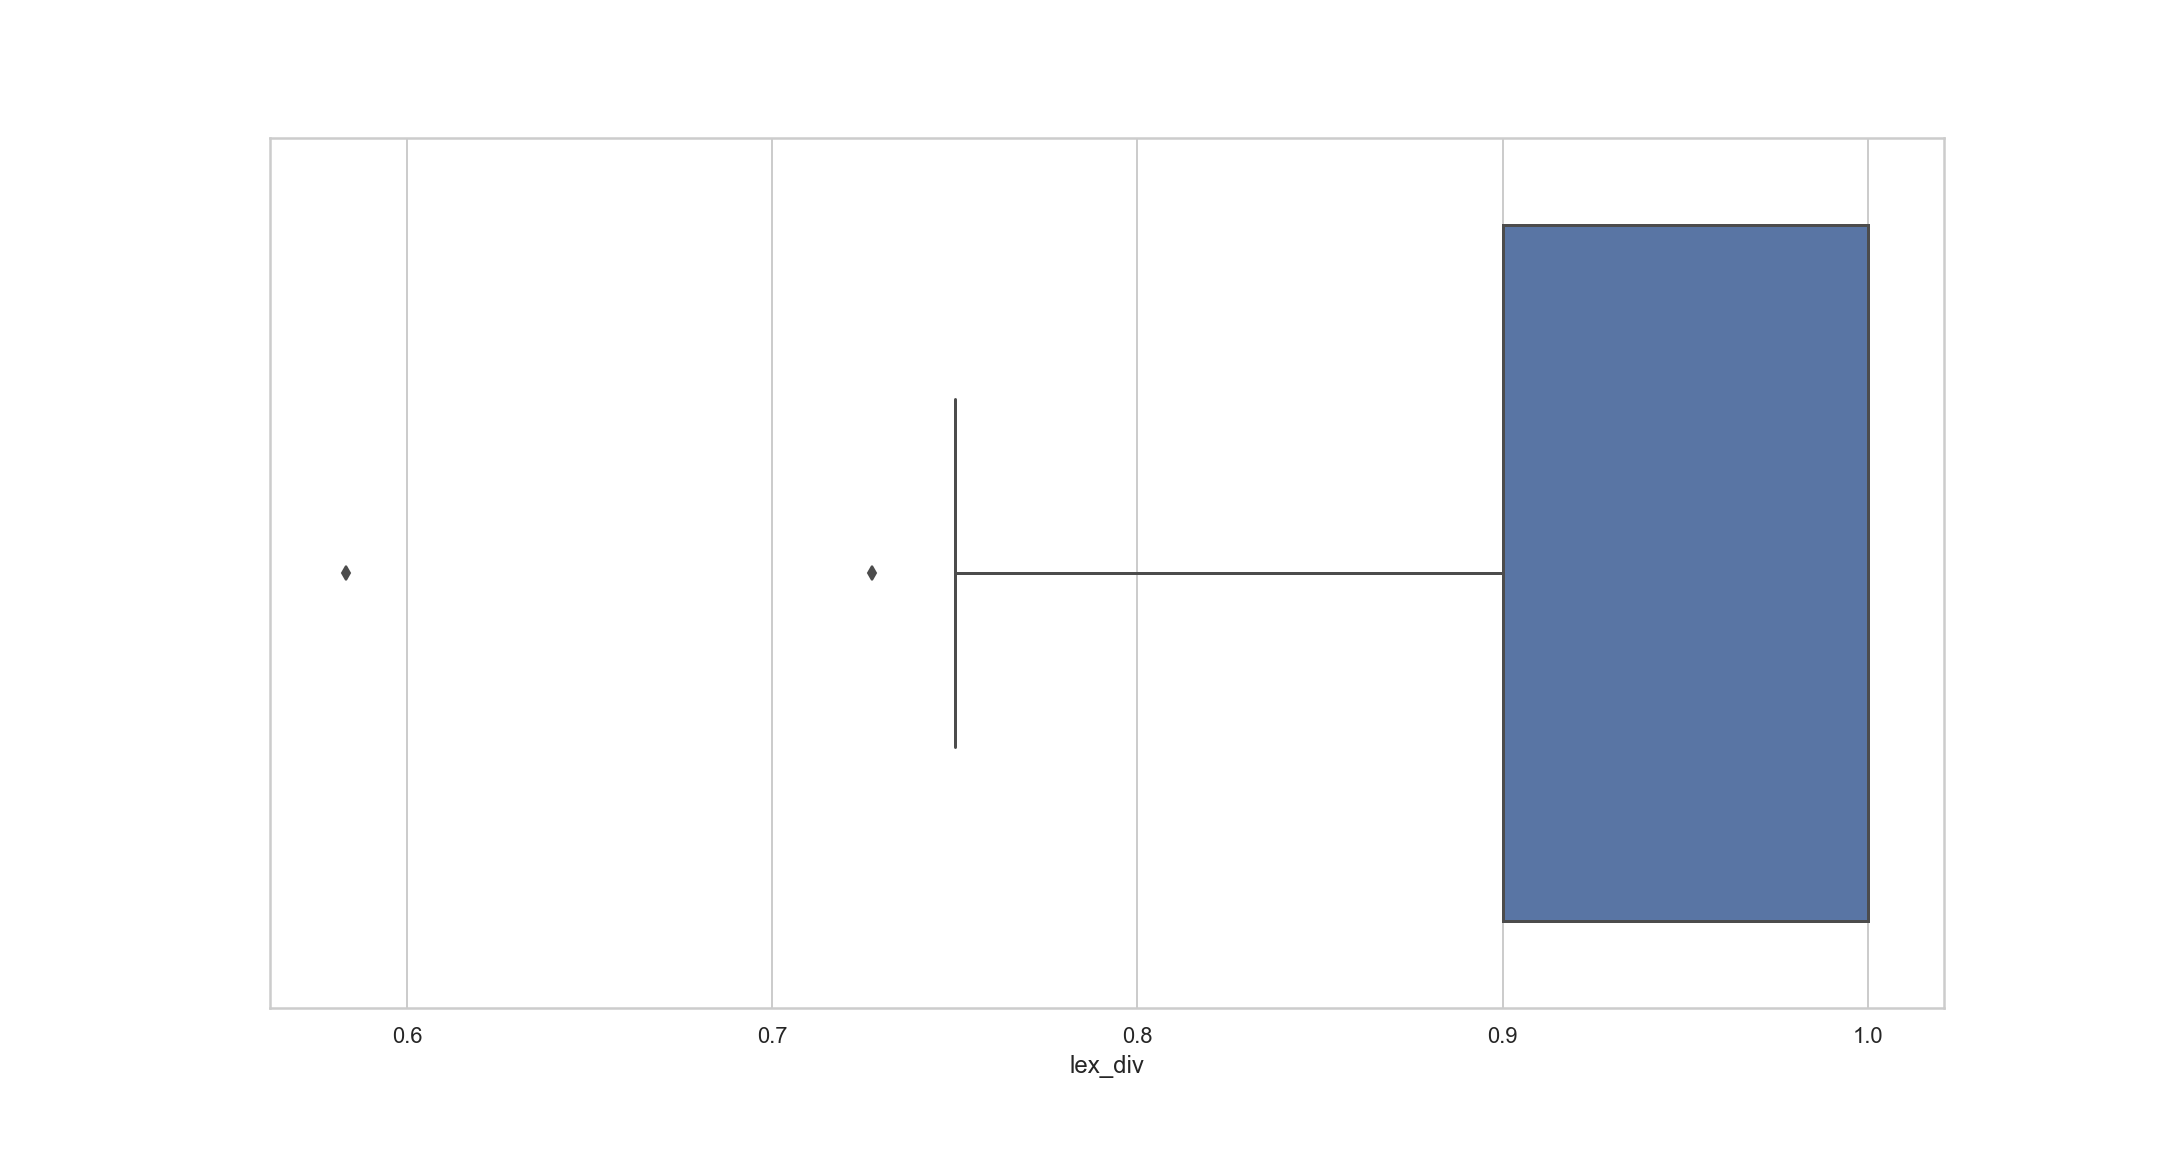
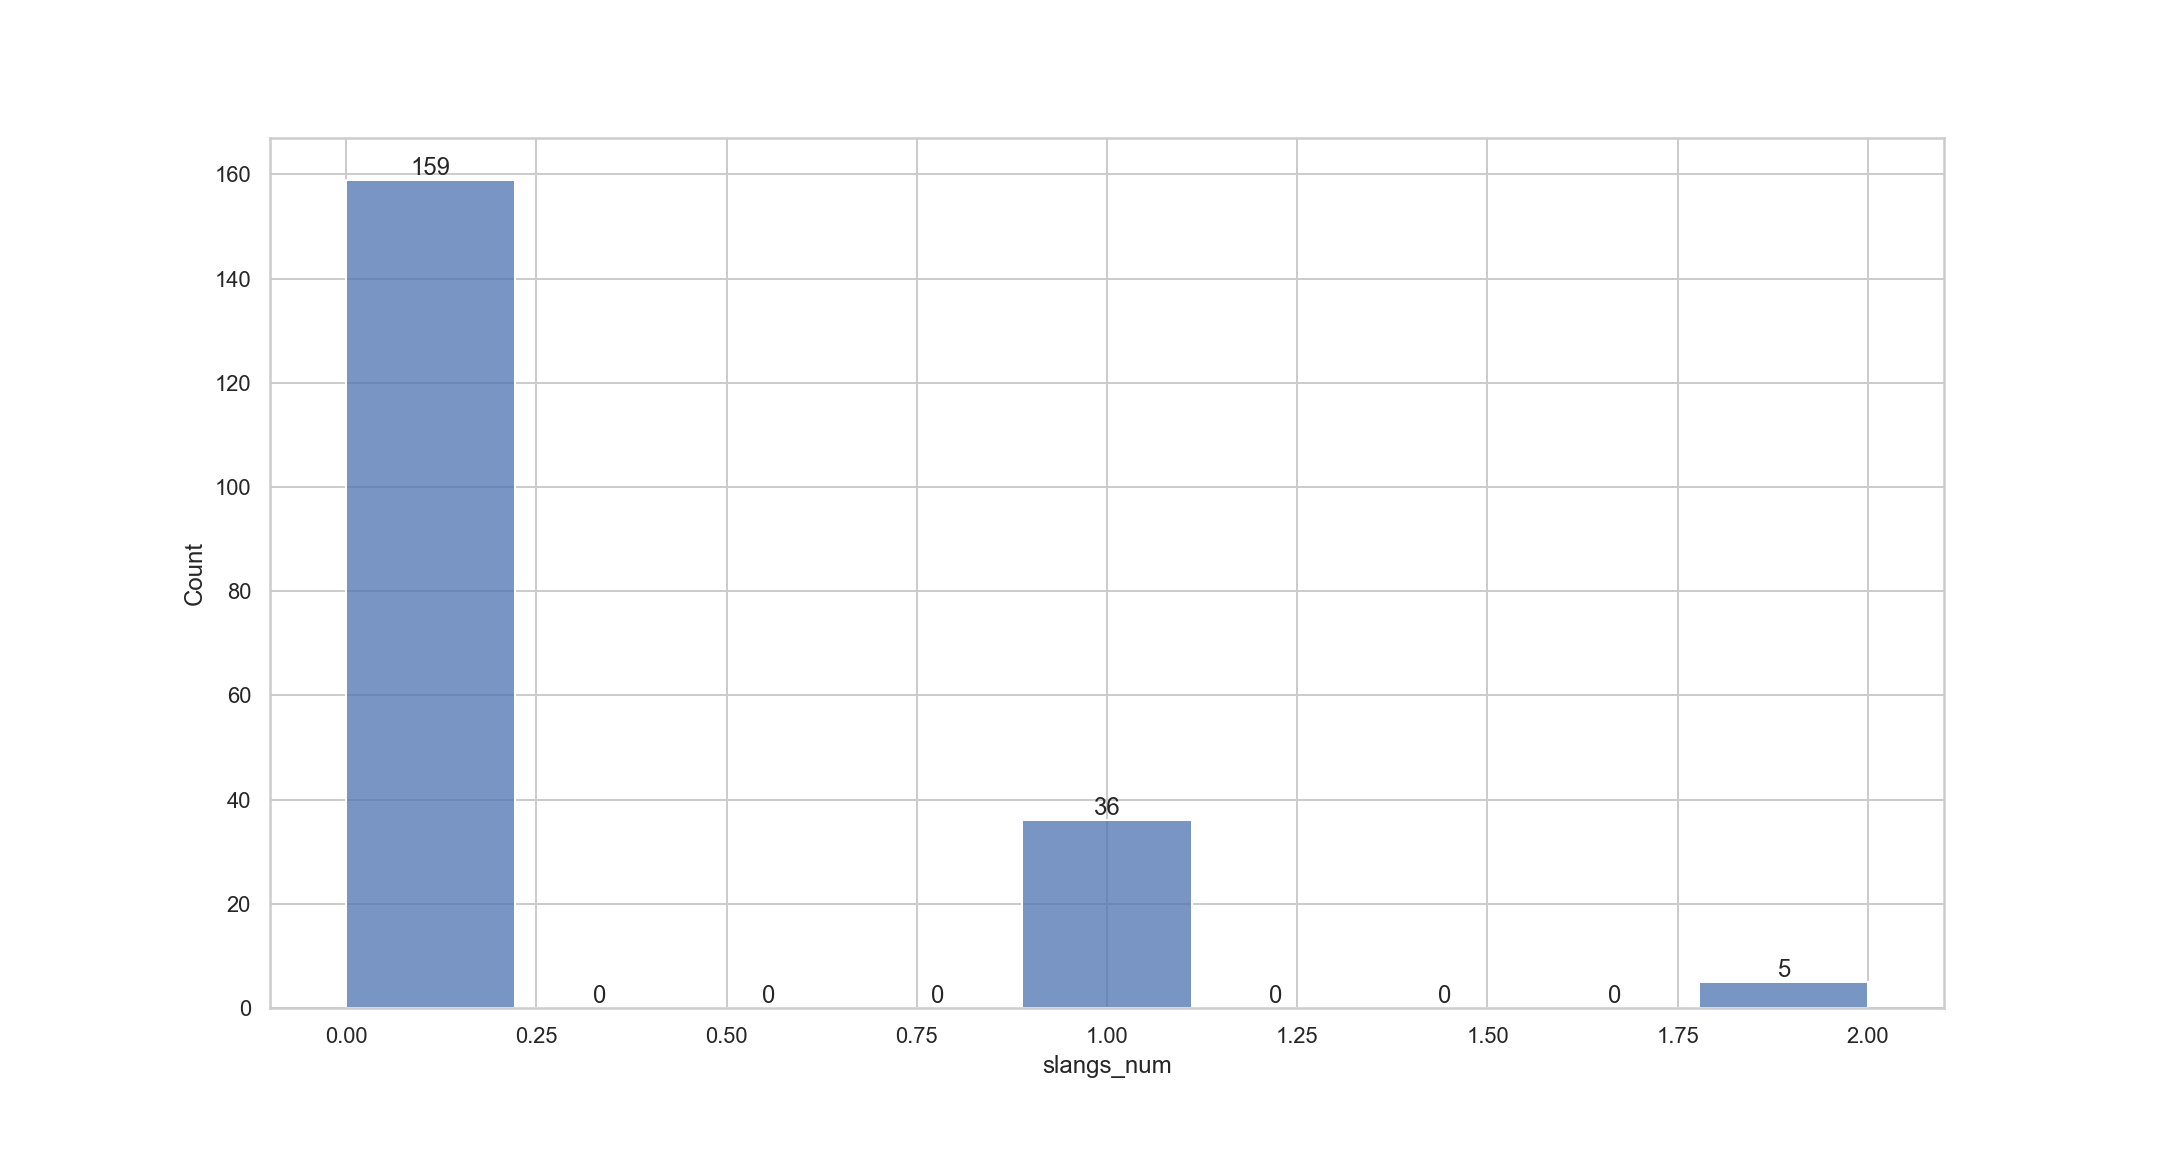
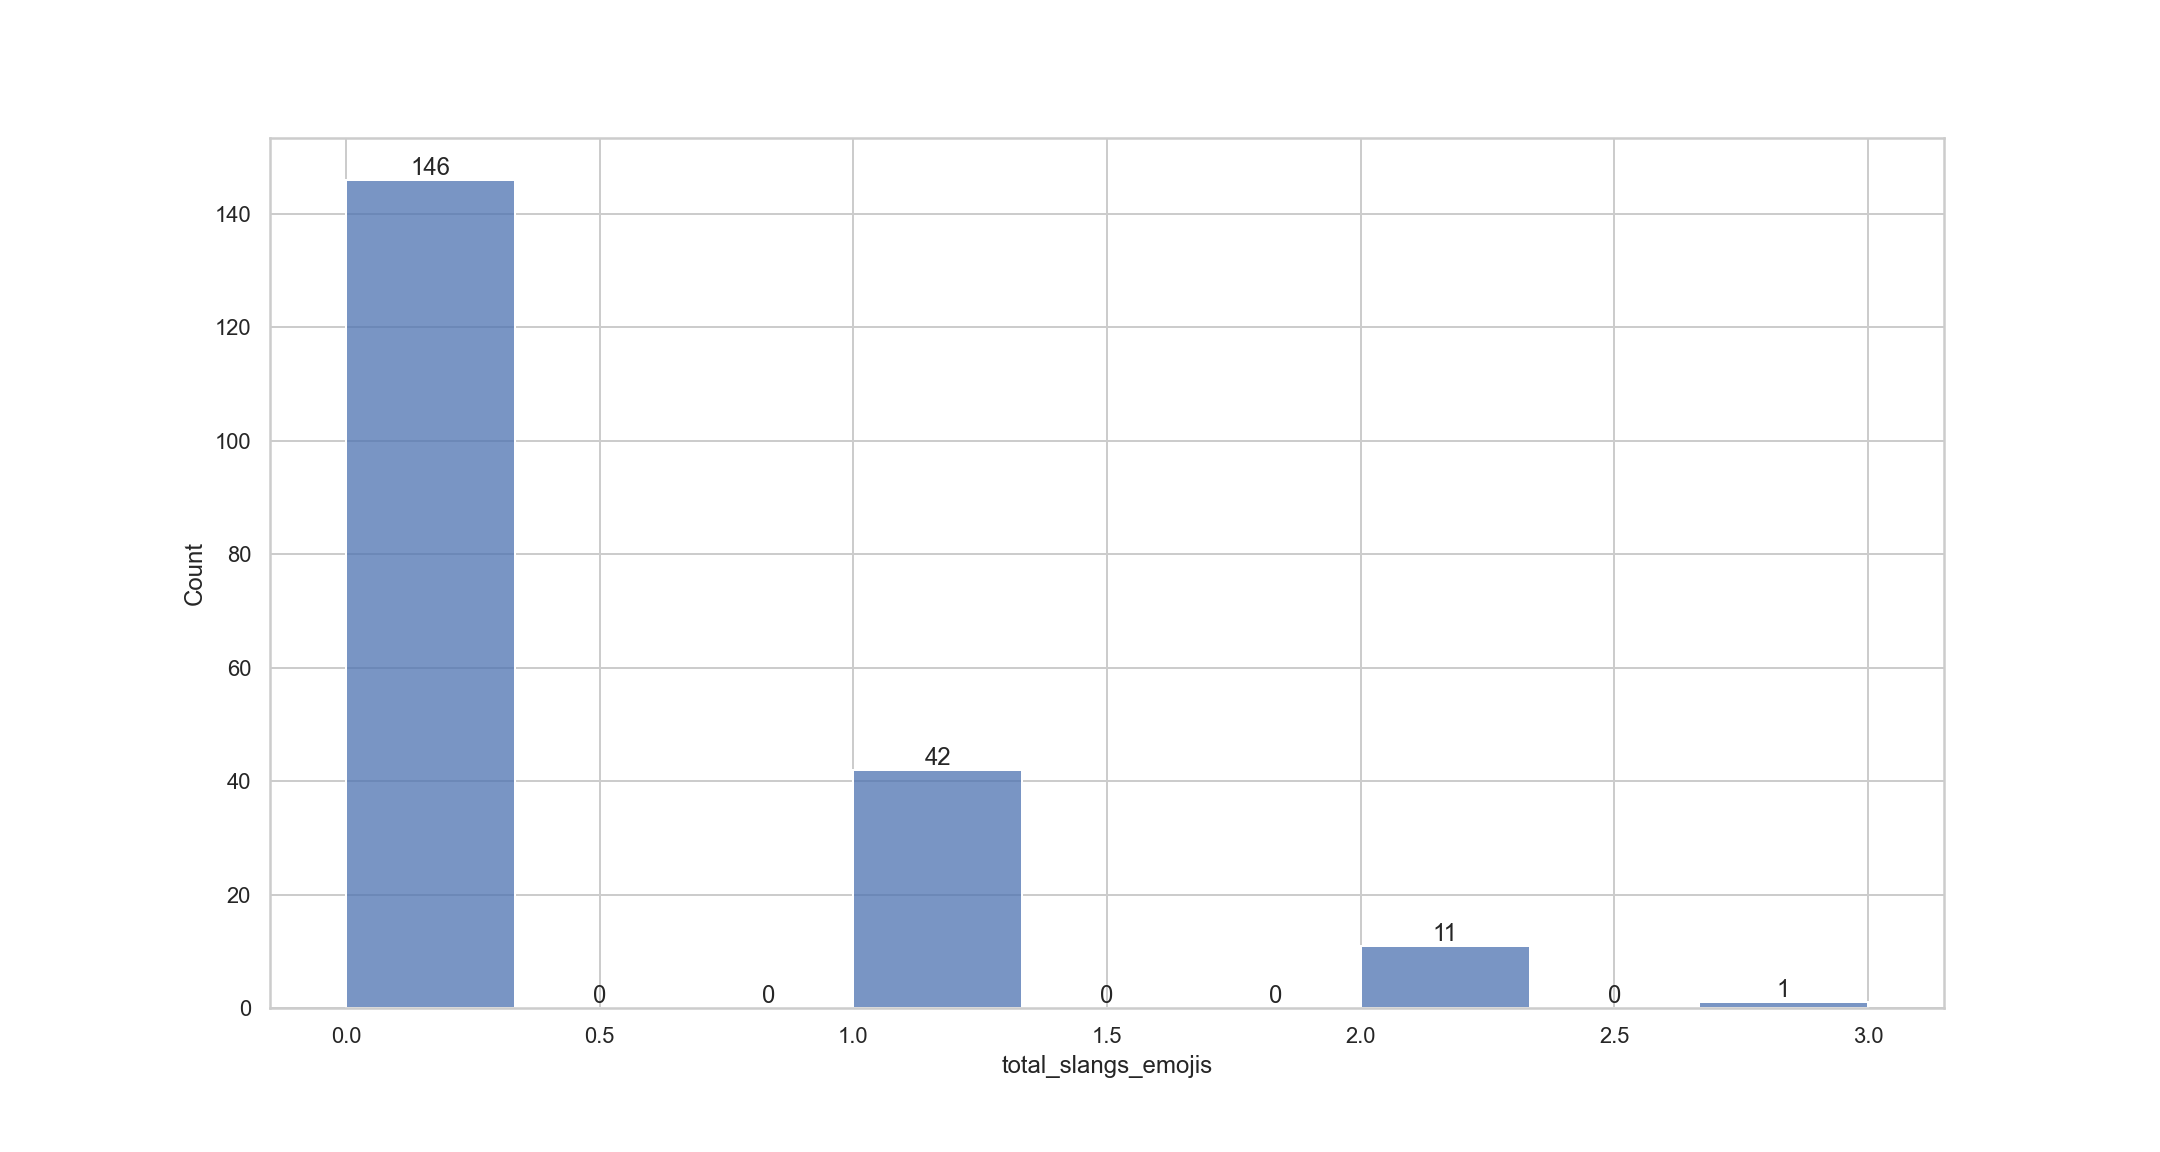
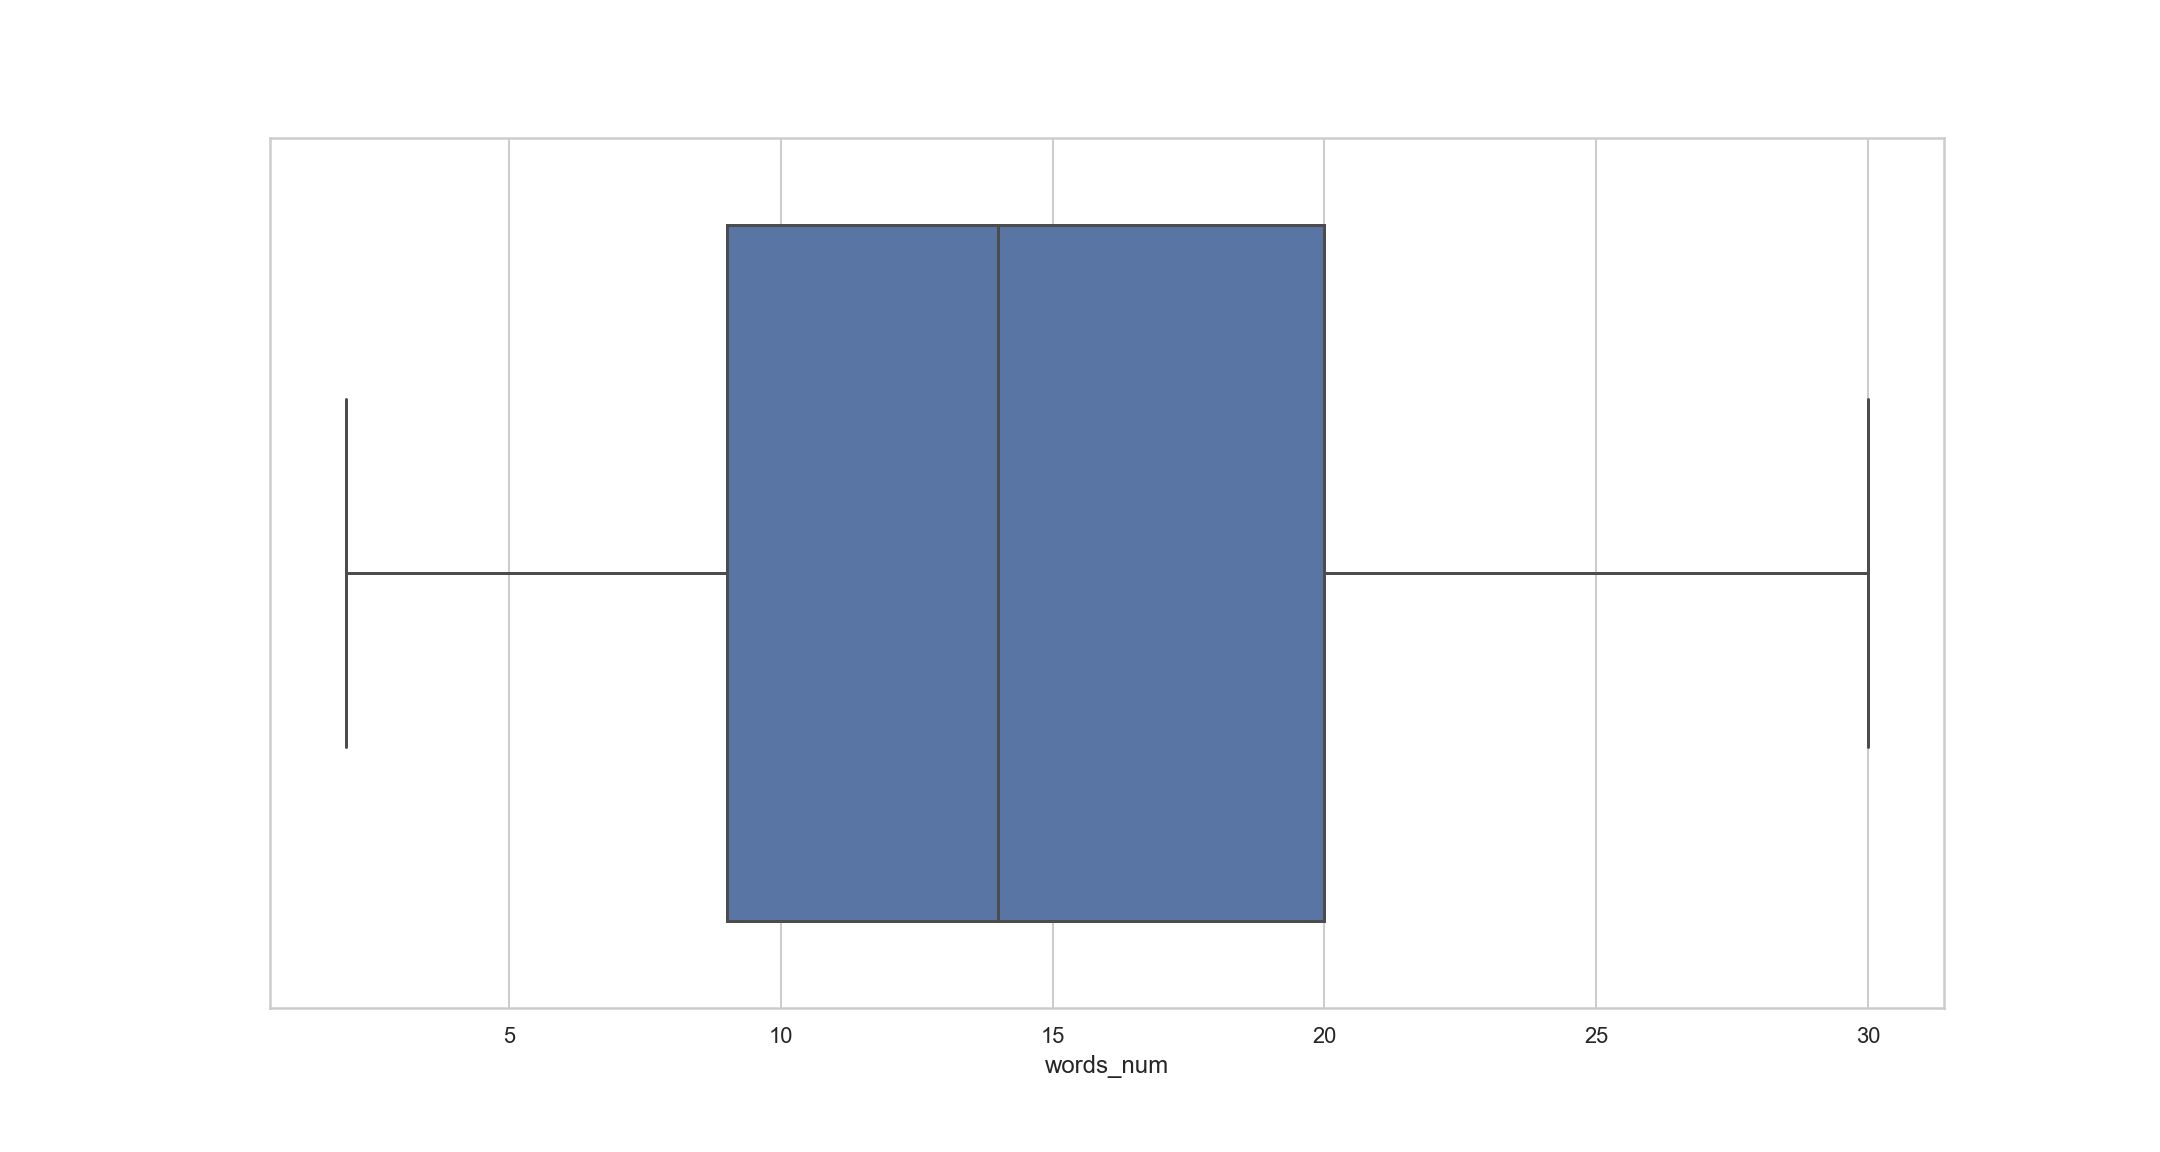

<Figure size 432x288 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

In [7]:
temp_df = chateval_tweet_df

chateval_ge_1 = GraphicalExplorationDashboard(name='')

dashboard = pn.Column('ChatEval Dashboard',
                      chateval_ge_1.param,
                      pn.Tabs(
                          ('Plot', chateval_ge_1.plot),
                          ('',chateval_ge_1.append_end)
                      )
                     )

dashboard.embed()

This dataset has the lowest number of words, slangs and emojis. There are also more slangs than emojis.

## 2.2.5 Word Clouds

In [10]:
# Seed is set to 69 for word clouds and modelling
SEED =69

In [11]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(data):
    
    comment_words = ''
    stopwords = set(STOPWORDS)

    for val in data:

        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10,
                    random_state = SEED).generate(comment_words)
                 
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

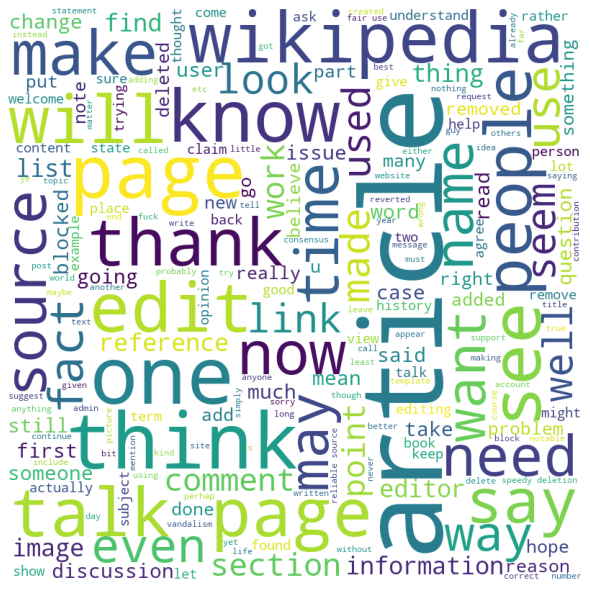

In [12]:
generate_word_cloud(wtc_df['comment_text'])

A lot of the words in Wikipedia dataset are related to forum and editing.

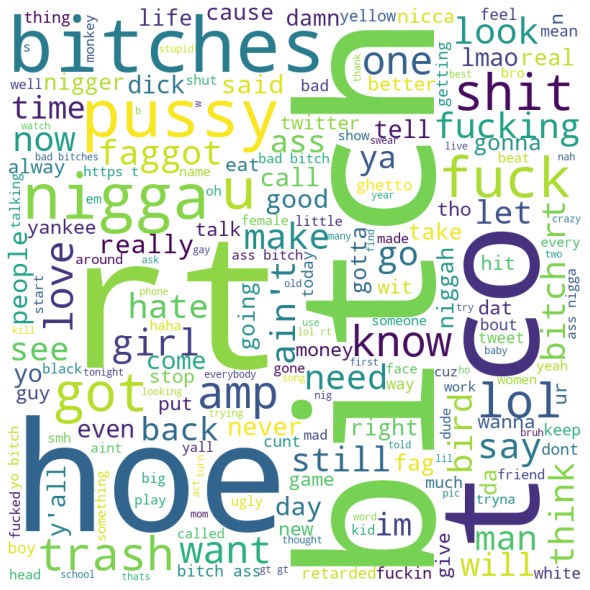

In [13]:
generate_word_cloud(davidson_df['tweet'])

There are lots of insults in the Davidson dataset, many if which are targetted at women and Blacks.

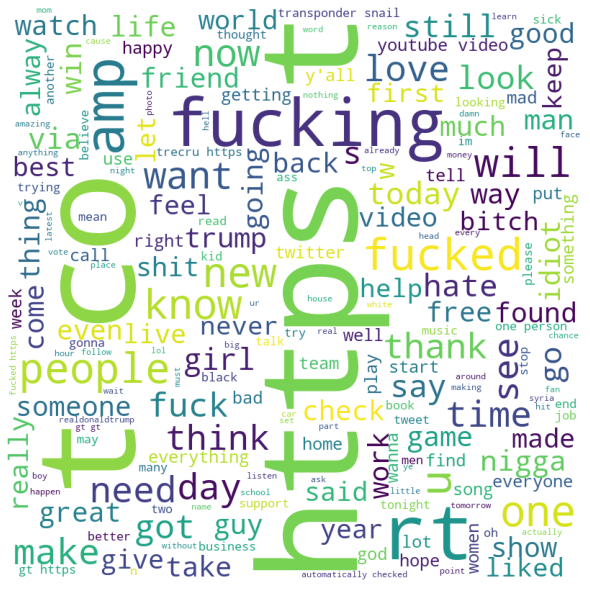

In [14]:
generate_word_cloud(tweeter_df['tweet'])

There are a lot of links being sent in the Tweeter abusive dataset.

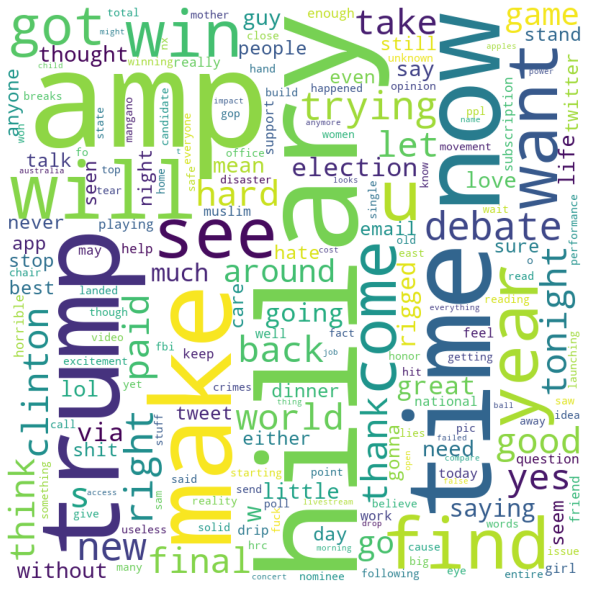

In [15]:
generate_word_cloud(chateval_tweet_df['tweet'])

The ChatEval dataset most likely was collected from American Tweets during an election, as seen in the high numbers of mentions about Trump and Hillary.

# 3.0 Modifying

Because some modifications were already done while data exploration, not much modification will be done here.

As explained at the sampling stage, the Wikipedia Toxic Dataset will not be used in modifying, modelling and assessment stages, since it was used to built the ParlAI Diaglogue Satefty model and may cause overfitting.

## 3.1 Davidson Dataset

Creating deslang_demoji column, where the original tweet have both emojis and slangs converted. Urls are removed from the original Tweets.

In [25]:
davidson_df['deslang_demoji']=davidson_df['demoji_text'].apply(deslang_emoji)
davidson_df['tweet']=davidson_df['tweet'].apply(remove_url)
davidson_df.head()

Unnamed: 0  Unnamed: 0.1  count  hate_speech  offensive_language  neither  \
0           0             0      3            0                   0        3   
1           1             1      3            0                   3        0   
2           2             2      3            0                   3        0   
3           3             3      3            0                   2        1   
4           4             4      6            0                   6        0   

   class                                              tweet  words_num  \
0      2  !!! RT @mayasolovely: As a woman you shouldn't...         25   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25   

    lex_div  emojis_num                                        demoji_text  \
0  0.880000           0  !!! RT @mayasolovely: As a woman you should no...   
1  1.000000           0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  0.904762           0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  1.000000           0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  0.846154           0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

   slangs_num                                       deslang_text  \
0           1  retweet mayasolovely As a woman you should not...   
1           4  retweet mleew17 boy that's coldtyga down bad f...   
2           2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...   
3           2  retweet CGAnderson vivabased she look like a T...   
4           2  retweet ShenikaRoberts The shit you hear about...   

   total_slangs_emojis                                     deslang_demoji  
0                    1  retweet mayasolovely As a woman you should not...  
1                    4  retweet mleew17 boy that's coldtyga down bad f...  
2                    2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...  
3                    2  retweet CGAnderson vivabased she look like a T...  
4                    2  retweet ShenikaRoberts The shit you hear about...

There are three classes, hate speech, offensive language and neither. Each has its column and a number is given based on the number of annotators who agree that it belongs to said class. The class column shows the class with highest number of annotators, where 2 is neither. Thus, if class is 2 it is not toxic and set to 0, otherwise it is counted as toxic and set to 1.

In [26]:
import numpy as np
davidson_df['is_unsafe']=np.where(davidson_df['class'].eq(2), 0, 1)
davidson_df.head()

Unnamed: 0  Unnamed: 0.1  count  hate_speech  offensive_language  neither  \
0           0             0      3            0                   0        3   
1           1             1      3            0                   3        0   
2           2             2      3            0                   3        0   
3           3             3      3            0                   2        1   
4           4             4      6            0                   6        0   

   class                                              tweet  words_num  \
0      2  !!! RT @mayasolovely: As a woman you shouldn't...         25   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         16   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         20   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          8   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         25   

    lex_div  emojis_num                                        demoji_text  \
0  0.880000           0  !!! RT @mayasolovely: As a woman you should no...   
1  1.000000           0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  0.904762           0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  1.000000           0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  0.846154           0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

   slangs_num                                       deslang_text  \
0           1  retweet mayasolovely As a woman you should not...   
1           4  retweet mleew17 boy that's coldtyga down bad f...   
2           2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...   
3           2  retweet CGAnderson vivabased she look like a T...   
4           2  retweet ShenikaRoberts The shit you hear about...   

   total_slangs_emojis                                     deslang_demoji  \
0                    1  retweet mayasolovely As a woman you should not...   
1                    4  retweet mleew17 boy that's coldtyga down bad f...   
2                    2  retweet UrKindOfBrand Dawg retweet 80sbaby4lif...   
3                    2  retweet CGAnderson vivabased she look like a T...   
4                    2  retweet ShenikaRoberts The shit you hear about...   

   is_unsafe  
0          0  
1          1  
2          1  
3          1  
4          1

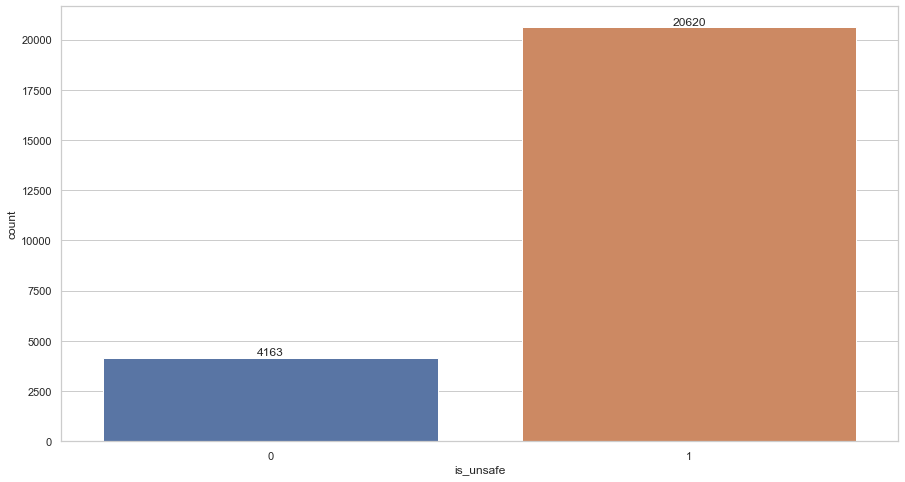

In [27]:
count_plot(davidson_df, "is_unsafe")

There are almost 5 times more Tweets that are toxic than those that are not.

## 3.2 Twitter Abusive Dataset

Creating deslang_demoji column, where the original tweet have both emojis and slangs converted.  Urls are removed from the original Tweets.

In [28]:
tweeter_df['deslang_demoji'] = tweeter_df['demoji_text'].apply(deslang_emoji)
tweeter_df['tweet'] = tweeter_df['tweet'].apply(remove_url)
tweeter_df.head()

Unnamed: 0                                              tweet  \
0           0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...   
1           1  RT @Papapishu: Man it would fucking rule if we...   
2           3  if you notice me start to act different or dis...   
3           5                                RT @Vitiligoprince:   
4           6  Topped the group in TGP Disc Jam Season 2! Ont...   

          label  words_num   lex_div  emojis_num  \
0     \tspam\t4         18  1.000000           0   
1  \tabusive\t4         17  1.000000           0   
2   \tnormal\t5         31  0.800000           0   
3  \tabusive\t4          2  1.000000           0   
4   \tnormal\t3         18  0.928571           0   

                                         demoji_text  slangs_num  \
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...           0   
1  RT @Papapishu: Man it would fucking rule if we...           1   
2  if you notice me start to act different or dis...           1   
3                                RT @Vitiligoprince:           1   
4  Topped the group in TGP Disc Jam Season 2! Ont...           0   

                                        deslang_text  \
0  Beats by Dr Dre urBeats Wired InEar Headphones...   
1  retweet Papapishu Man it would fucking rule if...   
2  if you notice me start to act different or dis...   
3                             retweet Vitiligoprince   
4  Topped the group in TGP Disc Jam Season 2 Onto...   

                                      deslang_demoji  
0  Beats by Dr Dre urBeats Wired InEar Headphones...  
1  retweet Papapishu Man it would fucking rule if...  
2  if you notice me start to act different or dis...  
3                             retweet Vitiligoprince  
4  Topped the group in TGP Disc Jam Season 2 Onto...

The labels were extracted from the Tweet at the sampling stage. However, the labels need to be cleaned.

In [29]:
"""
Remove tabs
"""
def clean_label(label):
    label = label.replace('\t', '')
    return label[:-1]

clean_label("\tspam\t4	")

'spam'

In [30]:
tweeter_df['label']=tweeter_df['label'].apply(clean_label)
tweeter_df['label'].unique()

array(['spam', 'abusive', 'normal', 'hateful'], dtype=object)

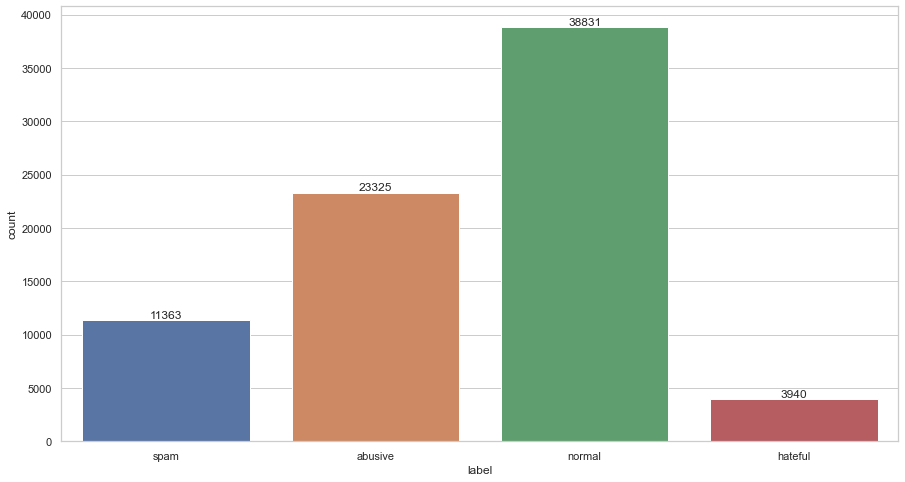

In [31]:
count_plot(tweeter_df, "label")

Most of the Tweets are considered normal. But, this research will use binary classification.

In [32]:
"""
From the four classes, hateful and abusive are counted as toxic and labeled as 1, otherwise it is assigned 0.
"""
def labels_to_binary(row):
    if row['label'] == 'hateful' or row['label'] == 'abusive':
        return 1
    else:
        return 0

tweeter_df['is_unsafe']=tweeter_df.apply(labels_to_binary, axis=1)
tweeter_df.head()

Unnamed: 0                                              tweet    label  \
0           0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     spam   
1           1  RT @Papapishu: Man it would fucking rule if we...  abusive   
2           3  if you notice me start to act different or dis...   normal   
3           5                                RT @Vitiligoprince:  abusive   
4           6  Topped the group in TGP Disc Jam Season 2! Ont...   normal   

   words_num   lex_div  emojis_num  \
0         18  1.000000           0   
1         17  1.000000           0   
2         31  0.800000           0   
3          2  1.000000           0   
4         18  0.928571           0   

                                         demoji_text  slangs_num  \
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...           0   
1  RT @Papapishu: Man it would fucking rule if we...           1   
2  if you notice me start to act different or dis...           1   
3                                RT @Vitiligoprince:           1   
4  Topped the group in TGP Disc Jam Season 2! Ont...           0   

                                        deslang_text  \
0  Beats by Dr Dre urBeats Wired InEar Headphones...   
1  retweet Papapishu Man it would fucking rule if...   
2  if you notice me start to act different or dis...   
3                             retweet Vitiligoprince   
4  Topped the group in TGP Disc Jam Season 2 Onto...   

                                      deslang_demoji  is_unsafe  
0  Beats by Dr Dre urBeats Wired InEar Headphones...          0  
1  retweet Papapishu Man it would fucking rule if...          1  
2  if you notice me start to act different or dis...          0  
3                             retweet Vitiligoprince          1  
4  Topped the group in TGP Disc Jam Season 2 Onto...          0

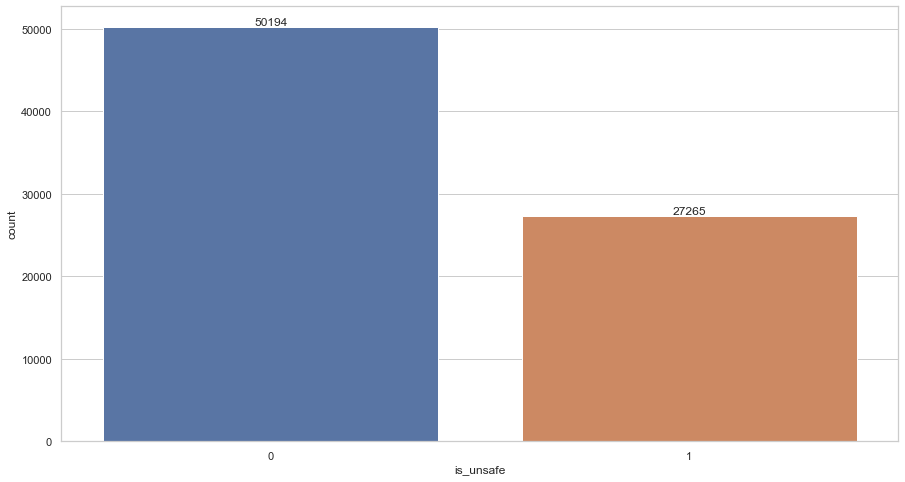

In [33]:
count_plot(tweeter_df, "is_unsafe")

The number of toxic Tweets is higher than that of non-toxic.

## 3.3 ChatEval Tweeter

Creating deslang_demoji column, where the original tweet have both emojis and slangs converted.  Urls are removed from the original Tweets.

In [34]:
chateval_tweet_df['deslang_demoji']=chateval_tweet_df['demoji_text'].apply(deslang_emoji)
chateval_tweet_df['tweet']=chateval_tweet_df['tweet'].apply(remove_url)
chateval_tweet_df.head()

Unnamed: 0                                              tweet  words_num  \
0           0  when you find so you decide to stay in her cla...         11   
1           1  not a single reporter noticed that hillary's e...         22   
2           2  jim schwartz has faced 2 teams as defensive co...         18   
3           3                                   go gettum jared!          3   
4           4           arsenal didn't deserve to win either so?          8   

    lex_div  emojis_num                                        demoji_text  \
0  0.916667           2  when you find so you decide to stay in her cla...   
1  0.900000           0  not a single reporter noticed that hillary is ...   
2  0.941176           0  jim schwartz has faced 2 teams as defensive co...   
3  1.000000           0                                   go gettum jared!   
4  1.000000           0          arsenal did not deserve to win either so?   

   slangs_num                                       deslang_text  \
0           0  when you find so you decide to stay in her cla...   
1           0  not a single reporter noticed that hillary is ...   
2           0  jim schwartz has faced 2 teams as defensive co...   
3           0                                    go gettum jared   
4           0           arsenal did not deserve to win either so   

   total_slangs_emojis                                     deslang_demoji  
0                    2  when you find so you decide to stay in her cla...  
1                    0  not a single reporter noticed that hillary is ...  
2                    0  jim schwartz has faced 2 teams as defensive co...  
3                    0                                    go gettum jared  
4                    0           arsenal did not deserve to win either so

# 4.0 Modelling

## 4.1 Dialogue Safety Classification

Viewing the data and its structure in ParlAI Dialogue Safety model.

In [35]:
!parlai display_data -t dialogue_safety:adversarial

2021-10-02 23:12:39,029 INFO     | Opt:
2021-10-02 23:12:39,029 INFO     |     allow_missing_init_opts: False
2021-10-02 23:12:39,029 INFO     |     batchsize: 1
2021-10-02 23:12:39,029 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:12:39,029 INFO     |     datatype: train:ordered
2021-10-02 23:12:39,029 INFO     |     dict_class: None
2021-10-02 23:12:39,029 INFO     |     display_add_fields: 
2021-10-02 23:12:39,029 INFO     |     download_path: None
2021-10-02 23:12:39,029 INFO     |     dynamic_batching: None
2021-10-02 23:12:39,029 INFO     |     hide_labels: False
2021-10-02 23:12:39,029 INFO     |     ignore_agent_reply: True
2021-10-02 23:12:39,029 INFO     |     image_cropsize: 224
2021-10-02 23:12:39,029 INFO     |     image_mode: raw
2021-10-02 23:12:39,029 INFO     |     image_size: 256
2021-10-02 23:12:39,029 INFO     |     init_model: None
2021-10-02 23:12:39,029 INFO     |     init_opt: None
2021-10-02 23:12:39,

In order to run Dialogue Safety Classfication model on the datasets, they need to be converted into text files. To create said text files, the structure of the json file in Dialgoue Safety is examined.

In [36]:
import json
 
# Opening JSON file
f = open('single_turn_safety.json',)
 
# returns JSON object as a dictionary
safety_demo_dict = json.load(f)

print(safety_demo_dict['standard']['test']['1']['bad'][0])

f.close()

{'text': 'that state is for bitches to be honest', 'label_candidates': ['__notok__', '__ok__'], 'episode_done': True, 'labels': ['__notok__']}


Use the same train test ratio as in Xia et al. (2020).

In [37]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.73
VALIDATION_RATIO = 0.12
TEST_RATIO = 0.15

# train is now 75% of the entire data set
davidson_train, davidson_test = train_test_split(davidson_df, test_size=1 - TRAIN_RATIO, random_state=SEED)

# test is now 12% of the initial data set
# validation is now 15% of the initial data set
davidson_test, davidson_valid = train_test_split(davidson_test, test_size=TEST_RATIO/(TEST_RATIO + VALIDATION_RATIO), random_state=SEED) 

print(davidson_train.shape, davidson_test.shape, davidson_valid.shape)

(18091, 17) (2974, 17) (3718, 17)


In [41]:
"""
Split dataset into train, valid and test datasets. Then, save each as text files. For each row, a line of text is created and
the Tweet and labels are structured according to the data format used by the Dialogue Safety model.
The col argument enables the function to select which column of Tweet to use, for instance, whether it may be the original 
version, with emojis converted, with slangs converted, or both converted.
The text files will be saved with either _train, _test or _valid at the end of their filenames, as this is the format used by 
ParlAI.
"""
def df_splits_to_txt(name, train, valid, test, col):
    dfs = {'train':train, 'valid':valid, 'test':test}
    for key, value in dfs.items():
        txt_name = name + '_' + key + '.txt'
        with open(txt_name, 'w', encoding="utf8") as f:
            for index, row in value.iterrows():
                labels = '__ok__' if row['is_unsafe'] == 0 else '__notok__'
                item = 'text:' + re.sub('\W+',' ', decontract(row[col])) + '\tlabels:' + labels + '\tlabel_candidates:'+ "['__notok__', '__ok__']" +'\tepisode_done:True'
                f.write("%s\n" % item)

## 4.1.1 Davidson dataset

The Safety Dialogue model will be run on the Davidson dataset for 4 times, which include the original Tweets, Tweets with emojis converted, Tweets with slangs converted and Tweets with both converted. Thus, there are a total of 12 text files that will be generated, since each time includes train, test and validation text files.

In [42]:
df_splits_to_txt('davidson_1', davidson_train, davidson_valid, davidson_test, 'tweet')

In [43]:
df_splits_to_txt('davidson_2', davidson_train, davidson_valid, davidson_test, 'demoji_text')

In [44]:
df_splits_to_txt('davidson_3', davidson_train, davidson_valid, davidson_test, 'deslang_text')

In [45]:
df_splits_to_txt('davidson_4', davidson_train, davidson_valid, davidson_test, 'deslang_demoji')

To ensure that the splits are successful and readable by ParlAI, use the display_data command.

In [46]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath davidson_1 --fromfile-datatype-extension true

2021-10-02 23:13:33,944 INFO     | Opt:
2021-10-02 23:13:33,944 INFO     |     allow_missing_init_opts: False
2021-10-02 23:13:33,944 INFO     |     batchsize: 1
2021-10-02 23:13:33,944 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:13:33,944 INFO     |     datatype: train:ordered
2021-10-02 23:13:33,944 INFO     |     dict_class: None
2021-10-02 23:13:33,944 INFO     |     display_add_fields: 
2021-10-02 23:13:33,944 INFO     |     download_path: None
2021-10-02 23:13:33,944 INFO     |     dynamic_batching: None
2021-10-02 23:13:33,944 INFO     |     fromfile_datapath: davidson_1
2021-10-02 23:13:33,944 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:13:33,944 INFO     |     hide_labels: False
2021-10-02 23:13:33,944 INFO     |     ignore_agent_reply: True
2021-10-02 23:13:33,944 INFO     |     image_cropsize: 224
2021-10-02 23:13:33,944 INFO     |     image_mode: raw
2021-10-02 23:13:33,944 INFO     |     imag

In [47]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath davidson_2 --fromfile-datatype-extension true

2021-10-02 23:13:40,531 INFO     | Opt:
2021-10-02 23:13:40,531 INFO     |     allow_missing_init_opts: False
2021-10-02 23:13:40,531 INFO     |     batchsize: 1
2021-10-02 23:13:40,531 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:13:40,531 INFO     |     datatype: train:ordered
2021-10-02 23:13:40,531 INFO     |     dict_class: None
2021-10-02 23:13:40,531 INFO     |     display_add_fields: 
2021-10-02 23:13:40,531 INFO     |     download_path: None
2021-10-02 23:13:40,531 INFO     |     dynamic_batching: None
2021-10-02 23:13:40,531 INFO     |     fromfile_datapath: davidson_2
2021-10-02 23:13:40,531 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:13:40,531 INFO     |     hide_labels: False
2021-10-02 23:13:40,531 INFO     |     ignore_agent_reply: True
2021-10-02 23:13:40,531 INFO     |     image_cropsize: 224
2021-10-02 23:13:40,531 INFO     |     image_mode: raw
2021-10-02 23:13:40,531 INFO     |     imag

In [48]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath davidson_3 --fromfile-datatype-extension true

2021-10-02 23:13:44,329 INFO     | Opt:
2021-10-02 23:13:44,329 INFO     |     allow_missing_init_opts: False
2021-10-02 23:13:44,329 INFO     |     batchsize: 1
2021-10-02 23:13:44,329 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:13:44,329 INFO     |     datatype: train:ordered
2021-10-02 23:13:44,329 INFO     |     dict_class: None
2021-10-02 23:13:44,329 INFO     |     display_add_fields: 
2021-10-02 23:13:44,329 INFO     |     download_path: None
2021-10-02 23:13:44,330 INFO     |     dynamic_batching: None
2021-10-02 23:13:44,330 INFO     |     fromfile_datapath: davidson_3
2021-10-02 23:13:44,330 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:13:44,330 INFO     |     hide_labels: False
2021-10-02 23:13:44,330 INFO     |     ignore_agent_reply: True
2021-10-02 23:13:44,330 INFO     |     image_cropsize: 224
2021-10-02 23:13:44,330 INFO     |     image_mode: raw
2021-10-02 23:13:44,330 INFO     |     imag

In [49]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath davidson_4 --fromfile-datatype-extension true

2021-10-02 23:13:48,135 INFO     | Opt:
2021-10-02 23:13:48,136 INFO     |     allow_missing_init_opts: False
2021-10-02 23:13:48,136 INFO     |     batchsize: 1
2021-10-02 23:13:48,136 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:13:48,136 INFO     |     datatype: train:ordered
2021-10-02 23:13:48,136 INFO     |     dict_class: None
2021-10-02 23:13:48,136 INFO     |     display_add_fields: 
2021-10-02 23:13:48,136 INFO     |     download_path: None
2021-10-02 23:13:48,136 INFO     |     dynamic_batching: None
2021-10-02 23:13:48,136 INFO     |     fromfile_datapath: davidson_4
2021-10-02 23:13:48,136 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:13:48,136 INFO     |     hide_labels: False
2021-10-02 23:13:48,136 INFO     |     ignore_agent_reply: True
2021-10-02 23:13:48,136 INFO     |     image_cropsize: 224
2021-10-02 23:13:48,136 INFO     |     image_mode: raw
2021-10-02 23:13:48,136 INFO     |     imag

Running the eval_model to evaluate the performance of Safety Dialogue Model on Davidson datasets for all 4 variants.

In [50]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath davidson_1 --fromfile-datatype-extension true --report-filename davidson_1.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40

2021-10-02 23:13:54,642 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:13:54,643 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:13:54,643 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:13:54,643 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:13:54,643 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:13:54,664 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

In [51]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath davidson_2 --fromfile-datatype-extension true --report-filename davidson_2.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40

2021-10-02 23:16:51,920 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:16:51,920 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:16:51,920 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:16:51,920 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:16:51,921 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:16:51,927 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

2021-10-02 23:16:57,911 INFO     |     pytorch_preprocess: False
2021-10-02 23:16:57,911 INFO     |     pytorch_teacher_batch_sort: False
2021-10-02 23:16:57,911 INFO     |     pytorch_teacher_dataset: None
2021-10-02 23:16:57,911 INFO     |     pytorch_teacher_task: None
2021-10-02 23:16:57,911 INFO     |     rank_candidates: False
2021-10-02 23:16:57,911 INFO     |     rank_top_k: -1
2021-10-02 23:16:57,911 INFO     |     reduction_type: mean
2021-10-02 23:16:57,911 INFO     |     ref_class: None
2021-10-02 23:16:57,912 INFO     |     relu_dropout: 0.0
2021-10-02 23:16:57,912 INFO     |     repeat_blocking_heuristic: True
2021-10-02 23:16:57,912 INFO     |     report_filename: davidson_2.json
2021-10-02 23:16:57,912 INFO     |     return_cand_scores: False
2021-10-02 23:16:57,912 INFO     |     round: 3
2021-10-02 23:16:57,912 INFO     |     round_only: False
2021-10-02 23:16:57,912 INFO     |     save_after_valid: True
2021-10-02 23:16:57,912 INFO     |     save_every_n_secs: 60.0
2

In [52]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath davidson_3 --fromfile-datatype-extension true --report-filename davidson_3.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40

2021-10-02 23:19:20,964 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:19:20,964 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:19:20,966 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:19:20,966 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:19:20,966 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:19:20,973 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

2021-10-02 23:19:26,960 INFO     |     n_heads: 12
2021-10-02 23:19:26,960 INFO     |     n_layers: 12
2021-10-02 23:19:26,960 INFO     |     n_positions: 1024
2021-10-02 23:19:26,960 INFO     |     n_segments: 2
2021-10-02 23:19:26,960 INFO     |     nesterov: True
2021-10-02 23:19:26,960 INFO     |     no_cuda: False
2021-10-02 23:19:26,960 INFO     |     normalize_sent_emb: False
2021-10-02 23:19:26,960 INFO     |     num_epochs: -1
2021-10-02 23:19:26,960 INFO     |     num_examples: -1
2021-10-02 23:19:26,960 INFO     |     numthreads: 1
2021-10-02 23:19:26,960 INFO     |     numworkers: 4
2021-10-02 23:19:26,960 INFO     |     nus: [0.7]
2021-10-02 23:19:26,960 INFO     |     optimizer: adamax
2021-10-02 23:19:26,960 INFO     |     output_scaling: 0.06
2021-10-02 23:19:26,960 INFO     |     override: "{'task': 'fromfile:parlaiformat', 'fromfile_datapath': 'davidson_3', 'fromfile_datatype_extension': True, 'report_filename': 'davidson_3.json', 'datatype': 'test', 'model': 'transfo

In [53]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath davidson_4 --fromfile-datatype-extension true --report-filename davidson_4.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40

2021-10-02 23:22:30,912 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:22:30,912 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:22:30,912 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:22:30,912 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:22:30,912 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:22:30,919 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

       .8964 8.964e-10               .9382                 .9274   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .9494            .6796              .7235                .6406   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.28 891.3 472.9       0          0 21.21 1120 .8964 6.657 .5696 266.3 141.3   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1158 614.1        .8939
2021-10-02 23:23:40,582 INFO     | 45.7% complete (1,360 / 2,974), 0:01:02 elapsed, 0:01:15 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8941 8.941e-10               .9367                 .9229   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .9509            .6757              .7317                .6276   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.

## Twitter Abusive Dataset

Use the same train-test split as found in Xu et al. (2021) on Twitter Abusive Dataset.

In [54]:
# train is now 75% of the entire data set
tweeter_train, tweeter_test = train_test_split(tweeter_df, test_size=1 - TRAIN_RATIO, random_state=SEED)

# test is now 12% of the initial data set
# validation is now 15% of the initial data set
tweeter_test, tweeter_valid = train_test_split(tweeter_test, test_size=TEST_RATIO/(TEST_RATIO + VALIDATION_RATIO), random_state=SEED) 

print(tweeter_train.shape, tweeter_test.shape, tweeter_valid.shape)

(56545, 11) (9295, 11) (11619, 11)


Create text files accordingly. For 4 versions and train, test and validation, a total of 12 text files are created.

In [55]:
df_splits_to_txt('tweeter_1', tweeter_train, tweeter_valid, tweeter_test, 'tweet')

In [58]:
df_splits_to_txt('tweeter_2', tweeter_train, tweeter_valid, tweeter_test, 'demoji_text')

In [59]:
df_splits_to_txt('tweeter_3', tweeter_train, tweeter_valid, tweeter_test, 'deslang_text')

In [60]:
df_splits_to_txt('tweeter_4', tweeter_train, tweeter_valid, tweeter_test, 'deslang_demoji')

To ensure that the splits are successful and readable by ParlAI, use the display_data command.

In [61]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath tweeter_1 --fromfile-datatype-extension true

2021-10-02 23:32:36,683 INFO     | Opt:
2021-10-02 23:32:36,683 INFO     |     allow_missing_init_opts: False
2021-10-02 23:32:36,683 INFO     |     batchsize: 1
2021-10-02 23:32:36,683 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:32:36,683 INFO     |     datatype: train:ordered
2021-10-02 23:32:36,683 INFO     |     dict_class: None
2021-10-02 23:32:36,683 INFO     |     display_add_fields: 
2021-10-02 23:32:36,683 INFO     |     download_path: None
2021-10-02 23:32:36,683 INFO     |     dynamic_batching: None
2021-10-02 23:32:36,683 INFO     |     fromfile_datapath: tweeter_1
2021-10-02 23:32:36,683 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:32:36,683 INFO     |     hide_labels: False
2021-10-02 23:32:36,683 INFO     |     ignore_agent_reply: True
2021-10-02 23:32:36,683 INFO     |     image_cropsize: 224
2021-10-02 23:32:36,683 INFO     |     image_mode: raw
2021-10-02 23:32:36,683 INFO     |     image

In [62]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath tweeter_2 --fromfile-datatype-extension true

2021-10-02 23:32:40,806 INFO     | Opt:
2021-10-02 23:32:40,806 INFO     |     allow_missing_init_opts: False
2021-10-02 23:32:40,807 INFO     |     batchsize: 1
2021-10-02 23:32:40,807 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:32:40,807 INFO     |     datatype: train:ordered
2021-10-02 23:32:40,807 INFO     |     dict_class: None
2021-10-02 23:32:40,807 INFO     |     display_add_fields: 
2021-10-02 23:32:40,807 INFO     |     download_path: None
2021-10-02 23:32:40,807 INFO     |     dynamic_batching: None
2021-10-02 23:32:40,807 INFO     |     fromfile_datapath: tweeter_2
2021-10-02 23:32:40,807 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:32:40,807 INFO     |     hide_labels: False
2021-10-02 23:32:40,807 INFO     |     ignore_agent_reply: True
2021-10-02 23:32:40,807 INFO     |     image_cropsize: 224
2021-10-02 23:32:40,807 INFO     |     image_mode: raw
2021-10-02 23:32:40,807 INFO     |     image

In [63]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath tweeter_3 --fromfile-datatype-extension true

2021-10-02 23:32:44,823 INFO     | Opt:
2021-10-02 23:32:44,823 INFO     |     allow_missing_init_opts: False
2021-10-02 23:32:44,824 INFO     |     batchsize: 1
2021-10-02 23:32:44,824 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:32:44,824 INFO     |     datatype: train:ordered
2021-10-02 23:32:44,824 INFO     |     dict_class: None
2021-10-02 23:32:44,824 INFO     |     display_add_fields: 
2021-10-02 23:32:44,824 INFO     |     download_path: None
2021-10-02 23:32:44,824 INFO     |     dynamic_batching: None
2021-10-02 23:32:44,824 INFO     |     fromfile_datapath: tweeter_3
2021-10-02 23:32:44,824 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:32:44,824 INFO     |     hide_labels: False
2021-10-02 23:32:44,824 INFO     |     ignore_agent_reply: True
2021-10-02 23:32:44,824 INFO     |     image_cropsize: 224
2021-10-02 23:32:44,824 INFO     |     image_mode: raw
2021-10-02 23:32:44,824 INFO     |     image

In [64]:
!parlai display_data --task fromfile:parlaiformat --fromfile-datapath tweeter_4 --fromfile-datatype-extension true

2021-10-02 23:32:48,886 INFO     | Opt:
2021-10-02 23:32:48,886 INFO     |     allow_missing_init_opts: False
2021-10-02 23:32:48,886 INFO     |     batchsize: 1
2021-10-02 23:32:48,886 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-02 23:32:48,886 INFO     |     datatype: train:ordered
2021-10-02 23:32:48,886 INFO     |     dict_class: None
2021-10-02 23:32:48,886 INFO     |     display_add_fields: 
2021-10-02 23:32:48,886 INFO     |     download_path: None
2021-10-02 23:32:48,886 INFO     |     dynamic_batching: None
2021-10-02 23:32:48,887 INFO     |     fromfile_datapath: tweeter_4
2021-10-02 23:32:48,887 INFO     |     fromfile_datatype_extension: True
2021-10-02 23:32:48,887 INFO     |     hide_labels: False
2021-10-02 23:32:48,887 INFO     |     ignore_agent_reply: True
2021-10-02 23:32:48,887 INFO     |     image_cropsize: 224
2021-10-02 23:32:48,887 INFO     |     image_mode: raw
2021-10-02 23:32:48,887 INFO     |     image

Running the eval_model to evaluate the performance of Safety Dialogue Model on Twitter Abusive datasets for all 4 variants.

In [65]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath tweeter_1 --fromfile-datatype-extension true --report-filename tweeter_1.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40

2021-10-02 23:33:05,120 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:33:05,120 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:33:05,121 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:33:05,121 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:33:05,121 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:33:05,126 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

2021-10-02 23:33:11,438 INFO     |     nesterov: True
2021-10-02 23:33:11,438 INFO     |     no_cuda: False
2021-10-02 23:33:11,438 INFO     |     normalize_sent_emb: False
2021-10-02 23:33:11,438 INFO     |     num_epochs: -1
2021-10-02 23:33:11,438 INFO     |     num_examples: -1
2021-10-02 23:33:11,438 INFO     |     numthreads: 1
2021-10-02 23:33:11,438 INFO     |     numworkers: 4
2021-10-02 23:33:11,438 INFO     |     nus: [0.7]
2021-10-02 23:33:11,438 INFO     |     optimizer: adamax
2021-10-02 23:33:11,438 INFO     |     output_scaling: 0.06
2021-10-02 23:33:11,438 INFO     |     override: "{'task': 'fromfile:parlaiformat', 'fromfile_datapath': 'tweeter_1', 'fromfile_datatype_extension': True, 'report_filename': 'tweeter_1.json', 'datatype': 'test', 'model': 'transformer/classifier', 'model_file': 'C:\\\\Users\\\\tanke\\\\.virtualenvs\\\\parl-ai-mNqky53H\\\\lib\\\\site-packages\\\\data\\\\models\\\\dialogue_safety/single_turn/model', 'batchsize': 40}"
2021-10-02 23:33:11,438 IN

In [66]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath tweeter_2 --fromfile-datatype-extension true --report-filename tweeter_2.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40


       .8458 8.458e-10               .7762                 .7564   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .7971            .8824              .8947                .8704   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.55 902.1   465       0          0 20.62 4320 .8458 5.671 .9299 226.8 116.9   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1129 581.9        .8468
2021-10-02 23:36:56,036 INFO     | 49.1% complete (4,560 / 9,295), 0:03:44 elapsed, 0:03:53 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8461 8.461e-10               .7766                 .7550   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .7995            .8826              .8961                .8695   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20

2021-10-02 23:41:13,679 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:41:13,680 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:41:13,680 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:41:13,680 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:41:13,680 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:41:13,687 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

2021-10-02 23:41:19,927 INFO     |     save_after_valid: True
2021-10-02 23:41:19,927 INFO     |     save_every_n_secs: 60.0
2021-10-02 23:41:19,927 INFO     |     save_format: conversations
2021-10-02 23:41:19,928 INFO     |     share_encoders: False
2021-10-02 23:41:19,928 INFO     |     share_word_embeddings: False
2021-10-02 23:41:19,928 INFO     |     short_final_eval: False
2021-10-02 23:41:19,928 INFO     |     show_advanced_args: False
2021-10-02 23:41:19,928 INFO     |     shuffle: True
2021-10-02 23:41:19,928 INFO     |     special_tok_lst: None
2021-10-02 23:41:19,928 INFO     |     split_lines: False
2021-10-02 23:41:19,928 INFO     |     starttime: Aug28_14-55
2021-10-02 23:41:19,928 INFO     |     task: fromfile:parlaiformat
2021-10-02 23:41:19,928 INFO     |     tensorboard_log: False
2021-10-02 23:41:19,928 INFO     |     tensorboard_logdir: None
2021-10-02 23:41:19,928 INFO     |     text_truncate: 360
2021-10-02 23:41:19,928 INFO     |     threshold: 0.5
2021-10-02 23

In [67]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath tweeter_3 --fromfile-datatype-extension true --report-filename tweeter_3.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40


       .8392 8.392e-10               .7719                 .7470   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .7986            .8758              .8920                .8601   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
    20.2 888.2 462.3       0          0 20.82 7560 .8392 5.682 .9795 227.3 118.3   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1115 580.6        .8404
2021-10-02 23:47:34,923 INFO     | 83.9% complete (7,800 / 9,295), 0:06:14 elapsed, 0:01:12 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8387 8.387e-10               .7719                 .7465   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .7992            .8752              .8919                .8592   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20

2021-10-02 23:49:04,380 INFO     |     memory_attention: sqrt
2021-10-02 23:49:04,380 INFO     |     metrics: default
2021-10-02 23:49:04,380 INFO     |     model: transformer/classifier
2021-10-02 23:49:04,380 INFO     |     model_file: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model
2021-10-02 23:49:04,380 INFO     |     model_parallel: False
2021-10-02 23:49:04,380 INFO     |     momentum: 0
2021-10-02 23:49:04,381 INFO     |     multitask_weights: '[0.5, 0.1, 0.1, 0.4, 0.2]'
2021-10-02 23:49:04,381 INFO     |     mutators: None
2021-10-02 23:49:04,381 INFO     |     n_decoder_layers: -1
2021-10-02 23:49:04,381 INFO     |     n_encoder_layers: -1
2021-10-02 23:49:04,381 INFO     |     n_heads: 12
2021-10-02 23:49:04,381 INFO     |     n_layers: 12
2021-10-02 23:49:04,381 INFO     |     n_positions: 1024
2021-10-02 23:49:04,381 INFO     |     n_segments: 2
2021-10-02 23:49:04,381 INFO     |     nesterov: True
2021-10-02 23:

In [68]:
!parlai eval_model --task fromfile:parlaiformat --fromfile-datapath tweeter_4 --fromfile-datatype-extension true --report-filename tweeter_4.json -dt test -m transformer/classifier -mf zoo:dialogue_safety/single_turn/model -bs 40


    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .8191            .8855              .9044                .8673   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.84 913.7 419.6       0          0 18.37 1840 .8511 5.673 .9008 226.9 104.2   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1141 523.8        .8524
2021-10-02 23:50:56,198 INFO     | 22.4% complete (2,080 / 9,295), 0:01:51 elapsed, 0:06:27 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8471 8.471e-10               .7813                 .7563   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .8080            .8825              .8984                .8671   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.76 910.3 424.7       0          0 18.66 2080 .8471 5.676 .9164   22

   20.97 918.7 390.9       0          0 17.02 4320 .8421 5.671 .9587 226.8 96.52   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1146 487.5        .8434
2021-10-02 23:53:28,934 INFO     | 48.6% complete (4,520 / 9,295), 0:04:24 elapsed, 0:04:39 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8425 8.425e-10               .7727                 .7460   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .8013            .8795              .8965                .8631   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
   20.97 918.7   393       0          0 17.11 4520 .8425 5.668 .9520 226.7 96.98   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1145 489.9        .8438
2021-10-02 23:53:42,297 INFO     | 49.9% complete (4,640 / 9,295), 0:04:37 elapsed, 0:04:39 eta
    accuracy   bleu-4  class___notok___f1  class___notok__

2021-10-02 23:58:22,007 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-02 23:58:22,008 WARNING  | Overriding opt["datatype"] to test (previously: train)
2021-10-02 23:58:22,008 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-02 23:58:22,008 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-02 23:58:22,008 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-02 23:58:22,015 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\da

2021-10-02 23:58:28,298 INFO     |     n_heads: 12
2021-10-02 23:58:28,298 INFO     |     n_layers: 12
2021-10-02 23:58:28,298 INFO     |     n_positions: 1024
2021-10-02 23:58:28,298 INFO     |     n_segments: 2
2021-10-02 23:58:28,298 INFO     |     nesterov: True
2021-10-02 23:58:28,298 INFO     |     no_cuda: False
2021-10-02 23:58:28,298 INFO     |     normalize_sent_emb: False
2021-10-02 23:58:28,298 INFO     |     num_epochs: -1
2021-10-02 23:58:28,298 INFO     |     num_examples: -1
2021-10-02 23:58:28,298 INFO     |     numthreads: 1
2021-10-02 23:58:28,298 INFO     |     numworkers: 4
2021-10-02 23:58:28,298 INFO     |     nus: [0.7]
2021-10-02 23:58:28,298 INFO     |     optimizer: adamax
2021-10-02 23:58:28,298 INFO     |     output_scaling: 0.06
2021-10-02 23:58:28,298 INFO     |     override: "{'task': 'fromfile:parlaiformat', 'fromfile_datapath': 'tweeter_4', 'fromfile_datatype_extension': True, 'report_filename': 'tweeter_4.json', 'datatype': 'test', 'model': 'transform

    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8395 8.395e-10               .7710                 .7401   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .8047            .8764              .8966                .8571   
    clen  ctpb  ctps  ctrunc  ctrunclen  exps  exs    f1  llen  loss  ltpb  ltps  \
    20.6   904 433.9       0          0  19.2 2560 .8395 5.672 .9478 226.9 108.9   
    ltrunc  ltrunclen  tpb   tps  weighted_f1  
         0          0 1131 542.8        .8410
2021-10-03 00:01:01,725 INFO     | 28.4% complete (2,640 / 9,295), 0:02:33 elapsed, 0:06:26 eta
    accuracy    bleu-4  class___notok___f1  class___notok___prec  \
       .8398 8.398e-10               .7712                 .7412   
    class___notok___recall  class___ok___f1  class___ok___prec  class___ok___recall  \
                     .8038            .8767              .8963                .8580   
    clen  ctpb  ctps  

Saving the changes and progress to datasets as csv.

In [69]:
wtc_df.to_csv("wtc_mod.csv")
davidson_df.to_csv("davidson_mod.csv")
tweeter_df.to_csv("tweeter_mod.csv")
chateval_tweet_df.to_csv("chateval_mod.csv")

## 4.2 Chatbot Evaluation

Firstly, split the chateval dataset based on the train-test split ratio used in ChatEval platform.

In [1]:
import pandas as pd

chateval_tweet_df=pd.read_csv("chateval_eda.csv")

In [2]:
"""
The human baseline of ChatEval Twitter was obtained from the website using the Chrome Extension, Not a Scrapper
"""
import json
with open('chateval_baseline_html.json', encoding="utf8") as baseline_file:
    chateval_baseline = json.load(baseline_file)
    
baseline_file.close()

baseline_df = pd.DataFrame(chateval_baseline[0]['items'])
baseline_df['tweet'].str.strip()
baseline_df.head()

tweet
0  when you find so you decide to stay in her cla...
1  not a single reporter noticed that hillary's e...
2  jim schwartz has faced 2 teams as defensive co...
3  go gettum jared!  Twitter Baseline  yeah jared...
4  arsenal didn't deserve to win either so?  Twit...

In [3]:
print(baseline_df.iloc[0]['tweet'])

when you find so you decide to stay in her class ??  Twitter Baseline  too bad you don't actually go to my school you liar  


In [4]:
baseline_df[['tweet', 'response']] = baseline_df['tweet'].str.split('Twitter Baseline', 1, expand=True)

baseline_df.head()

tweet  \
0  when you find so you decide to stay in her cla...   
1  not a single reporter noticed that hillary's e...   
2  jim schwartz has faced 2 teams as defensive co...   
3                                 go gettum jared!     
4         arsenal didn't deserve to win either so?     

                                            response  
0    too bad you don't actually go to my school y...  
1    and she had her blue , double vision glasses...  
2    well not really. jay cutler just quit on his...  
3          yeah jared, get them with your cool hat.   
4    us and 1 point gained for tottenham thats wh...

In [5]:
chateval_tweet_df = pd.concat([chateval_tweet_df, baseline_df['response']], axis=1)
chateval_tweet_df.head()

Unnamed: 0                                              tweet  words_num  \
0           0  when you find so you decide to stay in her cla...         11   
1           1  not a single reporter noticed that hillary's e...         22   
2           2  jim schwartz has faced 2 teams as defensive co...         18   
3           3                                   go gettum jared!          3   
4           4           arsenal didn't deserve to win either so?          8   

    lex_div  emojis_num                                        demoji_text  \
0  0.916667           2  when you find so you decide to stay in her cla...   
1  0.900000           0  not a single reporter noticed that hillary is ...   
2  0.941176           0  jim schwartz has faced 2 teams as defensive co...   
3  1.000000           0                                   go gettum jared!   
4  1.000000           0          arsenal did not deserve to win either so?   

   slangs_num                                       deslang_text  \
0           0  when you find so you decide to stay in her cla...   
1           0  not a single reporter noticed that hillary is ...   
2           0  jim schwartz has faced 2 teams as defensive co...   
3           0                                    go gettum jared   
4           0           arsenal did not deserve to win either so   

   total_slangs_emojis                                           response  
0                    2    too bad you don't actually go to my school y...  
1                    0    and she had her blue , double vision glasses...  
2                    0    well not really. jay cutler just quit on his...  
3                    0          yeah jared, get them with your cool hat.   
4                    0    us and 1 point gained for tottenham thats wh...

In [35]:
chateval_tweet_df['tweet_no_unicode'] = chateval_tweet_df['tweet'].str.replace('[^\x00-\x7F]','')
chateval_tweet_df.head()

C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Unnamed: 0                                              tweet  words_num  \
0           0  when you find so you decide to stay in her cla...         11   
1           1  not a single reporter noticed that hillary's e...         22   
2           2  jim schwartz has faced 2 teams as defensive co...         18   
3           3                                   go gettum jared!          3   
4           4           arsenal didn't deserve to win either so?          8   

    lex_div  emojis_num                                        demoji_text  \
0  0.916667           2  when you find so you decide to stay in her cla...   
1  0.900000           0  not a single reporter noticed that hillary is ...   
2  0.941176           0  jim schwartz has faced 2 teams as defensive co...   
3  1.000000           0                                   go gettum jared!   
4  1.000000           0          arsenal did not deserve to win either so?   

   slangs_num                                       deslang_text  \
0           0  when you find so you decide to stay in her cla...   
1           0  not a single reporter noticed that hillary is ...   
2           0  jim schwartz has faced 2 teams as defensive co...   
3           0                                    go gettum jared   
4           0           arsenal did not deserve to win either so   

   total_slangs_emojis                                           response  \
0                    2    too bad you don't actually go to my school y...   
1                    0    and she had her blue , double vision glasses...   
2                    0    well not really. jay cutler just quit on his...   
3                    0          yeah jared, get them with your cool hat.    
4                    0    us and 1 point gained for tottenham thats wh...   

                                    tweet_no_unicode  
0  when you find so you decide to stay in her class   
1  not a single reporter noticed that hillary's e...  
2  jim schwartz has faced 2 teams as defensive co...  
3                                   go gettum jared!  
4           arsenal didn't deserve to win either so?

In [36]:
SEED=69
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.70
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.15

# train is now 70% of the entire data set
chateval_train, chateval_test = train_test_split(chateval_tweet_df, test_size=1 - TRAIN_RATIO, random_state=SEED)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
chateval_test, chateval_valid = train_test_split(chateval_test, test_size=TEST_RATIO/(TEST_RATIO + VALIDATION_RATIO), random_state=SEED) 

print(chateval_train.shape, chateval_test.shape, chateval_valid.shape)

(139, 11) (30, 11) (31, 11)


From the test_parlai.json based on ParlAI documentation and how it is recognized by the library, json files can be created accordingly.

In [3]:
!parlai display_data --task jsonfile --jsonfile-datapath test_parlai.json

2021-10-27 20:39:52,955 INFO     | Opt:
2021-10-27 20:39:52,955 INFO     |     allow_missing_init_opts: False
2021-10-27 20:39:52,956 INFO     |     batchsize: 1
2021-10-27 20:39:52,956 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-27 20:39:52,956 INFO     |     datatype: train:ordered
2021-10-27 20:39:52,956 INFO     |     dict_class: None
2021-10-27 20:39:52,956 INFO     |     display_add_fields: 
2021-10-27 20:39:52,956 INFO     |     download_path: None
2021-10-27 20:39:52,956 INFO     |     dynamic_batching: None
2021-10-27 20:39:52,956 INFO     |     hide_labels: False
2021-10-27 20:39:52,956 INFO     |     ignore_agent_reply: True
2021-10-27 20:39:52,956 INFO     |     image_cropsize: 224
2021-10-27 20:39:52,956 INFO     |     image_mode: raw
2021-10-27 20:39:52,956 INFO     |     image_size: 256
2021-10-27 20:39:52,956 INFO     |     init_model: None
2021-10-27 20:39:52,956 INFO     |     init_opt: None
2021-10-27 20:39:52,

To run the emphathetic dialogue model, the data format used need to be examined first, so that the ChatEval dataset can be converted accordingly.

In [1]:
!parlai display_data -t empathetic_dialogues

2021-10-27 20:31:38,560 INFO     | Opt:
2021-10-27 20:31:38,560 INFO     |     allow_missing_init_opts: False
2021-10-27 20:31:38,561 INFO     |     batchsize: 1
2021-10-27 20:31:38,561 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-27 20:31:38,561 INFO     |     datatype: train:ordered
2021-10-27 20:31:38,561 INFO     |     dict_class: None
2021-10-27 20:31:38,561 INFO     |     display_add_fields: 
2021-10-27 20:31:38,561 INFO     |     download_path: None
2021-10-27 20:31:38,561 INFO     |     dynamic_batching: None
2021-10-27 20:31:38,561 INFO     |     hide_labels: False
2021-10-27 20:31:38,561 INFO     |     ignore_agent_reply: True
2021-10-27 20:31:38,561 INFO     |     image_cropsize: 224
2021-10-27 20:31:38,561 INFO     |     image_mode: raw
2021-10-27 20:31:38,561 INFO     |     image_size: 256
2021-10-27 20:31:38,561 INFO     |     init_model: None
2021-10-27 20:31:38,561 INFO     |     init_opt: None
2021-10-27 20:31:38,

In [37]:
def df_splits_to_json(name, train, valid, test, col):
    dfs = {'train':train, 'valid':valid, 'test':test}
    for key, value in dfs.items():
        txt_name = name + '_' + key + '.jsonl'
        new_list = []
        with open(txt_name, 'w') as f:
            for index, row in value.iterrows():
                new_dict = {
                    "dialog": [[
                        {"id": "tweet", "text": row[col]},
                        {"id": "response", "text": row['response']}
                    ]]
                }
                f.write(json.dumps(new_dict) + "\n")
#             f.write(str(new_list))
#             json.dump(new_list, f)

In [38]:
df_splits_to_json('chateval_1', chateval_train, chateval_valid, chateval_test, 'tweet_no_unicode')

In [40]:
# !parlai display_data --jsonfile-datapath chateval_1 --fromfile-datatype-extension true
!parlai display_data --task jsonfile --jsonfile-datapath chateval_1 --jsonfile-datatype-extension true

2021-10-28 10:26:29,272 INFO     | Opt:
2021-10-28 10:26:29,272 INFO     |     allow_missing_init_opts: False
2021-10-28 10:26:29,272 INFO     |     batchsize: 1
2021-10-28 10:26:29,272 INFO     |     datapath: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data
2021-10-28 10:26:29,272 INFO     |     datatype: train:ordered
2021-10-28 10:26:29,272 INFO     |     dict_class: None
2021-10-28 10:26:29,272 INFO     |     display_add_fields: 
2021-10-28 10:26:29,272 INFO     |     download_path: None
2021-10-28 10:26:29,272 INFO     |     dynamic_batching: None
2021-10-28 10:26:29,272 INFO     |     hide_labels: False
2021-10-28 10:26:29,272 INFO     |     ignore_agent_reply: True
2021-10-28 10:26:29,272 INFO     |     image_cropsize: 224
2021-10-28 10:26:29,272 INFO     |     image_mode: raw
2021-10-28 10:26:29,272 INFO     |     image_size: 256
2021-10-28 10:26:29,272 INFO     |     init_model: None
2021-10-28 10:26:29,272 INFO     |     init_opt: None
2021-10-28 10:26:29,

In [45]:
!parlai eval_model --task jsonfile --jsonfile-datapath chateval_1 --jsonfile-datatype-extension true --report-filename emp_chateval_1.json -mf zoo:dodecadialogue/empathetic_dialogues_ft/model

2021-10-28 10:37:37,444 INFO     | building data: C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue\empathetic_dialogues_ft/empathetic_dialogues_ft.tgz
2021-10-28 10:37:37,445 INFO     | Downloading http://parl.ai/downloads/_models/dodecadialogue/empathetic_dialogues_ft/empathetic_dialogues_ft.tgz to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue\empathetic_dialogues_ft\empathetic_dialogues_ft.tgz
2021-10-28 10:40:39,005 ERROR    | Tried to delete C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue\empathetic_dialogues_ft\empathetic_dialogues_ft.tgz but got a permission error. This is known to happen in Windows and is probably not fatal.
2021-10-28 10:40:39,122 WARNING  | Overriding opt["task"] to jsonfile (previously: empathetic_dialogues)
2021-10-28 10:40:39,123 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-package

2021-10-28 10:40:41,858 INFO     |     batchsize: 16
2021-10-28 10:40:41,858 INFO     |     beam_block_full_context: False
2021-10-28 10:40:41,858 INFO     |     beam_block_list_filename: None
2021-10-28 10:40:41,858 INFO     |     beam_block_ngram: -1
2021-10-28 10:40:41,858 INFO     |     beam_context_block_ngram: -1
2021-10-28 10:40:41,858 INFO     |     beam_delay: 30
2021-10-28 10:40:41,858 INFO     |     beam_length_penalty: 0.65
2021-10-28 10:40:41,858 INFO     |     beam_min_length: 1
2021-10-28 10:40:41,858 INFO     |     beam_size: 1
2021-10-28 10:40:41,858 INFO     |     betas: '[0.9, 0.999]'
2021-10-28 10:40:41,858 INFO     |     bpe_add_prefix_space: None
2021-10-28 10:40:41,858 INFO     |     bpe_debug: False
2021-10-28 10:40:41,858 INFO     |     bpe_dropout: None
2021-10-28 10:40:41,858 INFO     |     bpe_merge: None
2021-10-28 10:40:41,858 INFO     |     bpe_vocab: None
2021-10-28 10:40:41,858 INFO     |     checkpoint_activations: False
2021-10-28 10:40:41,859 INFO   

2021-10-28 10:40:41,862 INFO     |     starttime: Oct29_07-56
2021-10-28 10:40:41,863 INFO     |     task: jsonfile
2021-10-28 10:40:41,863 INFO     |     temperature: 1.0
2021-10-28 10:40:41,863 INFO     |     tensorboard_log: False
2021-10-28 10:40:41,863 INFO     |     tensorboard_logdir: None
2021-10-28 10:40:41,863 INFO     |     text_truncate: 512
2021-10-28 10:40:41,863 INFO     |     topk: 10
2021-10-28 10:40:41,863 INFO     |     topp: 0.9
2021-10-28 10:40:41,863 INFO     |     truncate: -1
2021-10-28 10:40:41,863 INFO     |     update_freq: 1
2021-10-28 10:40:41,863 INFO     |     use_reply: label
2021-10-28 10:40:41,863 INFO     |     validation_cutoff: 1.0
2021-10-28 10:40:41,863 INFO     |     validation_every_n_epochs: -1
2021-10-28 10:40:41,863 INFO     |     validation_every_n_secs: 3600.0
2021-10-28 10:40:41,863 INFO     |     validation_max_exs: -1
2021-10-28 10:40:41,863 INFO     |     validation_metric: ppl
2021-10-28 10:40:41,863 INFO     |     validation_metric_mo

In [8]:
!parlai display_model --task jsonfile --jsonfile-datapath chateval_1 --jsonfile-datatype-extension true -mf zoo:dodecadialogue/empathetic_dialogues_ft/model

2021-10-30 09:11:06,719 WARNING  | Overriding opt["task"] to jsonfile (previously: empathetic_dialogues)
2021-10-30 09:11:06,719 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/empathetic_dialogues_ft/model (previously: data/models/dodecadialogue/empathetic_dialogues/model)
2021-10-30 09:11:06,720 WARNING  | Loading model with `--beam-block-full-context false`
2021-10-30 09:11:06,728 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/empathetic_dialogues_ft/model.dict
2021-10-30 09:11:06,816 INFO     | num words = 54946
2021-10-30 09:11:07,586 WARNING  | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
2021-10-30 09:11:08,149 INFO     | Total parameters: 88,559,104 (88,559,104 trainable)
2021-10-30 09:11:08,149 INFO     | Loading existing model params from C:\Users

2021-10-30 09:11:12,045 INFO     |     pytorch_preprocess: False
2021-10-30 09:11:12,045 INFO     |     pytorch_teacher_batch_sort: False
2021-10-30 09:11:12,045 INFO     |     pytorch_teacher_dataset: None
2021-10-30 09:11:12,045 INFO     |     pytorch_teacher_task: None
2021-10-30 09:11:12,045 INFO     |     rank_candidates: False
2021-10-30 09:11:12,045 INFO     |     relu_dropout: 0.0
2021-10-30 09:11:12,045 INFO     |     save_after_valid: True
2021-10-30 09:11:12,045 INFO     |     save_every_n_secs: -1
2021-10-30 09:11:12,045 INFO     |     share_word_embeddings: True
2021-10-30 09:11:12,045 INFO     |     short_final_eval: False
2021-10-30 09:11:12,045 INFO     |     show_advanced_args: False
2021-10-30 09:11:12,045 INFO     |     shuffle: False
2021-10-30 09:11:12,046 INFO     |     skip_generation: True
2021-10-30 09:11:12,046 INFO     |     special_tok_lst: None
2021-10-30 09:11:12,046 INFO     |     split_lines: False
2021-10-30 09:11:12,046 INFO     |     starttime: Oct29_

In [6]:
!parlai display_model --task jsonfile --jsonfile-datapath chateval_1 --jsonfile-datatype-extension true -mf zoo:dodecadialogue/twitter_ft/model

2021-10-30 09:06:48,917 WARNING  | Overriding opt["task"] to jsonfile (previously: twitter)
2021-10-30 09:06:48,917 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model (previously: data/models/dodecadialogue/twitter/model)
2021-10-30 09:06:48,918 WARNING  | Loading model with `--beam-block-full-context false`
2021-10-30 09:06:48,926 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model.dict
2021-10-30 09:06:49,007 INFO     | num words = 54946
2021-10-30 09:06:49,606 WARNING  | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
2021-10-30 09:06:50,205 INFO     | Total parameters: 88,559,104 (88,559,104 trainable)
2021-10-30 09:06:50,205 INFO     | Loading existing model params from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packag

- - - NEW EPISODE: chateval_1_valid.jsonl- - -
it's useless to snort playdough. believe me.
    labels: it seemed useful to me‚Äîthen i learned my lesson
     model: No response
- - - NEW EPISODE: chateval_1_valid.jsonl- - -
that is decidedly not what you've been doing. wanting to tear down a working system is unstable.
    labels: and complaining when someone points that out is, in fact, whiny.
     model: No response
- - - NEW EPISODE: chateval_1_valid.jsonl- - -
sry i'll take allan lichtmans political science predictions over bought &amp; paid 4 network polls
    labels: it's nate silver and it's a combination of all polls available. you can look at it state‚Ä¶
     model: No response
- - - NEW EPISODE: chateval_1_valid.jsonl- - -
does this work?
    labels: got it. an eclectic list to be sure. your flyers logo is in there, so that's a good thing.
     model: No response
- - - NEW EPISODE: chateval_1_valid.jsonl- - -
is it over yet? is it safe yet to come back on the interwebs?
    

In [12]:
!parlai display_model --task babi:task1k:1 -mf zoo:dodecadialogue/twitter_ft/model

2021-10-30 09:26:36,143 WARNING  | Overriding opt["task"] to babi:task1k:1 (previously: twitter)
2021-10-30 09:26:36,143 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model (previously: data/models/dodecadialogue/twitter/model)
2021-10-30 09:26:36,144 WARNING  | Loading model with `--beam-block-full-context false`
2021-10-30 09:26:36,172 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model.dict
2021-10-30 09:26:36,488 INFO     | num words = 54946
2021-10-30 09:26:38,657 WARNING  | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
2021-10-30 09:26:40,689 INFO     | Total parameters: 88,559,104 (88,559,104 trainable)
2021-10-30 09:26:40,689 INFO     | Loading existing model params from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-p

2021-10-30 09:18:41,722 WARNING  | Overriding opt["task"] to fromfile:parlaiformat (previously: internal:safety:wikiToxicComments,internal:safety:boring,internal:safety:adversarial,internal:convai2_review)
2021-10-30 09:18:41,722 WARNING  | Overriding opt["model"] to transformer/classifier (previously: transformer_classifier)
2021-10-30 09:18:41,722 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model (previously: /checkpoint/edinan/20190828/safety_reddit/contiguous-dropout=0_multitask-weights=0.5,0.1,0.1,0.4,0.2_lr=5e-05_lr-scheduler-patience=3_lr-scheduler-decay=0.9_warmupupdates=1000/model)
2021-10-30 09:18:41,722 WARNING  | Overriding opt["batchsize"] to 40 (previously: 20)
2021-10-30 09:18:41,729 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dialogue_safety/single_turn/model.dict
2021-10-30 09:18:41,814 INFO     | num wo

In [15]:
!parlai display_model --task convai2 -mf zoo:dodecadialogue/twitter_ft/model

2021-10-30 09:41:12,567 WARNING  | Overriding opt["task"] to convai2 (previously: twitter)
2021-10-30 09:41:12,568 WARNING  | Overriding opt["model_file"] to C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model (previously: data/models/dodecadialogue/twitter/model)
2021-10-30 09:41:12,568 WARNING  | Loading model with `--beam-block-full-context false`
2021-10-30 09:41:12,575 INFO     | loading dictionary from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-packages\data\models\dodecadialogue/twitter_ft/model.dict
2021-10-30 09:41:12,654 INFO     | num words = 54946
2021-10-30 09:41:13,357 WARNING  | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
2021-10-30 09:41:14,051 INFO     | Total parameters: 88,559,104 (88,559,104 trainable)
2021-10-30 09:41:14,052 INFO     | Loading existing model params from C:\Users\tanke\.virtualenvs\parl-ai-mNqky53H\lib\site-package

2021-10-30 09:41:36,780 INFO     |     validation_every_n_epochs: -1
2021-10-30 09:41:36,780 INFO     |     validation_every_n_secs: 3600.0
2021-10-30 09:41:36,780 INFO     |     validation_max_exs: -1
2021-10-30 09:41:36,780 INFO     |     validation_metric: ppl
2021-10-30 09:41:36,780 INFO     |     validation_metric_mode: min
2021-10-30 09:41:36,780 INFO     |     validation_patience: 10
2021-10-30 09:41:36,780 INFO     |     validation_share_agent: False
2021-10-30 09:41:36,780 INFO     |     variant: xlm
2021-10-30 09:41:36,780 INFO     |     verbose: False
2021-10-30 09:41:36,780 INFO     |     warmup_rate: 0.0001
2021-10-30 09:41:36,780 INFO     |     warmup_updates: 2000
2021-10-30 09:41:36,780 INFO     |     weight_decay: None
2021-10-30 09:41:37,498 WARNING  | --skip-generation true produces limited metrics
- - - NEW EPISODE: convai2- - -
your persona: i read twenty books a year.
your persona: i'm a stunt double as my second job.
your persona: i only eat kosher.
your persona: